In [217]:
import pandas as pd
import random
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import math
import statistics as stat
from scipy.stats import norm
import numpy as np
import pprint

In order to execute this notebook we should upload the following files :
- all_players_passing_stats.xlsx
- all_players_wages.xlsx
- passing_stat_opponenant.xlsx
- passing_stat_team.xlsx

In [218]:
df = pd.read_excel('/content/passing_stat_team.xlsx')
df1 = pd.read_excel('/content/passing_stat_opponenant.xlsx')
df

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Squad,# Pl,90s,Cmp,Att,Cmp%,TotDist,PrgDist,SCmp,SAtt,...,LCmp%,Ast,xAG,xA,A-xAG,KP,2023-03-01 00:00:00,PPA,CrsPA,PrgP
0,Arsenal,26,38.0,18281,21969,83.2,310206,100635,8542,9478,...,57.1,64,53.8,46.8,10.2,443,1637,459,62,2049.0
1,Aston Villa,26,38.0,13782,17396,79.2,244084,87581,6109,6945,...,52.2,35,38.8,31.6,-3.8,318,964,268,80,1242.0
2,Bournemouth,31,38.0,11715,15381,76.2,206704,82672,5412,6278,...,47.9,24,28.5,26.3,-4.5,261,850,237,75,1006.0
3,Brentford,25,38.0,11317,15551,72.8,209961,87006,5142,6116,...,48.8,36,38.7,30.5,-2.7,284,922,279,87,1131.0
4,Brighton,29,38.0,19210,22888,83.9,319736,106474,9346,10305,...,59.4,46,52.2,44.7,-6.2,480,1459,391,78,1849.0
5,Chelsea,32,38.0,19147,22836,83.8,316440,104718,9510,10494,...,58.5,27,38.6,35.3,-11.6,376,1426,370,68,1737.0
6,Crystal Palace,26,38.0,13395,17308,77.4,238779,88389,6005,6901,...,47.6,29,29.0,23.8,0.0,316,1013,239,51,1243.0
7,Everton,28,38.0,11790,15783,74.7,214056,82478,5336,6174,...,46.4,24,32.4,26.9,-8.4,308,964,224,67,1052.0
8,Fulham,29,38.0,13974,18014,77.6,255629,89303,5867,6818,...,54.2,33,28.5,23.7,4.5,306,1044,284,97,1326.0
9,Leeds United,29,38.0,12437,16924,73.5,206567,84295,6115,7225,...,42.4,31,31.9,27.3,-0.9,337,1086,270,70,1429.0


# ***1- Team Analysis and ratings***

***Axis3 : Passing stats***



***sub-axis3.1 : Pass Completed***

In [219]:
dico = df.set_index('Squad')['Cmp'].to_dict()
dic = df1.set_index('Squad')['Cmp'].to_dict()
dic

{'Arsenal': 11424,
 'Aston Villa': 14277,
 'Bournemouth': 18709,
 'Brentford': 15959,
 'Brighton': 11658,
 'Chelsea': 12591,
 'Crystal Palace': 16316,
 'Everton': 17041,
 'Fulham': 15001,
 'Leeds United': 15111,
 'Leicester City': 16629,
 'Liverpool': 11949,
 'Manchester City': 11294,
 'Manchester Utd': 13767,
 'Newcastle Utd': 12444,
 "Nott'ham Forest": 18444,
 'Southampton': 16376,
 'Tottenham': 16079,
 'West Ham': 18872,
 'Wolves': 14585}

In [220]:
d = dico.copy()
d1 = dico.copy()
for (key,value) in d.items():
  if value > np.percentile(list(d.values()),90):
    d1[key]=20
  if value < np.percentile(list(d.values()),90) and value > np.percentile(list(d.values()),80):
    d1[key]=18
  if value < np.percentile(list(d.values()),80) and value > np.percentile(list(d.values()),70):
    d1[key]=16
  if value < np.percentile(list(d.values()),70) and value > np.percentile(list(d.values()),60):
    d1[key]=14
  if value < np.percentile(list(d.values()),60) and value > np.percentile(list(d.values()),50):
    d1[key]=12
  if value < np.percentile(list(d.values()),50) and value > np.percentile(list(d.values()),40):
    d1[key]=10
  if value < np.percentile(list(d.values()),40) and value > np.percentile(list(d.values()),30):
    d1[key]=8
  if value < np.percentile(list(d.values()),30) and value > np.percentile(list(d.values()),20):
    d1[key]=6
  if value < np.percentile(list(d.values()),20) and value > np.percentile(list(d.values()),10):
    d1[key]=4
  if value < np.percentile(list(d.values()),10):
    d1[key]=2

pprint.pprint(d1)
print(f"Mean :{stat.mean(list(d1.values()))}\n")

dd = dic.copy()
dd1 = dic.copy()
for (key,value) in dd.items():
  if value > np.percentile(list(dd.values()),90):
    dd1[key]=2
  if value < np.percentile(list(dd.values()),90) and value > np.percentile(list(dd.values()),80):
    dd1[key]=4
  if value < np.percentile(list(dd.values()),80) and value > np.percentile(list(dd.values()),70):
    dd1[key]=6
  if value < np.percentile(list(dd.values()),70) and value > np.percentile(list(dd.values()),60):
    dd1[key]=8
  if value < np.percentile(list(dd.values()),60) and value > np.percentile(list(dd.values()),50):
    dd1[key]=10
  if value < np.percentile(list(dd.values()),50) and value > np.percentile(list(dd.values()),40):
    dd1[key]=12
  if value < np.percentile(list(dd.values()),40) and value > np.percentile(list(dd.values()),30):
    dd1[key]=14
  if value < np.percentile(list(dd.values()),30) and value > np.percentile(list(dd.values()),20):
    dd1[key]=16
  if value < np.percentile(list(dd.values()),20) and value > np.percentile(list(dd.values()),10):
    dd1[key]=18
  if value < np.percentile(list(dd.values()),10):
    dd1[key]=20

pprint.pprint(dd1)
print(f"Mean :{stat.mean(list(dd1.values()))}\n")


{'Arsenal': 16,
 'Aston Villa': 10,
 'Bournemouth': 4,
 'Brentford': 2,
 'Brighton': 18,
 'Chelsea': 18,
 'Crystal Palace': 8,
 'Everton': 4,
 'Fulham': 12,
 'Leeds United': 8,
 'Leicester City': 14,
 'Liverpool': 20,
 'Manchester City': 20,
 'Manchester Utd': 16,
 'Newcastle Utd': 10,
 "Nott'ham Forest": 2,
 'Southampton': 6,
 'Tottenham': 14,
 'West Ham': 6,
 'Wolves': 12}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 14,
 'Bournemouth': 2,
 'Brentford': 10,
 'Brighton': 18,
 'Chelsea': 16,
 'Crystal Palace': 8,
 'Everton': 4,
 'Fulham': 12,
 'Leeds United': 10,
 'Leicester City': 6,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 4,
 'Southampton': 6,
 'Tottenham': 8,
 'West Ham': 2,
 'Wolves': 12}
Mean :11



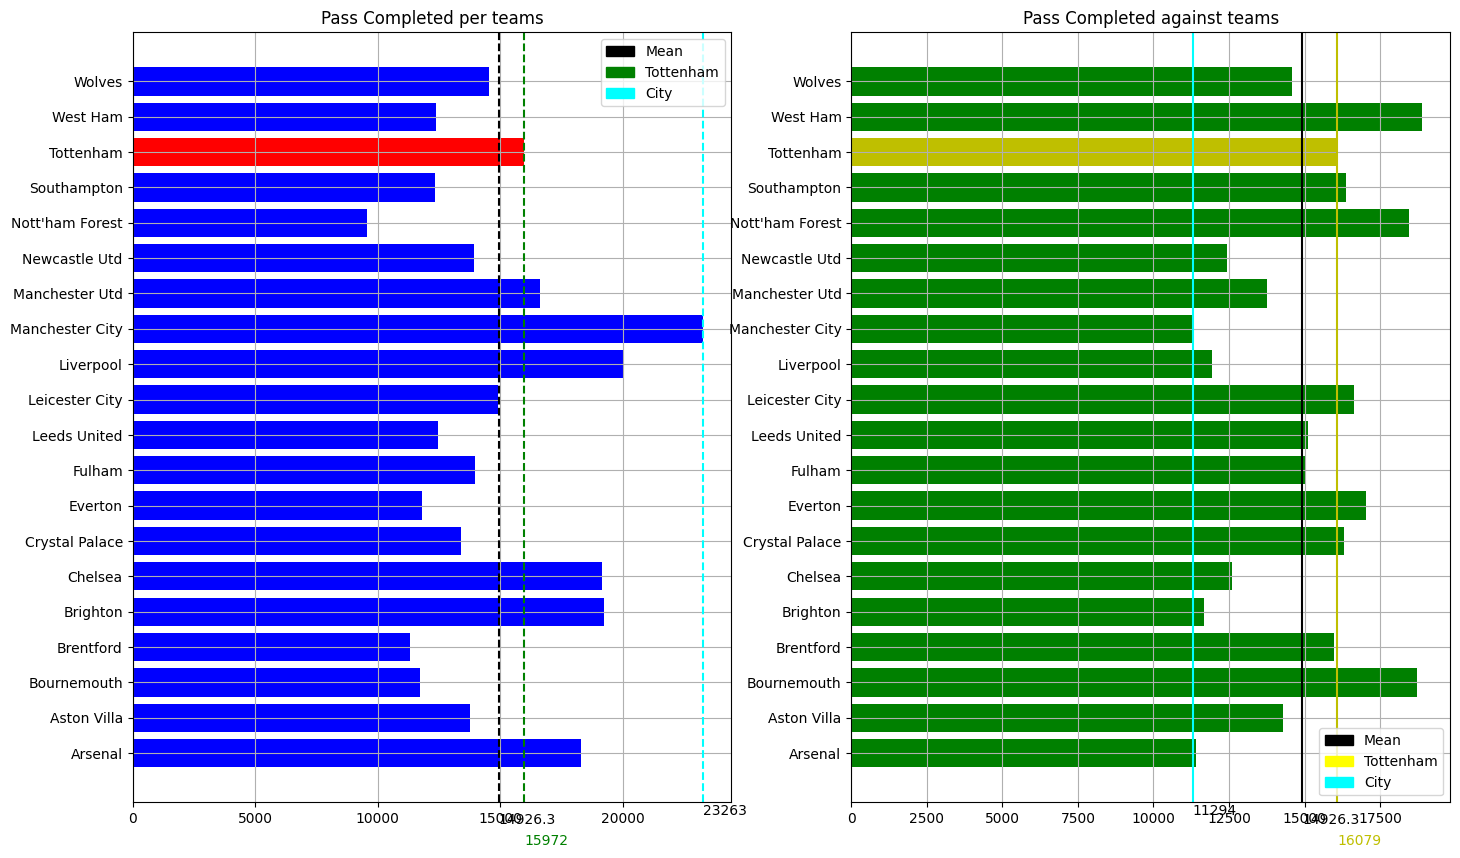

In [221]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico.keys()),list(dico.values()),color=colors)
ax[1].barh(list(dic.keys()),list(dic.values()),color=color)
ax[0].axvline(stat.mean(list(dico.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico.values())),-2, f'{stat.mean(list(dico.values()))}',color='black')
ax[0].axvline(dico["Tottenham"],color='green',linestyle='--')
ax[0].text(dico["Tottenham"],-2.6, f'{dico["Tottenham"]}',color='green')
ax[0].axvline(dico["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico["Manchester City"],-1.75, f'{dico["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic.values())),-2, f'{stat.mean(list(dic.values()))}',color='black')
ax[1].axvline(dic["Tottenham"],color='y',linestyle='-')
ax[1].text(dic["Tottenham"],-2.6, f'{dic["Tottenham"]}',color='y')
ax[1].axvline(dic["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic["Manchester City"],-1.75, f'{dic["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Pass Completed per teams')
ax[1].set_title('Pass Completed against teams')
ax[0].grid(True)
ax[1].grid(True)

***sub-axis3.2 : Pass Attempted***

In [222]:
dico1 = df.set_index('Squad')['Att'].to_dict()
dic1 = df1.set_index('Squad')['Att'].to_dict()

In [223]:
d2 = dico1.copy()
d3 = dico1.copy()
for (key,value) in d2.items():
  if value > np.percentile(list(d2.values()),90):
    d3[key]=20
  if value < np.percentile(list(d2.values()),90) and value > np.percentile(list(d2.values()),80):
    d3[key]=18
  if value < np.percentile(list(d2.values()),80) and value > np.percentile(list(d2.values()),70):
    d3[key]=16
  if value < np.percentile(list(d2.values()),70) and value > np.percentile(list(d2.values()),60):
    d3[key]=14
  if value < np.percentile(list(d2.values()),60) and value > np.percentile(list(d2.values()),50):
    d3[key]=12
  if value < np.percentile(list(d2.values()),50) and value > np.percentile(list(d2.values()),40):
    d3[key]=10
  if value < np.percentile(list(d2.values()),40) and value > np.percentile(list(d2.values()),30):
    d3[key]=8
  if value < np.percentile(list(d2.values()),30) and value > np.percentile(list(d2.values()),20):
    d3[key]=6
  if value < np.percentile(list(d2.values()),20) and value > np.percentile(list(d2.values()),10):
    d3[key]=4
  if value < np.percentile(list(d2.values()),10):
    d3[key]=2

pprint.pprint(d3)
print(f"Mean :{stat.mean(list(d3.values()))}\n")

dd2 = dic1.copy()
dd3 = dic1.copy()
for (key,value) in dd2.items():
  if value > np.percentile(list(dd2.values()),90):
    dd3[key]=2
  if value < np.percentile(list(dd2.values()),90) and value > np.percentile(list(dd2.values()),80):
    dd3[key]=4
  if value < np.percentile(list(dd2.values()),80) and value > np.percentile(list(dd2.values()),70):
    dd3[key]=6
  if value < np.percentile(list(dd2.values()),70) and value > np.percentile(list(dd2.values()),60):
    dd3[key]=8
  if value < np.percentile(list(dd2.values()),60) and value > np.percentile(list(dd2.values()),50):
    dd3[key]=10
  if value < np.percentile(list(dd2.values()),50) and value > np.percentile(list(dd2.values()),40):
    dd3[key]=12
  if value < np.percentile(list(dd2.values()),40) and value > np.percentile(list(dd2.values()),30):
    dd3[key]=14
  if value < np.percentile(list(dd2.values()),30) and value > np.percentile(list(dd2.values()),20):
    dd3[key]=16
  if value < np.percentile(list(dd2.values()),20) and value > np.percentile(list(dd2.values()),10):
    dd3[key]=18
  if value < np.percentile(list(dd2.values()),10):
    dd3[key]=20

pprint.pprint(dd3)
print(f"Mean :{stat.mean(list(dd3.values()))}\n")


{'Arsenal': 16,
 'Aston Villa': 10,
 'Bournemouth': 2,
 'Brentford': 4,
 'Brighton': 18,
 'Chelsea': 18,
 'Crystal Palace': 8,
 'Everton': 4,
 'Fulham': 12,
 'Leeds United': 8,
 'Leicester City': 14,
 'Liverpool': 20,
 'Manchester City': 20,
 'Manchester Utd': 16,
 'Newcastle Utd': 10,
 "Nott'ham Forest": 2,
 'Southampton': 6,
 'Tottenham': 14,
 'West Ham': 6,
 'Wolves': 12}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 14,
 'Bournemouth': 2,
 'Brentford': 8,
 'Brighton': 18,
 'Chelsea': 16,
 'Crystal Palace': 8,
 'Everton': 4,
 'Fulham': 12,
 'Leeds United': 10,
 'Leicester City': 6,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 4,
 'Southampton': 6,
 'Tottenham': 10,
 'West Ham': 2,
 'Wolves': 12}
Mean :11



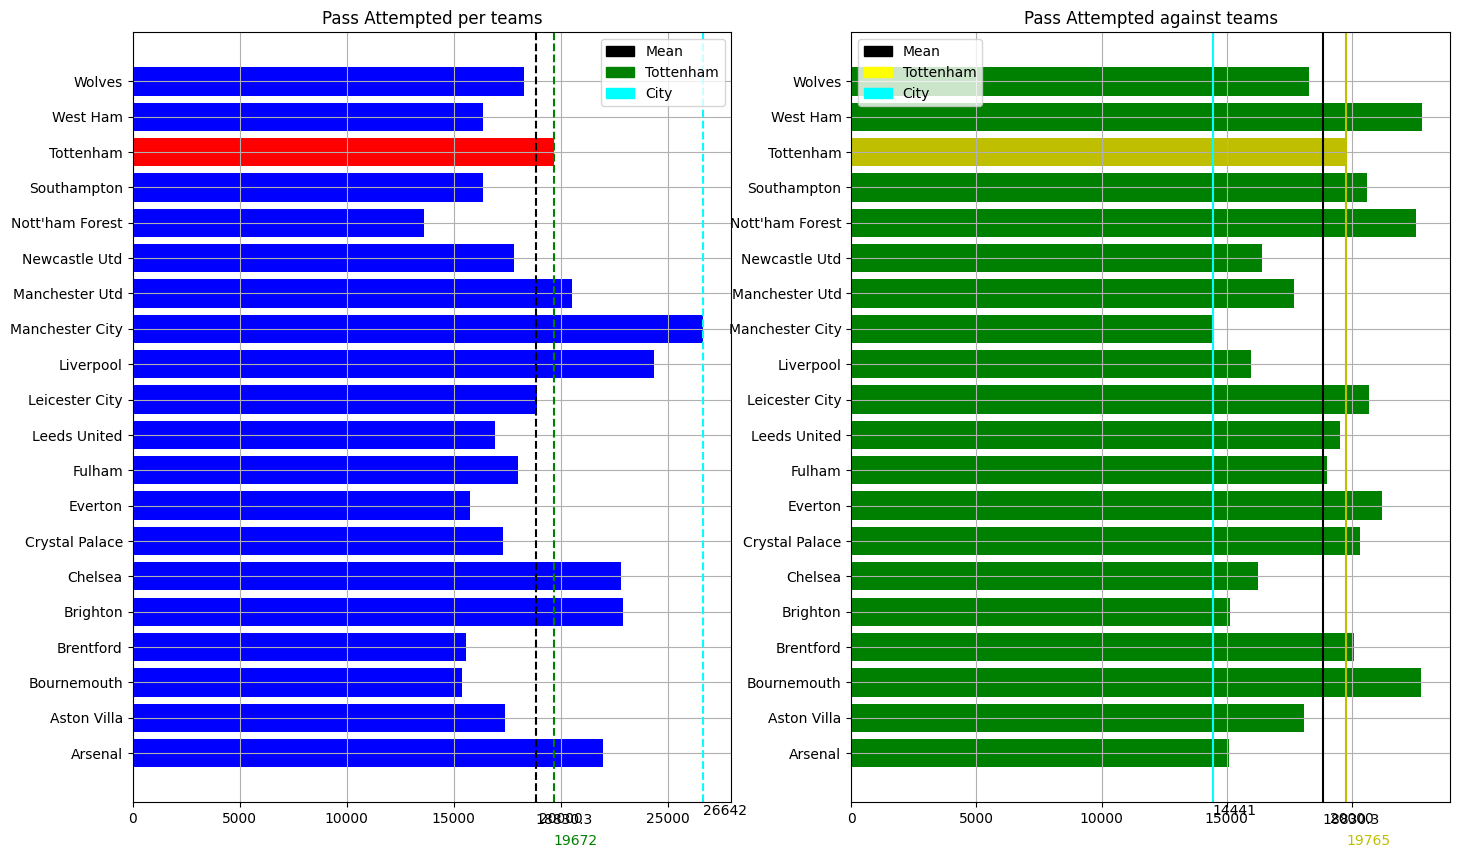

In [224]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico1.keys()),list(dico1.values()),color=colors)
ax[1].barh(list(dic1.keys()),list(dic1.values()),color=color)
ax[0].axvline(stat.mean(list(dico1.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico1.values())),-2, f'{stat.mean(list(dico1.values()))}',color='black')
ax[0].axvline(dico1["Tottenham"],color='green',linestyle='--')
ax[0].text(dico1["Tottenham"],-2.6, f'{dico1["Tottenham"]}',color='green')
ax[0].axvline(dico1["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico1["Manchester City"],-1.75, f'{dico1["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic1.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic1.values())),-2, f'{stat.mean(list(dic1.values()))}',color='black')
ax[1].axvline(dic1["Tottenham"],color='y',linestyle='-')
ax[1].text(dic1["Tottenham"],-2.6, f'{dic1["Tottenham"]}',color='y')
ax[1].axvline(dic1["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic1["Manchester City"],-1.75, f'{dic1["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Pass Attempted per teams')
ax[1].set_title('Pass Attempted against teams')
ax[0].grid(True)
ax[1].grid(True)

***sub-axis3.3 : % Pass Completion***

In [225]:
dico2 = df.set_index('Squad')['Cmp%'].to_dict()
dic2 = df1.set_index('Squad')['Cmp%'].to_dict()

In [226]:
d4 = dico2.copy()
d5 = dico2.copy()
for (key,value) in d4.items():
  if value > np.percentile(list(d4.values()),90):
    d5[key]=20
  if value < np.percentile(list(d4.values()),90) and value > np.percentile(list(d4.values()),80):
    d5[key]=18
  if value < np.percentile(list(d4.values()),80) and value > np.percentile(list(d4.values()),70):
    d5[key]=16
  if value < np.percentile(list(d4.values()),70) and value > np.percentile(list(d4.values()),60):
    d5[key]=14
  if value < np.percentile(list(d4.values()),60) and value > np.percentile(list(d4.values()),50):
    d5[key]=12
  if value < np.percentile(list(d4.values()),50) and value > np.percentile(list(d4.values()),40):
    d5[key]=10
  if value < np.percentile(list(d4.values()),40) and value > np.percentile(list(d4.values()),30):
    d5[key]=8
  if value < np.percentile(list(d4.values()),30) and value > np.percentile(list(d4.values()),20):
    d5[key]=6
  if value < np.percentile(list(d4.values()),20) and value > np.percentile(list(d4.values()),10):
    d5[key]=4
  if value < np.percentile(list(d4.values()),10):
    d5[key]=2

pprint.pprint(d5)
print(f"Mean :{stat.mean(list(d5.values()))}\n")

dd4 = dic2.copy()
dd5 = dic2.copy()
for (key,value) in dd4.items():
  if value > np.percentile(list(dd4.values()),90):
    dd5[key]=2
  if value < np.percentile(list(dd4.values()),90) and value > np.percentile(list(dd4.values()),80):
    dd5[key]=4
  if value < np.percentile(list(dd4.values()),80) and value > np.percentile(list(dd4.values()),70):
    dd5[key]=6
  if value < np.percentile(list(dd4.values()),70) and value > np.percentile(list(dd4.values()),60):
    dd5[key]=8
  if value < np.percentile(list(dd4.values()),60) and value > np.percentile(list(dd4.values()),50):
    dd5[key]=10
  if value < np.percentile(list(dd4.values()),50) and value > np.percentile(list(dd4.values()),40):
    dd5[key]=12
  if value < np.percentile(list(dd4.values()),40) and value > np.percentile(list(dd4.values()),30):
    dd5[key]=14
  if value < np.percentile(list(dd4.values()),30) and value > np.percentile(list(dd4.values()),20):
    dd5[key]=16
  if value < np.percentile(list(dd4.values()),20) and value > np.percentile(list(dd4.values()),10):
    dd5[key]=18
  if value < np.percentile(list(dd4.values()),10):
    dd5[key]=20

pprint.pprint(dd5)
print(f"Mean :{stat.mean(list(dd5.values()))}\n")

{'Arsenal': 18,
 'Aston Villa': 12,
 'Bournemouth': 8,
 'Brentford': 2,
 'Brighton': 20,
 'Chelsea': 18,
 'Crystal Palace': 8,
 'Everton': 4,
 'Fulham': 10,
 'Leeds United': 4,
 'Leicester City': 12,
 'Liverpool': 16,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 10,
 "Nott'ham Forest": 2,
 'Southampton': 6,
 'Tottenham': 16,
 'West Ham': 6,
 'Wolves': 14}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 12,
 'Bournemouth': 2,
 'Brentford': 10,
 'Brighton': 18,
 'Chelsea': 16,
 'Crystal Palace': 8,
 'Everton': 6,
 'Fulham': 12,
 'Leeds United': 16,
 'Leicester City': 6,
 'Liverpool': 20,
 'Manchester City': 14,
 'Manchester Utd': 14,
 'Newcastle Utd': 18,
 "Nott'ham Forest": 4,
 'Southampton': 10,
 'Tottenham': 4,
 'West Ham': 2,
 'Wolves': 8}
Mean :11



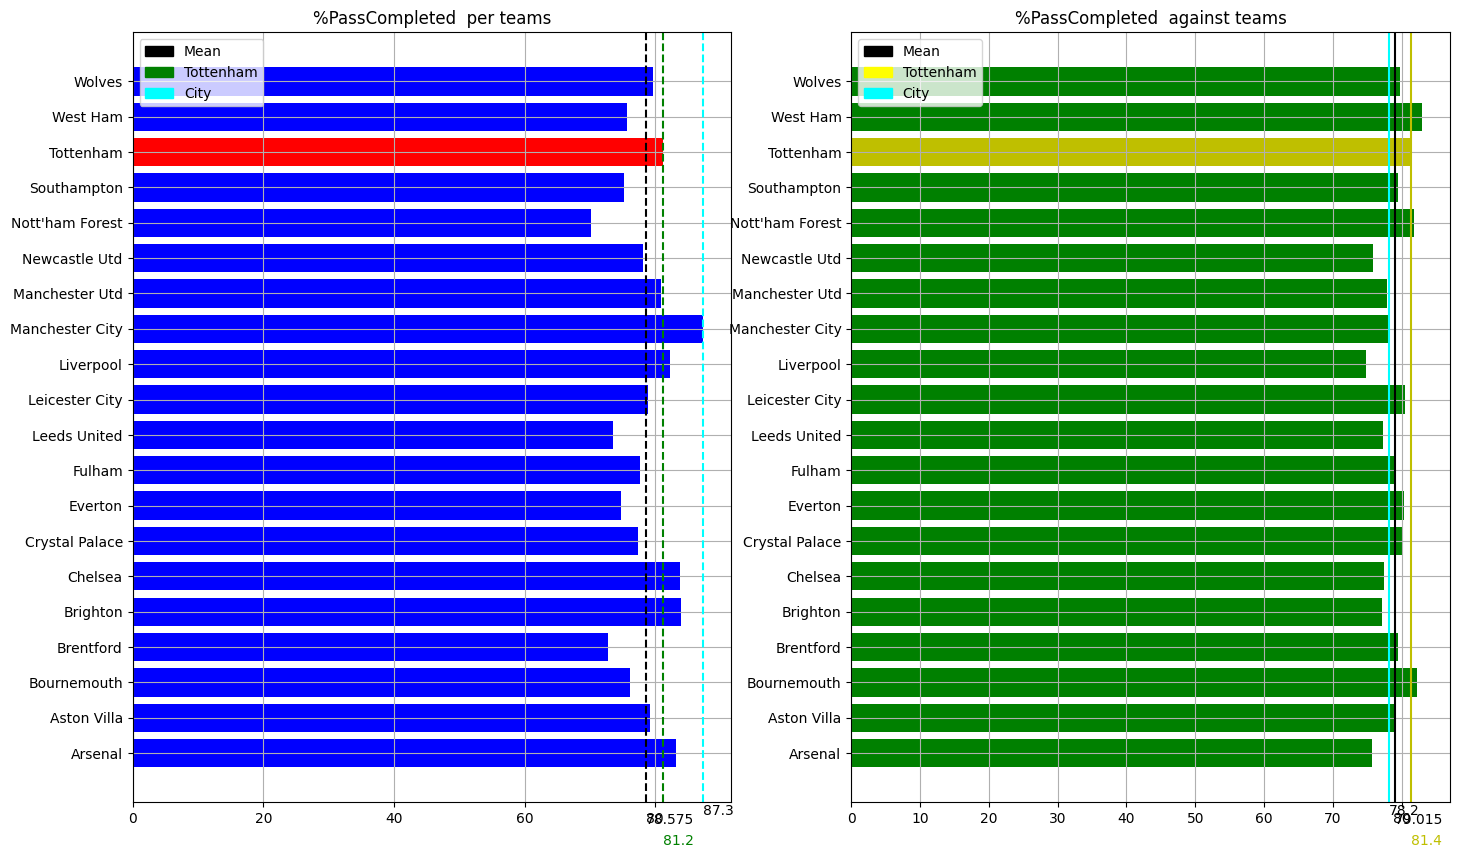

In [227]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico2.keys()),list(dico2.values()),color=colors)
ax[1].barh(list(dic2.keys()),list(dic2.values()),color=color)
ax[0].axvline(stat.mean(list(dico2.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico2.values())),-2, f'{stat.mean(list(dico2.values()))}',color='black')
ax[0].axvline(dico2["Tottenham"],color='green',linestyle='--')
ax[0].text(dico2["Tottenham"],-2.6, f'{dico2["Tottenham"]}',color='green')
ax[0].axvline(dico2["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico2["Manchester City"],-1.75, f'{dico2["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic2.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic2.values())),-2, f'{stat.mean(list(dic2.values()))}',color='black')
ax[1].axvline(dic2["Tottenham"],color='y',linestyle='-')
ax[1].text(dic2["Tottenham"],-2.6, f'{dic2["Tottenham"]}',color='y')
ax[1].axvline(dic2["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic2["Manchester City"],-1.75, f'{dic2["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('%PassCompleted  per teams')
ax[1].set_title('%PassCompleted  against teams')
ax[0].grid(True)
ax[1].grid(True)

***sub-axis3.4 :Short Pass Completed***

In [228]:
dico3 = df.set_index('Squad')['SCmp'].to_dict()
dic3 = df1.set_index('Squad')['SCmp'].to_dict()

In [229]:
d6 = dico3.copy()
d7 = dico3.copy()
for (key,value) in d6.items():
  if value > np.percentile(list(d6.values()),90):
    d7[key]=20
  if value < np.percentile(list(d6.values()),90) and value > np.percentile(list(d6.values()),80):
    d7[key]=18
  if value < np.percentile(list(d6.values()),80) and value > np.percentile(list(d6.values()),70):
    d7[key]=16
  if value < np.percentile(list(d6.values()),70) and value > np.percentile(list(d6.values()),60):
    d7[key]=14
  if value < np.percentile(list(d6.values()),60) and value > np.percentile(list(d6.values()),50):
    d7[key]=12
  if value < np.percentile(list(d6.values()),50) and value > np.percentile(list(d6.values()),40):
    d7[key]=10
  if value < np.percentile(list(d6.values()),40) and value > np.percentile(list(d6.values()),30):
    d7[key]=8
  if value < np.percentile(list(d6.values()),30) and value > np.percentile(list(d6.values()),20):
    d7[key]=6
  if value < np.percentile(list(d6.values()),20) and value > np.percentile(list(d6.values()),10):
    d7[key]=4
  if value < np.percentile(list(d6.values()),10):
    d7[key]=2

pprint.pprint(d7)
print(f"Mean :{stat.mean(list(d7.values()))}\n")

dd6 = dic3.copy()
dd7 = dic3.copy()
for (key,value) in dd6.items():
  if value > np.percentile(list(dd6.values()),90):
    dd7[key]=2
  if value < np.percentile(list(dd6.values()),90) and value > np.percentile(list(dd6.values()),80):
    dd7[key]=4
  if value < np.percentile(list(dd6.values()),80) and value > np.percentile(list(dd6.values()),70):
    dd7[key]=6
  if value < np.percentile(list(dd6.values()),70) and value > np.percentile(list(dd6.values()),60):
    dd7[key]=8
  if value < np.percentile(list(dd6.values()),60) and value > np.percentile(list(dd6.values()),50):
    dd7[key]=10
  if value < np.percentile(list(dd6.values()),50) and value > np.percentile(list(dd6.values()),40):
    dd7[key]=12
  if value < np.percentile(list(dd6.values()),40) and value > np.percentile(list(dd6.values()),30):
    dd7[key]=14
  if value < np.percentile(list(dd6.values()),30) and value > np.percentile(list(dd6.values()),20):
    dd7[key]=16
  if value < np.percentile(list(dd6.values()),20) and value > np.percentile(list(dd6.values()),10):
    dd7[key]=18
  if value < np.percentile(list(dd6.values()),10):
    dd7[key]=20

pprint.pprint(dd7)
print(f"Mean :{stat.mean(list(dd7.values()))}\n")

{'Arsenal': 16,
 'Aston Villa': 10,
 'Bournemouth': 4,
 'Brentford': 2,
 'Brighton': 18,
 'Chelsea': 20,
 'Crystal Palace': 8,
 'Everton': 4,
 'Fulham': 6,
 'Leeds United': 10,
 'Leicester City': 14,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 16,
 'Newcastle Utd': 12,
 "Nott'ham Forest": 2,
 'Southampton': 8,
 'Tottenham': 14,
 'West Ham': 6,
 'Wolves': 12}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 14,
 'Bournemouth': 4,
 'Brentford': 6,
 'Brighton': 18,
 'Chelsea': 16,
 'Crystal Palace': 8,
 'Everton': 4,
 'Fulham': 10,
 'Leeds United': 12,
 'Leicester City': 8,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 2,
 'Southampton': 10,
 'Tottenham': 6,
 'West Ham': 2,
 'Wolves': 12}
Mean :11



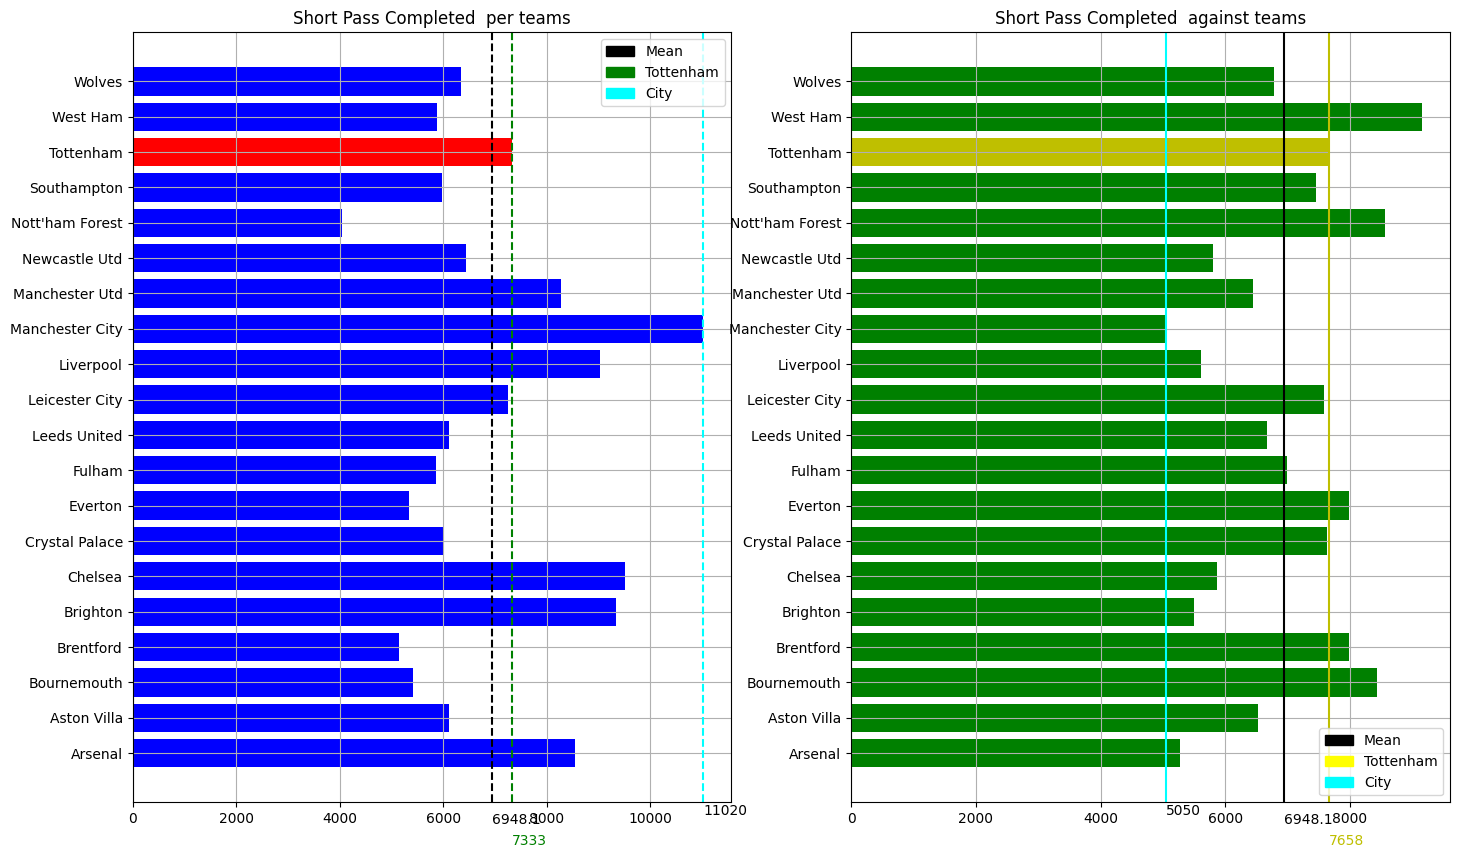

In [230]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico3.keys()),list(dico3.values()),color=colors)
ax[1].barh(list(dic3.keys()),list(dic3.values()),color=color)
ax[0].axvline(stat.mean(list(dico3.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico3.values())),-2, f'{stat.mean(list(dico3.values()))}',color='black')
ax[0].axvline(dico3["Tottenham"],color='green',linestyle='--')
ax[0].text(dico3["Tottenham"],-2.6, f'{dico3["Tottenham"]}',color='green')
ax[0].axvline(dico3["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico3["Manchester City"],-1.75, f'{dico3["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic3.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic3.values())),-2, f'{stat.mean(list(dic3.values()))}',color='black')
ax[1].axvline(dic3["Tottenham"],color='y',linestyle='-')
ax[1].text(dic3["Tottenham"],-2.6, f'{dic3["Tottenham"]}',color='y')
ax[1].axvline(dic3["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic3["Manchester City"],-1.75, f'{dic3["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Short Pass Completed  per teams')
ax[1].set_title('Short Pass Completed  against teams')
ax[0].grid(True)
ax[1].grid(True)

***sub-axis3.5 : Short Pass Attempted***

In [231]:
dico4 = df.set_index('Squad')['SAtt'].to_dict()
dic4 = df1.set_index('Squad')['SAtt'].to_dict()

In [232]:
d8 = dico4.copy()
d9 = dico4.copy()
for (key,value) in d8.items():
  if value > np.percentile(list(d8.values()),90):
    d9[key]=20
  if value < np.percentile(list(d8.values()),90) and value > np.percentile(list(d8.values()),80):
    d9[key]=18
  if value < np.percentile(list(d8.values()),80) and value > np.percentile(list(d8.values()),70):
    d9[key]=16
  if value < np.percentile(list(d8.values()),70) and value > np.percentile(list(d8.values()),60):
    d9[key]=14
  if value < np.percentile(list(d8.values()),60) and value > np.percentile(list(d8.values()),50):
    d9[key]=12
  if value < np.percentile(list(d8.values()),50) and value > np.percentile(list(d8.values()),40):
    d9[key]=10
  if value < np.percentile(list(d8.values()),40) and value > np.percentile(list(d8.values()),30):
    d9[key]=8
  if value < np.percentile(list(d8.values()),30) and value > np.percentile(list(d8.values()),20):
    d9[key]=6
  if value < np.percentile(list(d8.values()),20) and value > np.percentile(list(d8.values()),10):
    d9[key]=4
  if value < np.percentile(list(d8.values()),10):
    d9[key]=2

pprint.pprint(d9)
print(f"Mean :{stat.mean(list(d9.values()))}\n")

dd8 = dic4.copy()
dd9 = dic4.copy()
for (key,value) in dd8.items():
  if value > np.percentile(list(dd8.values()),90):
    dd9[key]=2
  if value < np.percentile(list(dd8.values()),90) and value > np.percentile(list(dd8.values()),80):
    dd9[key]=4
  if value < np.percentile(list(dd8.values()),80) and value > np.percentile(list(dd8.values()),70):
    dd9[key]=6
  if value < np.percentile(list(dd8.values()),70) and value > np.percentile(list(dd8.values()),60):
    dd9[key]=8
  if value < np.percentile(list(dd8.values()),60) and value > np.percentile(list(dd8.values()),50):
    dd9[key]=10
  if value < np.percentile(list(dd8.values()),50) and value > np.percentile(list(dd8.values()),40):
    dd9[key]=12
  if value < np.percentile(list(dd8.values()),40) and value > np.percentile(list(dd8.values()),30):
    dd9[key]=14
  if value < np.percentile(list(dd8.values()),30) and value > np.percentile(list(dd8.values()),20):
    dd9[key]=16
  if value < np.percentile(list(dd8.values()),20) and value > np.percentile(list(dd8.values()),10):
    dd9[key]=18
  if value < np.percentile(list(dd8.values()),10):
    dd9[key]=20

pprint.pprint(dd9)
print(f"Mean :{stat.mean(list(dd9.values()))}\n")

{'Arsenal': 16,
 'Aston Villa': 10,
 'Bournemouth': 4,
 'Brentford': 2,
 'Brighton': 18,
 'Chelsea': 20,
 'Crystal Palace': 8,
 'Everton': 4,
 'Fulham': 6,
 'Leeds United': 12,
 'Leicester City': 14,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 16,
 'Newcastle Utd': 12,
 "Nott'ham Forest": 2,
 'Southampton': 8,
 'Tottenham': 14,
 'West Ham': 6,
 'Wolves': 10}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 14,
 'Bournemouth': 4,
 'Brentford': 6,
 'Brighton': 18,
 'Chelsea': 16,
 'Crystal Palace': 6,
 'Everton': 4,
 'Fulham': 10,
 'Leeds United': 12,
 'Leicester City': 10,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 2,
 'Southampton': 8,
 'Tottenham': 8,
 'West Ham': 2,
 'Wolves': 12}
Mean :11



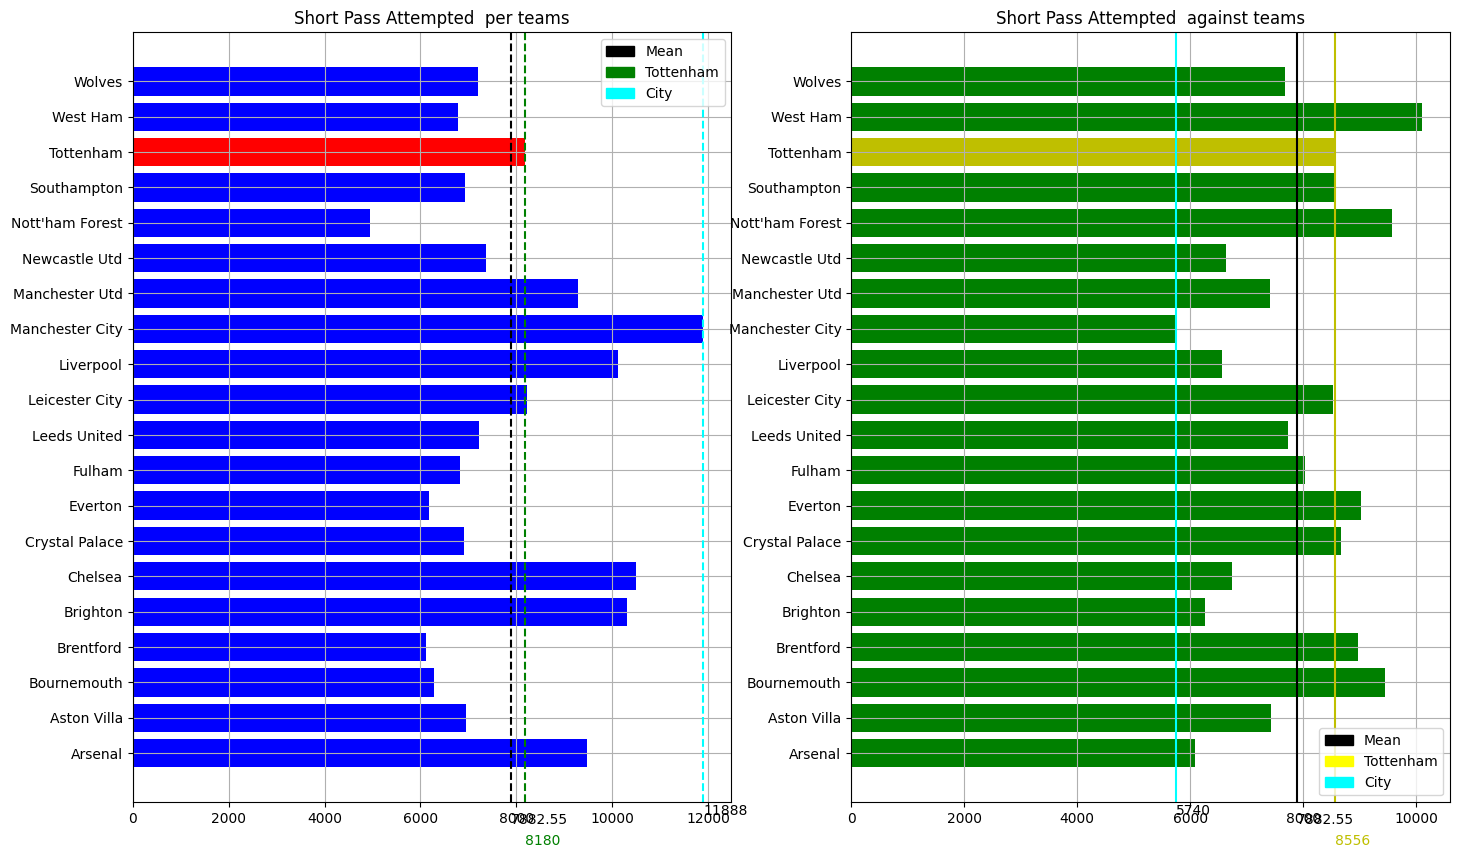

In [233]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico4.keys()),list(dico4.values()),color=colors)
ax[1].barh(list(dic4.keys()),list(dic4.values()),color=color)
ax[0].axvline(stat.mean(list(dico4.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico4.values())),-2, f'{stat.mean(list(dico4.values()))}',color='black')
ax[0].axvline(dico4["Tottenham"],color='green',linestyle='--')
ax[0].text(dico4["Tottenham"],-2.6, f'{dico4["Tottenham"]}',color='green')
ax[0].axvline(dico4["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico4["Manchester City"],-1.75, f'{dico4["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic4.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic4.values())),-2, f'{stat.mean(list(dic4.values()))}',color='black')
ax[1].axvline(dic4["Tottenham"],color='y',linestyle='-')
ax[1].text(dic4["Tottenham"],-2.6, f'{dic4["Tottenham"]}',color='y')
ax[1].axvline(dic4["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic4["Manchester City"],-1.75, f'{dic4["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Short Pass Attempted  per teams')
ax[1].set_title('Short Pass Attempted  against teams')
ax[0].grid(True)
ax[1].grid(True)

***sub-axis3.6 : %Short Pass Completed***

In [234]:
dico5 = df.set_index('Squad')['SCmp%'].to_dict()
dic5 = df1.set_index('Squad')['SCmp%'].to_dict()

In [235]:
d10 = dico5.copy()
d11 = dico5.copy()
for (key,value) in d10.items():
  if value > np.percentile(list(d10.values()),90):
    d11[key]=20
  if value < np.percentile(list(d10.values()),90) and value > np.percentile(list(d10.values()),80):
    d11[key]=18
  if value < np.percentile(list(d10.values()),80) and value > np.percentile(list(d10.values()),70):
    d11[key]=16
  if value < np.percentile(list(d10.values()),70) and value > np.percentile(list(d10.values()),60):
    d11[key]=14
  if value < np.percentile(list(d10.values()),60) and value > np.percentile(list(d10.values()),50):
    d11[key]=12
  if value < np.percentile(list(d10.values()),50) and value > np.percentile(list(d10.values()),40):
    d11[key]=10
  if value < np.percentile(list(d10.values()),40) and value > np.percentile(list(d10.values()),30):
    d11[key]=8
  if value < np.percentile(list(d10.values()),30) and value > np.percentile(list(d10.values()),20):
    d11[key]=6
  if value < np.percentile(list(d10.values()),20) and value > np.percentile(list(d10.values()),10):
    d11[key]=4
  if value < np.percentile(list(d10.values()),10):
    d11[key]=2

pprint.pprint(d11)
print(f"Mean :{stat.mean(list(d11.values()))}\n")

dd10 = dic5.copy()
dd11 = dic5.copy()
for (key,value) in dd10.items():
  if value > np.percentile(list(dd10.values()),90):
    dd11[key]=2
  if value < np.percentile(list(dd10.values()),90) and value > np.percentile(list(dd10.values()),80):
    dd11[key]=4
  if value < np.percentile(list(dd10.values()),80) and value > np.percentile(list(dd10.values()),70):
    dd11[key]=6
  if value < np.percentile(list(dd10.values()),70) and value > np.percentile(list(dd10.values()),60):
    dd11[key]=8
  if value < np.percentile(list(dd10.values()),60) and value > np.percentile(list(dd10.values()),50):
    dd11[key]=10
  if value < np.percentile(list(dd10.values()),50) and value > np.percentile(list(dd10.values()),40):
    dd11[key]=12
  if value < np.percentile(list(dd10.values()),40) and value > np.percentile(list(dd10.values()),30):
    dd11[key]=14
  if value < np.percentile(list(dd10.values()),30) and value > np.percentile(list(dd10.values()),20):
    dd11[key]=16
  if value < np.percentile(list(dd10.values()),20) and value > np.percentile(list(dd10.values()),10):
    dd11[key]=18
  if value < np.percentile(list(dd10.values()),10):
    dd11[key]=20

pprint.pprint(dd11)
print(f"Mean :{stat.mean(list(dd11.values()))}\n")

{'Arsenal': 18,
 'Aston Villa': 12,
 'Bournemouth': 6,
 'Brentford': 2,
 'Brighton': 20,
 'Chelsea': 18,
 'Crystal Palace': 10,
 'Everton': 8,
 'Fulham': 4,
 'Leeds United': 4,
 'Leicester City': 12,
 'Liverpool': 16,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 10,
 "Nott'ham Forest": 2,
 'Southampton': 6,
 'Tottenham': 16,
 'West Ham': 8,
 'Wolves': 14}
Mean :11

{'Arsenal': 18,
 'Aston Villa': 12,
 'Bournemouth': 4,
 'Brentford': 6,
 'Brighton': 12,
 'Chelsea': 16,
 'Crystal Palace': 10,
 'Everton': 8,
 'Fulham': 16,
 'Leeds United': 20,
 'Leicester City': 6,
 'Liverpool': 20,
 'Manchester City': 10,
 'Manchester Utd': 18,
 'Newcastle Utd': 14,
 "Nott'ham Forest": 2,
 'Southampton': 14,
 'Tottenham': 4,
 'West Ham': 2,
 'Wolves': 8}
Mean :11



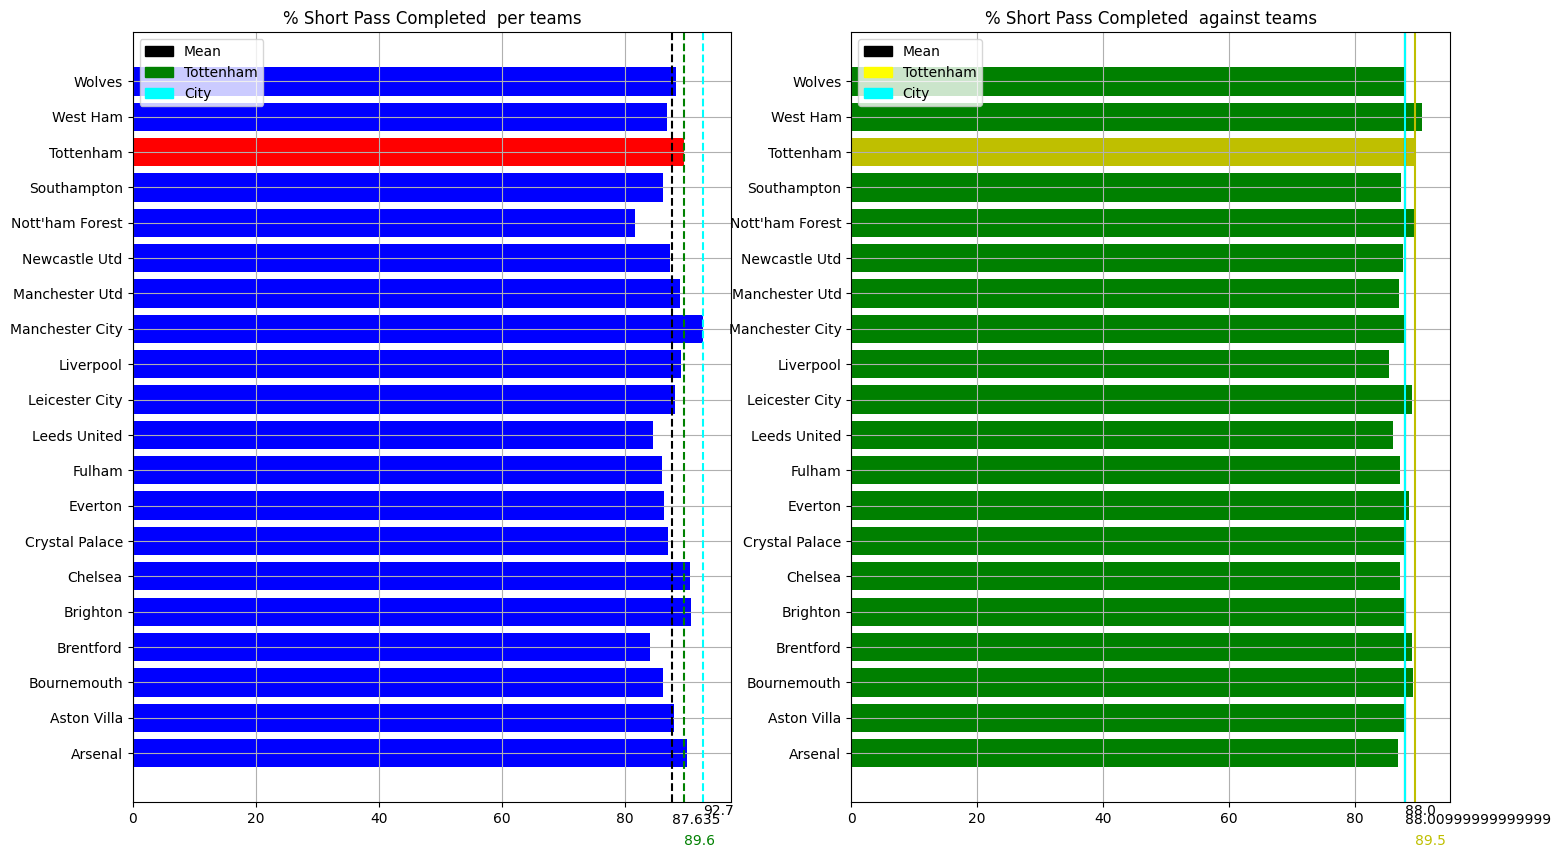

In [236]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico5.keys()),list(dico5.values()),color=colors)
ax[1].barh(list(dic5.keys()),list(dic5.values()),color=color)
ax[0].axvline(stat.mean(list(dico5.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico5.values())),-2, f'{stat.mean(list(dico5.values()))}',color='black')
ax[0].axvline(dico5["Tottenham"],color='green',linestyle='--')
ax[0].text(dico5["Tottenham"],-2.6, f'{dico5["Tottenham"]}',color='green')
ax[0].axvline(dico5["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico5["Manchester City"],-1.75, f'{dico5["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic5.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic5.values())),-2, f'{stat.mean(list(dic5.values()))}',color='black')
ax[1].axvline(dic5["Tottenham"],color='y',linestyle='-')
ax[1].text(dic5["Tottenham"],-2.6, f'{dic5["Tottenham"]}',color='y')
ax[1].axvline(dic5["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic5["Manchester City"],-1.75, f'{dic5["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('% Short Pass Completed  per teams')
ax[1].set_title('% Short Pass Completed  against teams')
ax[0].grid(True)
ax[1].grid(True)

***sub-axis3.7 : Medium Pass Completed***

In [237]:
dico6 = df.set_index('Squad')['MCmp'].to_dict()
dic6 = df1.set_index('Squad')['MCmp'].to_dict()

In [238]:
d12 = dico6.copy()
d13 = dico6.copy()
for (key,value) in d12.items():
  if value > np.percentile(list(d12.values()),90):
    d13[key]=20
  if value <= np.percentile(list(d12.values()),90) and value > np.percentile(list(d12.values()),80):
    d13[key]=18
  if value <= np.percentile(list(d12.values()),80) and value > np.percentile(list(d12.values()),70):
    d13[key]=16
  if value <= np.percentile(list(d12.values()),70) and value > np.percentile(list(d12.values()),60):
    d13[key]=14
  if value <= np.percentile(list(d12.values()),60) and value > np.percentile(list(d12.values()),50):
    d13[key]=12
  if value <= np.percentile(list(d12.values()),50) and value > np.percentile(list(d12.values()),40):
    d13[key]=10
  if value <= np.percentile(list(d12.values()),40) and value > np.percentile(list(d12.values()),30):
    d13[key]=8
  if value <= np.percentile(list(d12.values()),30) and value > np.percentile(list(d12.values()),20):
    d13[key]=6
  if value <= np.percentile(list(d12.values()),20) and value > np.percentile(list(d12.values()),10):
    d13[key]=4
  if value <= np.percentile(list(d12.values()),10):
    d13[key]=2

pprint.pprint(d13)
print(f"Mean :{stat.mean(list(d13.values()))}\n")

dd12 = dic6.copy()
dd13 = dic6.copy()
for (key,value) in dd12.items():
  if value > np.percentile(list(dd12.values()),90):
    dd13[key]=2
  if value <= np.percentile(list(dd12.values()),90) and value > np.percentile(list(dd12.values()),80):
    dd13[key]=4
  if value <= np.percentile(list(dd12.values()),80) and value > np.percentile(list(dd12.values()),70):
    dd13[key]=6
  if value <= np.percentile(list(dd12.values()),70) and value > np.percentile(list(dd12.values()),60):
    dd13[key]=8
  if value <= np.percentile(list(dd12.values()),60) and value > np.percentile(list(dd12.values()),50):
    dd13[key]=10
  if value <= np.percentile(list(dd12.values()),50) and value > np.percentile(list(dd12.values()),40):
    dd13[key]=12
  if value <= np.percentile(list(dd12.values()),40) and value > np.percentile(list(dd12.values()),30):
    dd13[key]=14
  if value <= np.percentile(list(dd12.values()),30) and value > np.percentile(list(dd12.values()),20):
    dd13[key]=16
  if value <= np.percentile(list(dd12.values()),20) and value > np.percentile(list(dd12.values()),10):
    dd13[key]=18
  if value <= np.percentile(list(dd12.values()),10):
    dd13[key]=20

pprint.pprint(dd13)
print(f"Mean :{stat.mean(list(dd13.values()))}\n")

{'Arsenal': 18,
 'Aston Villa': 10,
 'Bournemouth': 4,
 'Brentford': 2,
 'Brighton': 18,
 'Chelsea': 16,
 'Crystal Palace': 10,
 'Everton': 4,
 'Fulham': 12,
 'Leeds United': 6,
 'Leicester City': 12,
 'Liverpool': 20,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 8,
 "Nott'ham Forest": 2,
 'Southampton': 8,
 'Tottenham': 16,
 'West Ham': 6,
 'Wolves': 14}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 14,
 'Bournemouth': 2,
 'Brentford': 12,
 'Brighton': 18,
 'Chelsea': 16,
 'Crystal Palace': 8,
 'Everton': 4,
 'Fulham': 10,
 'Leeds United': 8,
 'Leicester City': 6,
 'Liverpool': 20,
 'Manchester City': 18,
 'Manchester Utd': 14,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 2,
 'Southampton': 6,
 'Tottenham': 10,
 'West Ham': 4,
 'Wolves': 12}
Mean :11



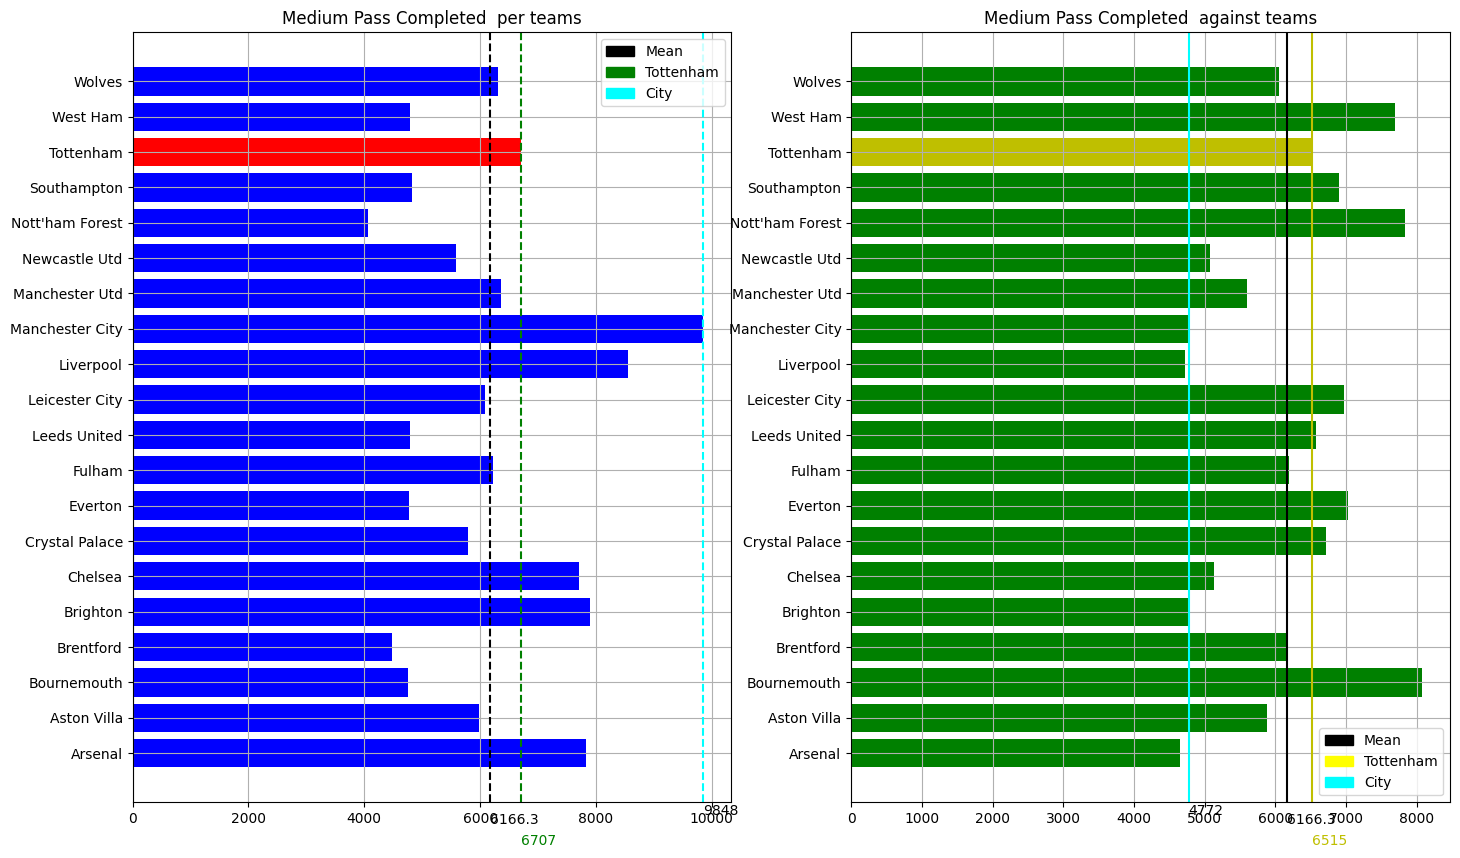

In [239]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico6.keys()),list(dico6.values()),color=colors)
ax[1].barh(list(dic6.keys()),list(dic6.values()),color=color)
ax[0].axvline(stat.mean(list(dico6.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico6.values())),-2, f'{stat.mean(list(dico6.values()))}',color='black')
ax[0].axvline(dico6["Tottenham"],color='green',linestyle='--')
ax[0].text(dico6["Tottenham"],-2.6, f'{dico6["Tottenham"]}',color='green')
ax[0].axvline(dico6["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico6["Manchester City"],-1.75, f'{dico6["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic6.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic6.values())),-2, f'{stat.mean(list(dic6.values()))}',color='black')
ax[1].axvline(dic6["Tottenham"],color='y',linestyle='-')
ax[1].text(dic6["Tottenham"],-2.6, f'{dic6["Tottenham"]}',color='y')
ax[1].axvline(dic6["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic6["Manchester City"],-1.75, f'{dic6["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Medium Pass Completed  per teams')
ax[1].set_title('Medium Pass Completed  against teams')
ax[0].grid(True)
ax[1].grid(True)

***sub-axis3.8 : Medium Pass Attempted***

In [240]:
dico7 = df.set_index('Squad')['MAtt'].to_dict()
dic7 = df1.set_index('Squad')['MAtt'].to_dict()

In [241]:
d14 = dico7.copy()
d15 = dico7.copy()
for (key,value) in d14.items():
  if value > np.percentile(list(d14.values()),90):
    d15[key]=20
  if value <= np.percentile(list(d14.values()),90) and value > np.percentile(list(d14.values()),80):
    d15[key]=18
  if value <= np.percentile(list(d14.values()),80) and value > np.percentile(list(d14.values()),70):
    d15[key]=16
  if value <= np.percentile(list(d14.values()),70) and value > np.percentile(list(d14.values()),60):
    d15[key]=14
  if value <= np.percentile(list(d14.values()),60) and value > np.percentile(list(d14.values()),50):
    d15[key]=12
  if value <= np.percentile(list(d14.values()),50) and value > np.percentile(list(d14.values()),40):
    d15[key]=10
  if value <= np.percentile(list(d14.values()),40) and value > np.percentile(list(d14.values()),30):
    d15[key]=8
  if value <= np.percentile(list(d14.values()),30) and value > np.percentile(list(d14.values()),20):
    d15[key]=6
  if value <= np.percentile(list(d14.values()),20) and value > np.percentile(list(d14.values()),10):
    d15[key]=4
  if value <= np.percentile(list(d14.values()),10):
    d15[key]=2

pprint.pprint(d15)
print(f"Mean :{stat.mean(list(d15.values()))}\n")

dd14 = dic7.copy()
dd15 = dic7.copy()
for (key,value) in dd14.items():
  if value > np.percentile(list(dd14.values()),90):
    dd15[key]=2
  if value <= np.percentile(list(dd14.values()),90) and value > np.percentile(list(dd14.values()),80):
    dd15[key]=4
  if value <= np.percentile(list(dd14.values()),80) and value > np.percentile(list(dd14.values()),70):
    dd15[key]=6
  if value <= np.percentile(list(dd14.values()),70) and value > np.percentile(list(dd14.values()),60):
    dd15[key]=8
  if value <= np.percentile(list(dd14.values()),60) and value > np.percentile(list(dd14.values()),50):
    dd15[key]=10
  if value <= np.percentile(list(dd14.values()),50) and value > np.percentile(list(dd14.values()),40):
    dd15[key]=12
  if value <= np.percentile(list(dd14.values()),40) and value > np.percentile(list(dd14.values()),30):
    dd15[key]=14
  if value <= np.percentile(list(dd14.values()),30) and value > np.percentile(list(dd14.values()),20):
    dd15[key]=16
  if value <= np.percentile(list(dd14.values()),20) and value > np.percentile(list(dd14.values()),10):
    dd15[key]=18
  if value <= np.percentile(list(dd14.values()),10):
    dd15[key]=20

pprint.pprint(dd15)
print(f"Mean :{stat.mean(list(dd15.values()))}\n")

{'Arsenal': 18,
 'Aston Villa': 10,
 'Bournemouth': 4,
 'Brentford': 2,
 'Brighton': 18,
 'Chelsea': 16,
 'Crystal Palace': 10,
 'Everton': 4,
 'Fulham': 14,
 'Leeds United': 8,
 'Leicester City': 12,
 'Liverpool': 20,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 8,
 "Nott'ham Forest": 2,
 'Southampton': 6,
 'Tottenham': 16,
 'West Ham': 6,
 'Wolves': 12}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 14,
 'Bournemouth': 2,
 'Brentford': 10,
 'Brighton': 18,
 'Chelsea': 16,
 'Crystal Palace': 8,
 'Everton': 4,
 'Fulham': 12,
 'Leeds United': 8,
 'Leicester City': 6,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 2,
 'Southampton': 6,
 'Tottenham': 10,
 'West Ham': 4,
 'Wolves': 12}
Mean :11



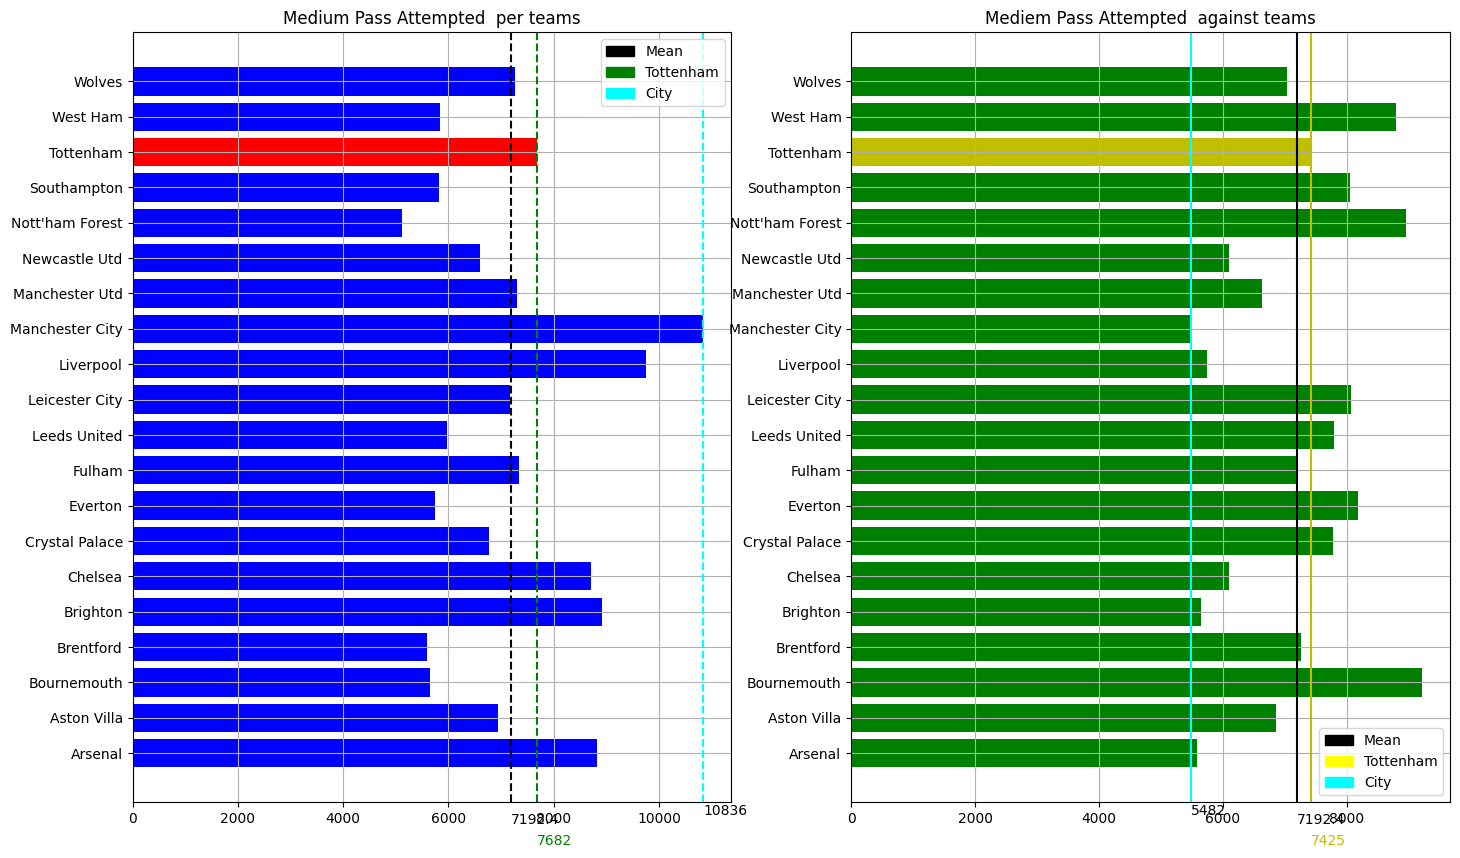

In [242]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico7.keys()),list(dico7.values()),color=colors)
ax[1].barh(list(dic7.keys()),list(dic7.values()),color=color)
ax[0].axvline(stat.mean(list(dico7.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico7.values())),-2, f'{stat.mean(list(dico7.values()))}',color='black')
ax[0].axvline(dico7["Tottenham"],color='green',linestyle='--')
ax[0].text(dico7["Tottenham"],-2.6, f'{dico7["Tottenham"]}',color='green')
ax[0].axvline(dico7["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico7["Manchester City"],-1.75, f'{dico7["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic7.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic7.values())),-2, f'{stat.mean(list(dic7.values()))}',color='black')
ax[1].axvline(dic7["Tottenham"],color='y',linestyle='-')
ax[1].text(dic7["Tottenham"],-2.6, f'{dic7["Tottenham"]}',color='y')
ax[1].axvline(dic7["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic7["Manchester City"],-1.75, f'{dic7["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Medium Pass Attempted  per teams')
ax[1].set_title('Mediem Pass Attempted  against teams')
ax[0].grid(True)
ax[1].grid(True)

***sub-axis3.9 : %Medium Pass Completed***

In [243]:
dico8 = df.set_index('Squad')['MCmp%'].to_dict()
dic8 = df1.set_index('Squad')['MCmp%'].to_dict()

In [244]:
d16 = dico8.copy()
d17 = dico8.copy()
for (key,value) in d16.items():
  if value > np.percentile(list(d16.values()),90):
    d17[key]=20
  if value <= np.percentile(list(d16.values()),90) and value > np.percentile(list(d16.values()),80):
    d17[key]=18
  if value <= np.percentile(list(d16.values()),80) and value > np.percentile(list(d16.values()),70):
    d17[key]=16
  if value <= np.percentile(list(d16.values()),70) and value > np.percentile(list(d16.values()),60):
    d17[key]=14
  if value <= np.percentile(list(d16.values()),60) and value > np.percentile(list(d16.values()),50):
    d17[key]=12
  if value <= np.percentile(list(d16.values()),50) and value > np.percentile(list(d16.values()),40):
    d17[key]=10
  if value <= np.percentile(list(d16.values()),40) and value > np.percentile(list(d16.values()),30):
    d17[key]=8
  if value <= np.percentile(list(d16.values()),30) and value > np.percentile(list(d16.values()),20):
    d17[key]=6
  if value <= np.percentile(list(d16.values()),20) and value > np.percentile(list(d16.values()),10):
    d17[key]=4
  if value <= np.percentile(list(d16.values()),10):
    d17[key]=2

pprint.pprint(d17)
print(f"Mean :{stat.mean(list(d17.values()))}\n")

dd16 = dic7.copy()
dd17 = dic7.copy()
for (key,value) in dd16.items():
  if value > np.percentile(list(dd16.values()),90):
    dd17[key]=2
  if value <= np.percentile(list(dd16.values()),90) and value > np.percentile(list(dd16.values()),80):
    dd17[key]=4
  if value <= np.percentile(list(dd16.values()),80) and value > np.percentile(list(dd16.values()),70):
    dd17[key]=6
  if value <= np.percentile(list(dd16.values()),70) and value > np.percentile(list(dd16.values()),60):
    dd17[key]=8
  if value <= np.percentile(list(dd16.values()),60) and value > np.percentile(list(dd16.values()),50):
    dd17[key]=10
  if value <= np.percentile(list(dd16.values()),50) and value > np.percentile(list(dd16.values()),40):
    dd17[key]=12
  if value <= np.percentile(list(dd16.values()),40) and value > np.percentile(list(dd16.values()),30):
    dd17[key]=14
  if value <= np.percentile(list(dd16.values()),30) and value > np.percentile(list(dd16.values()),20):
    dd17[key]=16
  if value <= np.percentile(list(dd16.values()),20) and value > np.percentile(list(dd16.values()),10):
    dd17[key]=18
  if value <= np.percentile(list(dd16.values()),10):
    dd17[key]=20

pprint.pprint(dd17)
print(f"Mean :{stat.mean(list(dd17.values()))}\n")

{'Arsenal': 20,
 'Aston Villa': 12,
 'Bournemouth': 8,
 'Brentford': 2,
 'Brighton': 18,
 'Chelsea': 18,
 'Crystal Palace': 12,
 'Everton': 6,
 'Fulham': 10,
 'Leeds United': 4,
 'Leicester City': 10,
 'Liverpool': 16,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 8,
 "Nott'ham Forest": 2,
 'Southampton': 6,
 'Tottenham': 16,
 'West Ham': 4,
 'Wolves': 14}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 14,
 'Bournemouth': 2,
 'Brentford': 10,
 'Brighton': 18,
 'Chelsea': 16,
 'Crystal Palace': 8,
 'Everton': 4,
 'Fulham': 12,
 'Leeds United': 8,
 'Leicester City': 6,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 2,
 'Southampton': 6,
 'Tottenham': 10,
 'West Ham': 4,
 'Wolves': 12}
Mean :11



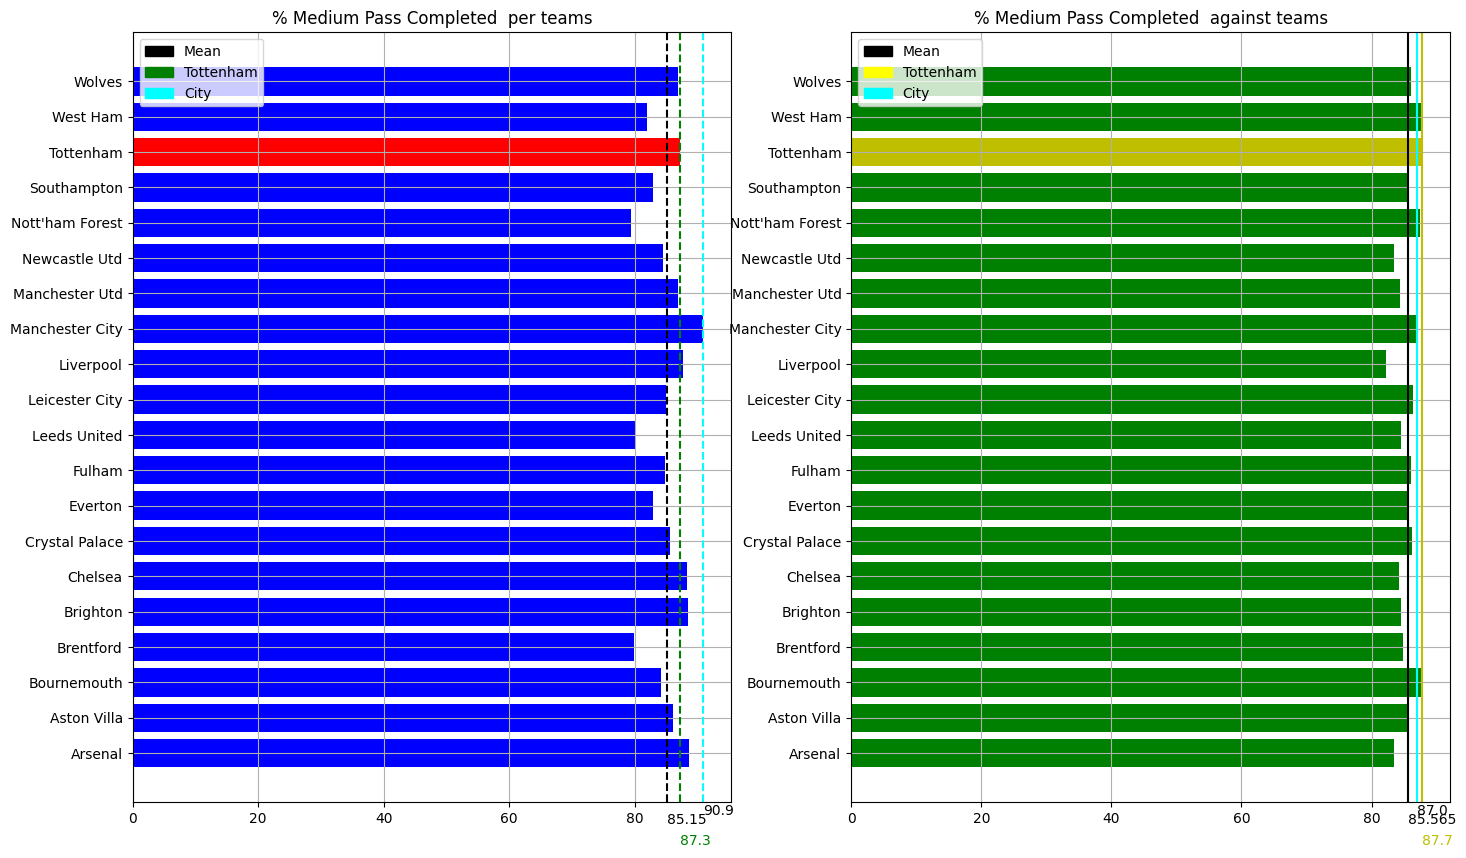

In [245]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico8.keys()),list(dico8.values()),color=colors)
ax[1].barh(list(dic8.keys()),list(dic8.values()),color=color)
ax[0].axvline(stat.mean(list(dico8.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico8.values())),-2, f'{stat.mean(list(dico8.values()))}',color='black')
ax[0].axvline(dico8["Tottenham"],color='green',linestyle='--')
ax[0].text(dico8["Tottenham"],-2.6, f'{dico8["Tottenham"]}',color='green')
ax[0].axvline(dico8["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico8["Manchester City"],-1.75, f'{dico8["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic8.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic8.values())),-2, f'{stat.mean(list(dic8.values()))}',color='black')
ax[1].axvline(dic8["Tottenham"],color='y',linestyle='-')
ax[1].text(dic8["Tottenham"],-2.6, f'{dic8["Tottenham"]}',color='y')
ax[1].axvline(dic8["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic8["Manchester City"],-1.75, f'{dic8["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('% Medium Pass Completed  per teams')
ax[1].set_title('% Medium Pass Completed  against teams')
ax[0].grid(True)
ax[1].grid(True)

***sub-axis3.10 : Long Pass Completed***

In [246]:
dico9 = df.set_index('Squad')['LCmp'].to_dict()
dic9 = df1.set_index('Squad')['LCmp'].to_dict()

In [247]:
d18 = dico9.copy()
d19 = dico9.copy()
for (key,value) in d18.items():
  if value > np.percentile(list(d18.values()),90):
    d19[key]=20
  if value <= np.percentile(list(d18.values()),90) and value > np.percentile(list(d18.values()),80):
    d19[key]=18
  if value <= np.percentile(list(d18.values()),80) and value > np.percentile(list(d18.values()),70):
    d19[key]=16
  if value <= np.percentile(list(d18.values()),70) and value > np.percentile(list(d18.values()),60):
    d19[key]=14
  if value <= np.percentile(list(d18.values()),60) and value > np.percentile(list(d18.values()),50):
    d19[key]=12
  if value <= np.percentile(list(d18.values()),50) and value > np.percentile(list(d18.values()),40):
    d19[key]=10
  if value <= np.percentile(list(d18.values()),40) and value > np.percentile(list(d18.values()),30):
    d19[key]=8
  if value <= np.percentile(list(d18.values()),30) and value > np.percentile(list(d18.values()),20):
    d19[key]=6
  if value <= np.percentile(list(d18.values()),20) and value > np.percentile(list(d18.values()),10):
    d19[key]=4
  if value <= np.percentile(list(d18.values()),10):
    d19[key]=2

pprint.pprint(d19)
print(f"Mean :{stat.mean(list(d19.values()))}\n")

dd18 = dic9.copy()
dd19 = dic9.copy()
for (key,value) in dd18.items():
  if value > np.percentile(list(dd18.values()),90):
    dd19[key]=2
  if value <= np.percentile(list(dd18.values()),90) and value > np.percentile(list(dd18.values()),80):
    dd19[key]=4
  if value <= np.percentile(list(dd18.values()),80) and value > np.percentile(list(dd18.values()),70):
    dd19[key]=6
  if value <= np.percentile(list(dd18.values()),70) and value > np.percentile(list(dd18.values()),60):
    dd19[key]=8
  if value <= np.percentile(list(dd18.values()),60) and value > np.percentile(list(dd18.values()),50):
    dd19[key]=10
  if value <= np.percentile(list(dd18.values()),50) and value > np.percentile(list(dd18.values()),40):
    dd19[key]=12
  if value <= np.percentile(list(dd18.values()),40) and value > np.percentile(list(dd18.values()),30):
    dd19[key]=14
  if value <= np.percentile(list(dd18.values()),30) and value > np.percentile(list(dd18.values()),20):
    dd19[key]=16
  if value <= np.percentile(list(dd18.values()),20) and value > np.percentile(list(dd18.values()),10):
    dd19[key]=18
  if value <= np.percentile(list(dd18.values()),10):
    dd19[key]=20

pprint.pprint(dd19)
print(f"Mean :{stat.mean(list(dd19.values()))}\n")

{'Arsenal': 12,
 'Aston Villa': 8,
 'Bournemouth': 6,
 'Brentford': 10,
 'Brighton': 14,
 'Chelsea': 14,
 'Crystal Palace': 6,
 'Everton': 8,
 'Fulham': 18,
 'Leeds United': 2,
 'Leicester City': 2,
 'Liverpool': 20,
 'Manchester City': 20,
 'Manchester Utd': 10,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 4,
 'Southampton': 4,
 'Tottenham': 16,
 'West Ham': 10,
 'Wolves': 18}
Mean :10.9

{'Arsenal': 18,
 'Aston Villa': 6,
 'Bournemouth': 2,
 'Brentford': 14,
 'Brighton': 20,
 'Chelsea': 18,
 'Crystal Palace': 8,
 'Everton': 6,
 'Fulham': 12,
 'Leeds United': 8,
 'Leicester City': 2,
 'Liverpool': 16,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 4,
 'Southampton': 4,
 'Tottenham': 10,
 'West Ham': 10,
 'Wolves': 12}
Mean :11



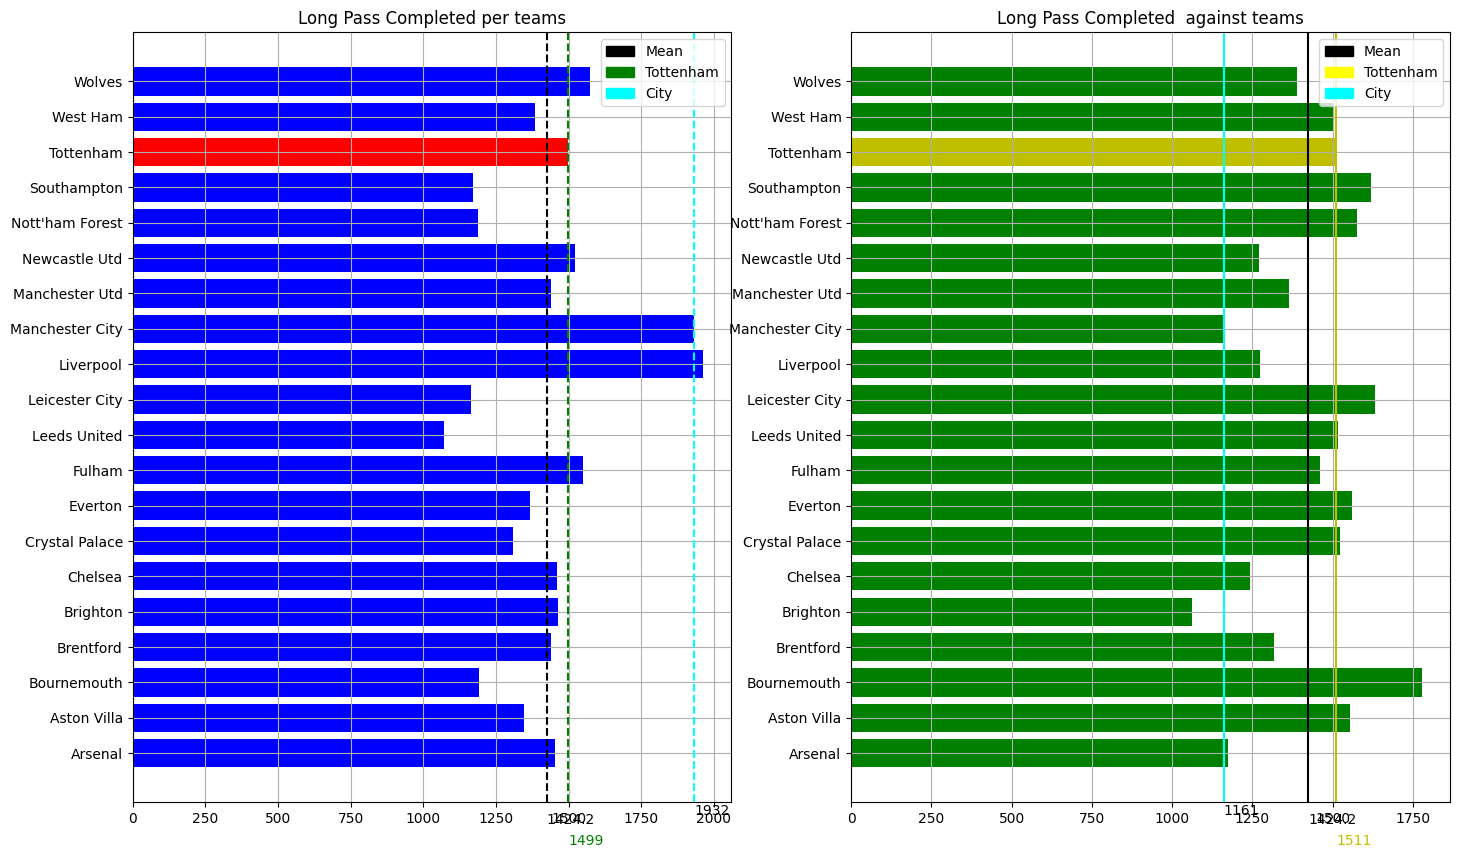

In [248]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico9.keys()),list(dico9.values()),color=colors)
ax[1].barh(list(dic9.keys()),list(dic9.values()),color=color)
ax[0].axvline(stat.mean(list(dico9.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico9.values())),-2, f'{stat.mean(list(dico9.values()))}',color='black')
ax[0].axvline(dico9["Tottenham"],color='green',linestyle='--')
ax[0].text(dico9["Tottenham"],-2.6, f'{dico9["Tottenham"]}',color='green')
ax[0].axvline(dico9["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico9["Manchester City"],-1.75, f'{dico9["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic9.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic9.values())),-2, f'{stat.mean(list(dic9.values()))}',color='black')
ax[1].axvline(dic9["Tottenham"],color='y',linestyle='-')
ax[1].text(dic9["Tottenham"],-2.6, f'{dic9["Tottenham"]}',color='y')
ax[1].axvline(dic9["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic9["Manchester City"],-1.75, f'{dic9["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Long Pass Completed per teams')
ax[1].set_title('Long Pass Completed  against teams')
ax[0].grid(True)
ax[1].grid(True)

***sub-axis3.11 : Long Pass Attempted***

In [249]:
dico10 = df.set_index('Squad')['LAtt'].to_dict()
dic10 = df1.set_index('Squad')['LAtt'].to_dict()

In [250]:
d20 = dico10.copy()
d21 = dico10.copy()
for (key,value) in d20.items():
  if value > np.percentile(list(d20.values()),90):
    d21[key]=20
  if value <= np.percentile(list(d20.values()),90) and value > np.percentile(list(d20.values()),80):
    d21[key]=18
  if value <= np.percentile(list(d20.values()),80) and value > np.percentile(list(d20.values()),70):
    d21[key]=16
  if value <= np.percentile(list(d20.values()),70) and value > np.percentile(list(d20.values()),60):
    d21[key]=14
  if value <= np.percentile(list(d20.values()),60) and value > np.percentile(list(d20.values()),50):
    d21[key]=12
  if value <= np.percentile(list(d20.values()),50) and value > np.percentile(list(d20.values()),40):
    d21[key]=10
  if value <= np.percentile(list(d20.values()),40) and value > np.percentile(list(d20.values()),30):
    d21[key]=8
  if value <= np.percentile(list(d20.values()),30) and value > np.percentile(list(d20.values()),20):
    d21[key]=6
  if value <= np.percentile(list(d20.values()),20) and value > np.percentile(list(d20.values()),10):
    d21[key]=4
  if value <= np.percentile(list(d20.values()),10):
    d21[key]=2

pprint.pprint(d21)
print(f"Mean :{stat.mean(list(d21.values()))}\n")

dd20 = dic10.copy()
dd21 = dic10.copy()
for (key,value) in dd20.items():
  if value > np.percentile(list(dd20.values()),90):
    dd21[key]=2
  if value <= np.percentile(list(dd20.values()),90) and value > np.percentile(list(dd20.values()),80):
    dd21[key]=4
  if value <= np.percentile(list(dd20.values()),80) and value > np.percentile(list(dd20.values()),70):
    dd21[key]=6
  if value <= np.percentile(list(dd20.values()),70) and value > np.percentile(list(dd20.values()),60):
    dd21[key]=8
  if value <= np.percentile(list(dd20.values()),60) and value > np.percentile(list(dd20.values()),50):
    dd21[key]=10
  if value <= np.percentile(list(dd20.values()),50) and value > np.percentile(list(dd20.values()),40):
    dd21[key]=12
  if value <= np.percentile(list(dd20.values()),40) and value > np.percentile(list(dd20.values()),30):
    dd21[key]=14
  if value <= np.percentile(list(dd20.values()),30) and value > np.percentile(list(dd20.values()),20):
    dd21[key]=16
  if value <= np.percentile(list(dd20.values()),20) and value > np.percentile(list(dd20.values()),10):
    dd21[key]=18
  if value <= np.percentile(list(dd20.values()),10):
    dd21[key]=20

pprint.pprint(dd21)
print(f"Mean :{stat.mean(list(dd21.values()))}\n")

{'Arsenal': 6,
 'Aston Villa': 8,
 'Bournemouth': 4,
 'Brentford': 18,
 'Brighton': 2,
 'Chelsea': 4,
 'Crystal Palace': 12,
 'Everton': 18,
 'Fulham': 16,
 'Leeds United': 6,
 'Leicester City': 2,
 'Liverpool': 20,
 'Manchester City': 16,
 'Manchester Utd': 10,
 'Newcastle Utd': 14,
 "Nott'ham Forest": 12,
 'Southampton': 8,
 'Tottenham': 10,
 'West Ham': 14,
 'Wolves': 18}
Mean :10.9

{'Arsenal': 18,
 'Aston Villa': 10,
 'Bournemouth': 2,
 'Brentford': 14,
 'Brighton': 20,
 'Chelsea': 20,
 'Crystal Palace': 12,
 'Everton': 6,
 'Fulham': 10,
 'Leeds United': 4,
 'Leicester City': 2,
 'Liverpool': 14,
 'Manchester City': 18,
 'Manchester Utd': 16,
 'Newcastle Utd': 12,
 "Nott'ham Forest": 6,
 'Southampton': 4,
 'Tottenham': 8,
 'West Ham': 8,
 'Wolves': 16}
Mean :11



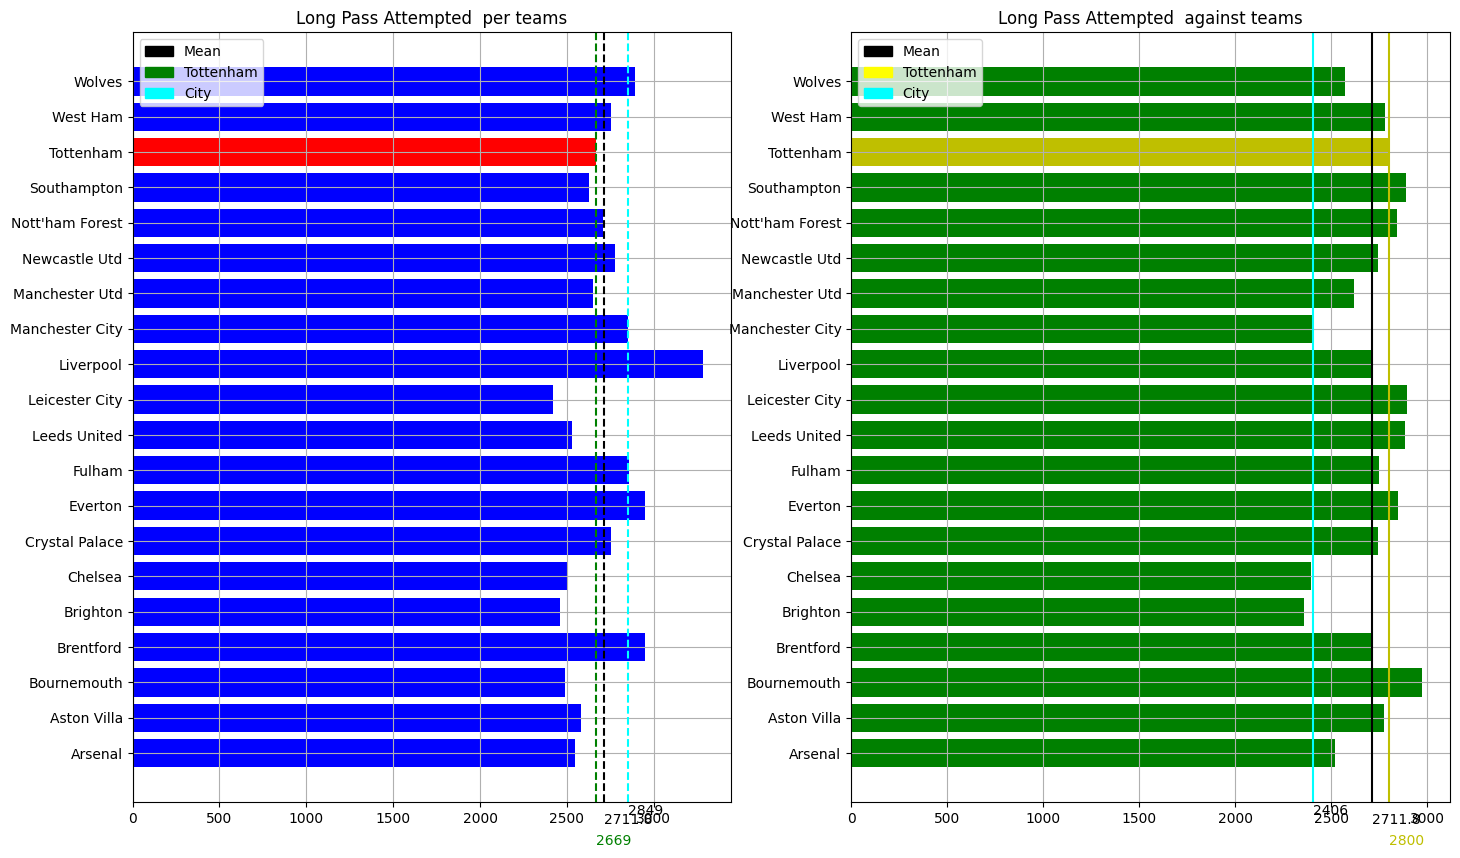

In [251]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico10.keys()),list(dico10.values()),color=colors)
ax[1].barh(list(dic10.keys()),list(dic10.values()),color=color)
ax[0].axvline(stat.mean(list(dico10.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico10.values())),-2, f'{stat.mean(list(dico10.values()))}',color='black')
ax[0].axvline(dico10["Tottenham"],color='green',linestyle='--')
ax[0].text(dico10["Tottenham"],-2.6, f'{dico10["Tottenham"]}',color='green')
ax[0].axvline(dico10["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico10["Manchester City"],-1.75, f'{dico10["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic10.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic10.values())),-2, f'{stat.mean(list(dic10.values()))}',color='black')
ax[1].axvline(dic10["Tottenham"],color='y',linestyle='-')
ax[1].text(dic10["Tottenham"],-2.6, f'{dic10["Tottenham"]}',color='y')
ax[1].axvline(dic10["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic10["Manchester City"],-1.75, f'{dic10["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Long Pass Attempted  per teams')
ax[1].set_title('Long Pass Attempted  against teams')
ax[0].grid(True)
ax[1].grid(True)

***sub-axis3.12 : %Long Pass Completed***

In [252]:
dico11 = df.set_index('Squad')['LCmp%'].to_dict()
dic11 = df1.set_index('Squad')['LCmp%'].to_dict()

In [253]:
d22 = dico11.copy()
d23 = dico11.copy()
for (key,value) in d22.items():
  if value > np.percentile(list(d22.values()),90):
    d23[key]=20
  if value <= np.percentile(list(d22.values()),90) and value > np.percentile(list(d22.values()),80):
    d23[key]=18
  if value <= np.percentile(list(d22.values()),80) and value > np.percentile(list(d22.values()),70):
    d23[key]=16
  if value <= np.percentile(list(d22.values()),70) and value > np.percentile(list(d22.values()),60):
    d23[key]=14
  if value <= np.percentile(list(d22.values()),60) and value > np.percentile(list(d22.values()),50):
    d23[key]=12
  if value <= np.percentile(list(d22.values()),50) and value > np.percentile(list(d22.values()),40):
    d23[key]=10
  if value <= np.percentile(list(d22.values()),40) and value > np.percentile(list(d22.values()),30):
    d23[key]=8
  if value <= np.percentile(list(d22.values()),30) and value > np.percentile(list(d22.values()),20):
    d23[key]=6
  if value <= np.percentile(list(d22.values()),20) and value > np.percentile(list(d22.values()),10):
    d23[key]=4
  if value <= np.percentile(list(d22.values()),10):
    d23[key]=2

pprint.pprint(d23)
print(f"Mean :{stat.mean(list(d23.values()))}\n")

dd22 = dic11.copy()
dd23 = dic11.copy()
for (key,value) in dd22.items():
  if value > np.percentile(list(dd22.values()),90):
    dd23[key]=2
  if value <= np.percentile(list(dd22.values()),90) and value > np.percentile(list(dd22.values()),80):
    dd23[key]=4
  if value <= np.percentile(list(dd22.values()),80) and value > np.percentile(list(dd22.values()),70):
    dd23[key]=6
  if value <= np.percentile(list(dd22.values()),70) and value > np.percentile(list(dd22.values()),60):
    dd23[key]=8
  if value <= np.percentile(list(dd22.values()),60) and value > np.percentile(list(dd22.values()),50):
    dd23[key]=10
  if value <= np.percentile(list(dd22.values()),50) and value > np.percentile(list(dd22.values()),40):
    dd23[key]=12
  if value <= np.percentile(list(dd22.values()),40) and value > np.percentile(list(dd22.values()),30):
    dd23[key]=14
  if value <= np.percentile(list(dd22.values()),30) and value > np.percentile(list(dd22.values()),20):
    dd23[key]=16
  if value <= np.percentile(list(dd22.values()),20) and value > np.percentile(list(dd22.values()),10):
    dd23[key]=18
  if value <= np.percentile(list(dd22.values()),10):
    dd23[key]=20

pprint.pprint(dd23)
print(f"Mean :{stat.mean(list(dd23.values()))}\n")

{'Arsenal': 16,
 'Aston Villa': 10,
 'Bournemouth': 6,
 'Brentford': 8,
 'Brighton': 18,
 'Chelsea': 18,
 'Crystal Palace': 6,
 'Everton': 4,
 'Fulham': 12,
 'Leeds United': 2,
 'Leicester City': 8,
 'Liverpool': 20,
 'Manchester City': 20,
 'Manchester Utd': 12,
 'Newcastle Utd': 14,
 "Nott'ham Forest": 2,
 'Southampton': 4,
 'Tottenham': 16,
 'West Ham': 10,
 'Wolves': 14}
Mean :11

{'Arsenal': 18,
 'Aston Villa': 4,
 'Bournemouth': 2,
 'Brentford': 16,
 'Brighton': 20,
 'Chelsea': 14,
 'Crystal Palace': 6,
 'Everton': 8,
 'Fulham': 12,
 'Leeds United': 12,
 'Leicester City': 2,
 'Liverpool': 18,
 'Manchester City': 16,
 'Manchester Utd': 14,
 'Newcastle Utd': 20,
 "Nott'ham Forest": 6,
 'Southampton': 4,
 'Tottenham': 10,
 'West Ham': 8,
 'Wolves': 10}
Mean :11



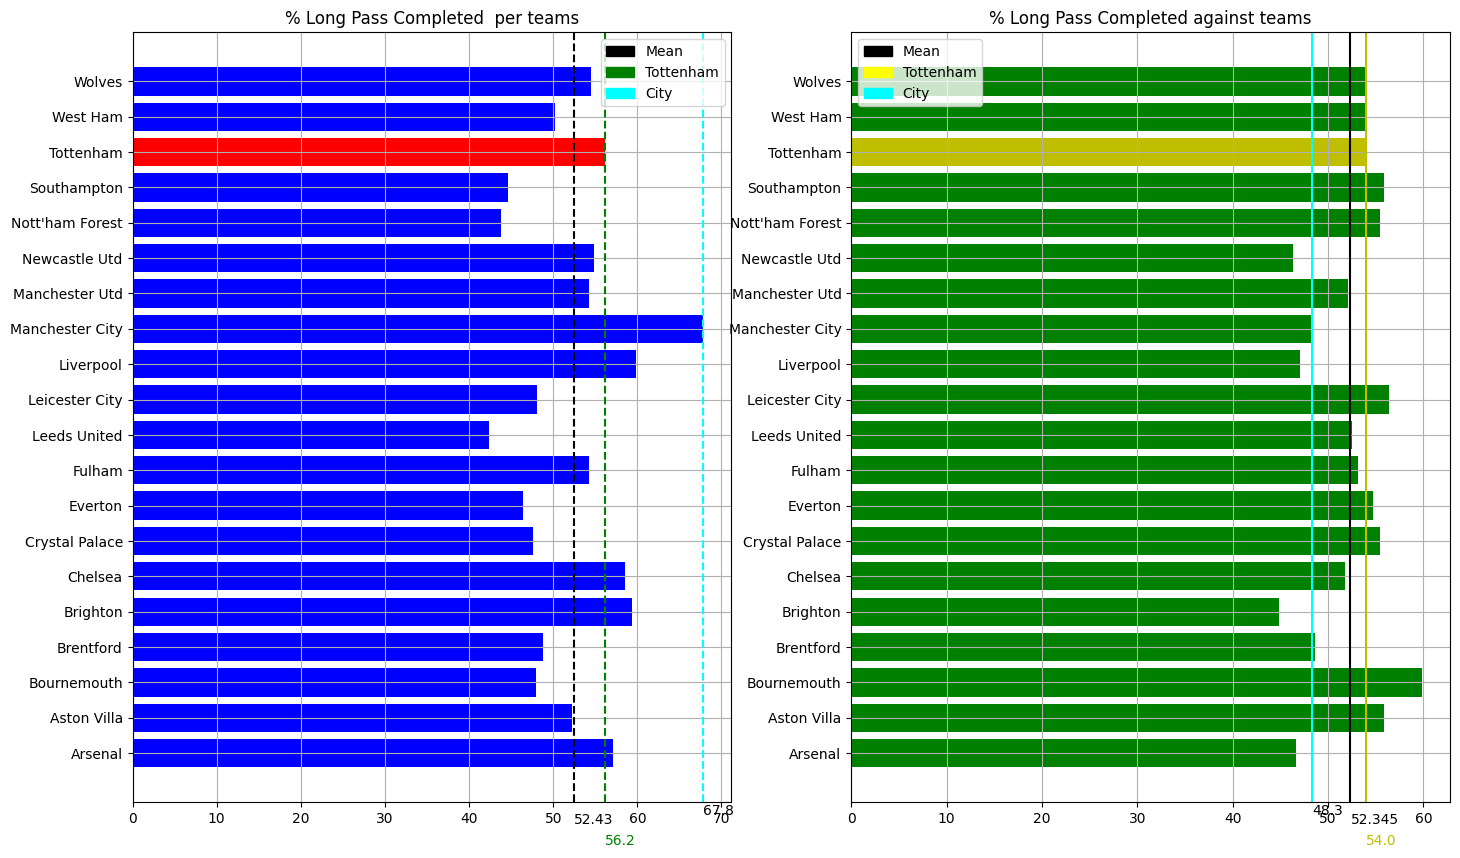

In [254]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico11.keys()),list(dico11.values()),color=colors)
ax[1].barh(list(dic11.keys()),list(dic11.values()),color=color)
ax[0].axvline(stat.mean(list(dico11.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico11.values())),-2, f'{stat.mean(list(dico11.values()))}',color='black')
ax[0].axvline(dico11["Tottenham"],color='green',linestyle='--')
ax[0].text(dico11["Tottenham"],-2.6, f'{dico11["Tottenham"]}',color='green')
ax[0].axvline(dico11["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico11["Manchester City"],-1.75, f'{dico11["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic11.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic11.values())),-2, f'{stat.mean(list(dic11.values()))}',color='black')
ax[1].axvline(dic11["Tottenham"],color='y',linestyle='-')
ax[1].text(dic11["Tottenham"],-2.6, f'{dic11["Tottenham"]}',color='y')
ax[1].axvline(dic11["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic11["Manchester City"],-1.75, f'{dic11["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('% Long Pass Completed  per teams')
ax[1].set_title('% Long Pass Completed against teams')
ax[0].grid(True)
ax[1].grid(True)

In [255]:
def moyenne(liste):
  return sum(liste) / len(liste)


def calculer_moyenne(dictionnaires):
  dictionnaire_moyenne = {}
  for clé in dictionnaires[0].keys():
    valeurs = [dictionnaire[clé] for dictionnaire in dictionnaires]
    moyenne_valeur = moyenne(valeurs)
    dictionnaire_moyenne[clé] = moyenne_valeur
  return dictionnaire_moyenne


def afficher_dictionnaire(dictionnaire):
  for clé, valeur in dictionnaire.items():
    print(f"{clé}: {valeur}")


dictionnaires = [d1,dd1,d3,dd3,d5,dd5,d7,dd7,d9,dd9,d11,dd11,d13,dd13,d15,dd15,d17,dd17,d19,dd19,d21,dd21,d23,dd23]

dictionnaire_moyenne = calculer_moyenne(dictionnaires)

dictionnaire_moyenne = dict(sorted(dictionnaire_moyenne.items(), key=lambda item: item[1], reverse=True))

afficher_dictionnaire(dictionnaire_moyenne)

Manchester City: 18.833333333333332
Liverpool: 18.333333333333332
Arsenal: 17.583333333333332
Brighton: 17.333333333333332
Chelsea: 16.416666666666668
Manchester Utd: 14.166666666666666
Newcastle Utd: 13.5
Wolves: 12.583333333333334
Tottenham: 11.5
Fulham: 11.333333333333334
Aston Villa: 11.0
Crystal Palace: 8.5
Leeds United: 8.416666666666666
Leicester City: 8.0
Brentford: 7.416666666666667
Southampton: 6.666666666666667
West Ham: 5.75
Everton: 5.583333333333333
Bournemouth: 3.75
Nott'ham Forest: 3.1666666666666665


# ***2-Players Rating and selection***

In [256]:
data = pd.read_excel('/content/all_players_passing_stats.xlsx')
data

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,...,Ast,xAG,xA,A-xAG,KP,2023-03-01 00:00:00,PPA,CrsPA,PrgP,Matches
0,1,Brenden Aaronson,us USA,"MF,FW",Leeds United,eng Premier League,21,2000,26.4,592.0,...,3,4.2,2.6,-1.2,46.0,47.0,16.0,4.0,86.0,Matches
1,2,Paxten Aaronson,us USA,"MF,DF",Eint Frankfurt,de Bundesliga,18,2003,1.9,51.0,...,0,0.0,0.1,0.0,1.0,3.0,0.0,0.0,6.0,Matches
2,3,James Abankwah,ie IRL,DF,Udinese,it Serie A,18,2004,0.7,23.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches
3,4,George Abbott,eng ENG,MF,Tottenham,eng Premier League,16,2005,0.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34,1987,37.0,1679.0,...,2,1.0,0.9,1.0,13.0,155.0,5.0,0.0,215.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,2885,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23,1998,34.7,1449.0,...,7,8.1,7.9,-1.1,76.0,135.0,91.0,4.0,266.0,Matches
2885,2886,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,32,1990,15.2,268.0,...,1,1.3,0.9,-0.3,21.0,27.0,5.0,0.0,29.0,Matches
2886,2887,Filip Đuričić,rs SRB,"MF,FW",Sampdoria,it Serie A,30,1992,24.1,586.0,...,0,1.9,1.6,-1.9,34.0,50.0,18.0,4.0,77.0,Matches
2887,2888,Blanco,NaN,MF,Cádiz,es La Liga,22,2000,1.8,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches


***sub-axis3.1 :Pass Completed***

In [257]:
pas = data.set_index('Player')['Cmp'].to_dict()
dicttt = data.set_index('Player')['Squad'].to_dict()
g = data.set_index('Player')['90s'].to_dict()

In [258]:
def replace_nan_values_with_l_keys(l):
  """Returns a new dictionary containing the original list, with NaN values replaced by 0, and using the keys of l as the keys of the dictionary."""
  dictionary = {}
  for key, value in l.items():
    if math.isnan(value):
      dictionary[key] = 0
    else:
      dictionary[key] = value
  return dictionary

pasb = replace_nan_values_with_l_keys(pas)

In [259]:
ll= pasb.copy()

for (key,value) in ll.copy().items():
  if value > np.percentile(list(ll.copy().values()),98):
    ll[key]=20
  if value <= np.percentile(list(ll.values()),98) and value > np.percentile(list(ll.values()),96):
    ll[key]=19
  if value <= np.percentile(list(ll.values()),96) and value > np.percentile(list(ll.values()),90):
    ll[key]=18
  if value <= np.percentile(list(ll.values()),90) and value > np.percentile(list(ll.values()),85):
    ll[key]=17
  if value <= np.percentile(list(ll.values()),85) and value > np.percentile(list(ll.values()),80):
    ll[key]=16
  if value <= np.percentile(list(ll.values()),80) and value > np.percentile(list(ll.values()),75):
    ll[key]=15
  if value <= np.percentile(list(ll.values()),75) and value > np.percentile(list(ll.values()),65):
    ll[key]=14
  if value <= np.percentile(list(ll.values()),65) and value > np.percentile(list(ll.values()),60):
    ll[key]=13
  if value <= np.percentile(list(ll.values()),60) and value > np.percentile(list(ll.values()),55):
    ll[key]=12
  if value <= np.percentile(list(ll.values()),55) and value > np.percentile(list(ll.values()),50):
    ll[key]=11
  if value <= np.percentile(list(ll.values()),50) and value > np.percentile(list(ll.values()),45):
    ll[key]=10
  if value <= np.percentile(list(ll.values()),45) and value > np.percentile(list(ll.values()),40):
    ll[key]=9
  if value <= np.percentile(list(ll.values()),40) and value > np.percentile(list(ll.values()),35):
    ll[key]=8
  if value <= np.percentile(list(ll.values()),35) and value > np.percentile(list(ll.values()),30):
    ll[key]=7
  if value <= np.percentile(list(ll.values()),30) and value > np.percentile(list(ll.values()),25):
    ll[key]=6
  if value <= np.percentile(list(ll.values()),25) and value > np.percentile(list(ll.values()),20):
    ll[key]=5
  if value <= np.percentile(list(ll.values()),20) and value > np.percentile(list(ll.values()),15):
    ll[key]=4
  if value <= np.percentile(list(ll.values()),15) and value > np.percentile(list(ll.values()),10):
    ll[key]=3
  if value <= np.percentile(list(ll.values()),10) and value > np.percentile(list(ll.values()),5):
    ll[key]=2
  if value <= np.percentile(list(ll.values()),5):
    ll[key]=1

pprint.pprint(ll)
print(f"Mean :{stat.mean(list(ll.values()))}\n")


{'Aaron Cresswell': 18,
 'Aaron Hickey': 16,
 'Aaron Ramsdale': 18,
 'Aaron Ramsey': 18,
 'Aaron Wan-Bissaka': 20,
 'Aaron Zehnter': 1,
 'Aarón Martín': 17,
 'Abdallah Sima': 18,
 'Abdelhamid Sabiri': 17,
 'Abdessamad Ezzalzouli': 14,
 'Abdou Diallo': 13,
 'Abdou Harroui': 13,
 'Abdoul Kader Bamba': 11,
 'Abdoulaye Bamba': 14,
 'Abdoulaye Doucouré': 14,
 'Abdu Conté': 14,
 'Abdul Mumin': 16,
 'Abdón Prats': 15,
 'Abner': 9,
 'Achraf Dari': 14,
 'Achraf Hakimi': 18,
 'Adam Armstrong': 9,
 'Adam Buksa': 4,
 'Adam Forshaw': 12,
 'Adam Hložek': 14,
 'Adam Lallana': 14,
 'Adam Marušić': 20,
 'Adam Masina': 15,
 'Adam Ounas': 17,
 'Adam Smith': 19,
 'Adam Webster': 20,
 'Adama Soumaoro': 19,
 'Adama Traoré': 19,
 'Ademola Lookman': 16,
 'Adil Aouchiche': 6,
 'Adil Rami': 18,
 'Adnan Januzaj': 8,
 'Ado Onaiwu': 16,
 'Adolfo Gaich': 10,
 'Adri Embarba': 2,
 'Adrian Grbić': 1,
 'Adrien Hunou': 15,
 'Adrien Rabiot': 18,
 'Adrien Tameze': 19,
 'Adrien Thomasson': 18,
 'Adrien Truffert': 20,
 'Adr

In [260]:
tt0 = ll.copy()
ttt = dicttt.copy()
for (key,value) in tt0.copy().items():
  if value < np.percentile(list(tt0.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt0[key]
pprint.pprint(tt0)

{'Adam Marušić': 20,
 'Adam Webster': 20,
 'Adrien Truffert': 20,
 'Alessio Romagnoli': 20,
 'Alexis Mac Allister': 20,
 'Amir Rrahmani': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Andrew Robertson': 20,
 'Anthony Rouault': 20,
 'Antonee Robinson': 20,
 'Antonio Rüdiger': 20,
 'Arthur Theate': 20,
 'Ashley Young': 20,
 'Aurélien Tchouaméni': 20,
 'Axel Witsel': 20,
 'Bafodé Diakité': 20,
 'Benjamin André': 20,
 'Benjamin Pavard': 20,
 'Bernardo Silva': 20,
 'Birama Touré': 20,
 'Caio Henrique Oliveira Silva': 20,
 'Callum Wilson': 20,
 'Castello Lukeba': 20,
 'Cengiz Ünder': 20,
 'Chris Smalling': 20,
 'Clément Vidal': 20,
 'Corentin Tolisso': 20,
 'Cristian Romero': 20,
 'Daniel Parejo': 20,
 'Daniel Vivian': 20,
 'Danilo': 20,
 'Danilo Pereira': 20,
 'Danny Ward': 20,
 'Danny Welbeck': 20,
 'Dante': 20,
 'Dayot Upamecano': 20,
 'Declan Rice': 20,
 'Destiny Udogie': 20,
 'Djibril Sow': 20,
 'Dominik Szoboszlai': 20,
 'Edmond Tapsoba': 20,
 'Ellyes Skhiri': 20,
 'Emanuele Valeri': 20,
 '

***sub-axis3.2 : Pass Attempted***

In [261]:
pas1 = data.set_index('Player')['Att'].to_dict()
pas1b = replace_nan_values_with_l_keys(pas1)

In [262]:
ll1= pas1b.copy()

for (key,value) in ll1.copy().items():
  if value > np.percentile(list(ll1.copy().values()),98):
    ll1[key]=20
  if value <= np.percentile(list(ll1.values()),98) and value > np.percentile(list(ll1.values()),96):
    ll1[key]=19
  if value <= np.percentile(list(ll1.values()),96) and value > np.percentile(list(ll1.values()),90):
    ll1[key]=18
  if value <= np.percentile(list(ll1.values()),90) and value > np.percentile(list(ll1.values()),85):
    ll1[key]=17
  if value <= np.percentile(list(ll1.values()),85) and value > np.percentile(list(ll1.values()),80):
    ll1[key]=16
  if value <= np.percentile(list(ll1.values()),80) and value > np.percentile(list(ll1.values()),75):
    ll1[key]=15
  if value <= np.percentile(list(ll1.values()),75) and value > np.percentile(list(ll1.values()),65):
    ll1[key]=14
  if value <= np.percentile(list(ll1.values()),65) and value > np.percentile(list(ll1.values()),60):
    ll1[key]=13
  if value <= np.percentile(list(ll1.values()),60) and value > np.percentile(list(ll1.values()),55):
    ll1[key]=12
  if value <= np.percentile(list(ll1.values()),55) and value > np.percentile(list(ll1.values()),50):
    ll1[key]=11
  if value <= np.percentile(list(ll1.values()),50) and value > np.percentile(list(ll1.values()),45):
    ll1[key]=10
  if value <= np.percentile(list(ll1.values()),45) and value > np.percentile(list(ll1.values()),40):
    ll1[key]=9
  if value <= np.percentile(list(ll1.values()),40) and value > np.percentile(list(ll1.values()),35):
    ll1[key]=8
  if value <= np.percentile(list(ll1.values()),35) and value > np.percentile(list(ll1.values()),30):
    ll1[key]=7
  if value <= np.percentile(list(ll1.values()),30) and value > np.percentile(list(ll1.values()),25):
    ll1[key]=6
  if value <= np.percentile(list(ll1.values()),25) and value > np.percentile(list(ll1.values()),20):
    ll1[key]=5
  if value <= np.percentile(list(ll1.values()),20) and value > np.percentile(list(ll1.values()),15):
    ll1[key]=4
  if value <= np.percentile(list(ll1.values()),15) and value > np.percentile(list(ll1.values()),10):
    ll1[key]=3
  if value <= np.percentile(list(ll1.values()),10) and value > np.percentile(list(ll1.values()),5):
    ll1[key]=2
  if value <= np.percentile(list(ll1.values()),5):
    ll1[key]=1

pprint.pprint(ll1)
print(f"Mean :{stat.mean(list(ll1.values()))}\n")


{'Aaron Cresswell': 18,
 'Aaron Hickey': 16,
 'Aaron Ramsdale': 18,
 'Aaron Ramsey': 18,
 'Aaron Wan-Bissaka': 20,
 'Aaron Zehnter': 1,
 'Aarón Martín': 18,
 'Abdallah Sima': 18,
 'Abdelhamid Sabiri': 18,
 'Abdessamad Ezzalzouli': 14,
 'Abdou Diallo': 12,
 'Abdou Harroui': 13,
 'Abdoul Kader Bamba': 11,
 'Abdoulaye Bamba': 13,
 'Abdoulaye Doucouré': 14,
 'Abdu Conté': 14,
 'Abdul Mumin': 16,
 'Abdón Prats': 16,
 'Abner': 9,
 'Achraf Dari': 14,
 'Achraf Hakimi': 18,
 'Adam Armstrong': 9,
 'Adam Buksa': 5,
 'Adam Forshaw': 11,
 'Adam Hložek': 14,
 'Adam Lallana': 14,
 'Adam Marušić': 20,
 'Adam Masina': 15,
 'Adam Ounas': 17,
 'Adam Smith': 19,
 'Adam Webster': 20,
 'Adama Soumaoro': 19,
 'Adama Traoré': 19,
 'Ademola Lookman': 16,
 'Adil Aouchiche': 6,
 'Adil Rami': 18,
 'Adnan Januzaj': 11,
 'Ado Onaiwu': 16,
 'Adolfo Gaich': 11,
 'Adri Embarba': 2,
 'Adrian Grbić': 1,
 'Adrien Hunou': 15,
 'Adrien Rabiot': 18,
 'Adrien Tameze': 19,
 'Adrien Thomasson': 18,
 'Adrien Truffert': 20,
 'Ad

In [263]:
tt1 = ll1.copy()
ttt = dicttt.copy()
for (key,value) in tt1.copy().items():
  if value < np.percentile(list(tt1.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt1[key]
pprint.pprint(tt1)

{'Adam Marušić': 20,
 'Adam Webster': 20,
 'Adrien Truffert': 20,
 'Alessio Romagnoli': 20,
 'Amir Rrahmani': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Andrew Robertson': 20,
 'Anthony Rouault': 20,
 'Antonee Robinson': 20,
 'Antonio Rüdiger': 20,
 'Arthur Theate': 20,
 'Ashley Young': 20,
 'Aurélien Tchouaméni': 20,
 'Axel Witsel': 20,
 'Benjamin André': 20,
 'Benjamin Pavard': 20,
 'Bernardo Silva': 20,
 'Birama Touré': 20,
 'Borna Sosa': 20,
 'Branco van den Boomen': 20,
 'Bruno Fernandes': 20,
 'Caio Henrique Oliveira Silva': 20,
 'Callum Wilson': 20,
 'Castello Lukeba': 20,
 'Cengiz Ünder': 20,
 'Christopher Trimmel': 20,
 'Clément Vidal': 20,
 'Corentin Tolisso': 20,
 'Cristian Romero': 20,
 'Daniel Parejo': 20,
 'Daniel Vivian': 20,
 'Danilo': 20,
 'Danilo Pereira': 20,
 'Danny Ward': 20,
 'Danny Welbeck': 20,
 'Dante': 20,
 'David Raya': 20,
 'Dayot Upamecano': 20,
 'Declan Rice': 20,
 'Destiny Udogie': 20,
 'Djibril Sow': 20,
 'Dominik Szoboszlai': 20,
 'Edmond Tapsoba': 20,
 '

***sub-axis3.3 : %Pass Completed***

In [264]:
pas2 = data.set_index('Player')['Cmp%'].to_dict()
pas2b = replace_nan_values_with_l_keys(pas2)

In [265]:
ll2= pas2b.copy()

for (key,value) in ll2.copy().items():
  if value > np.percentile(list(ll2.copy().values()),98):
    ll2[key]=20
  if value <= np.percentile(list(ll2.values()),98) and value > np.percentile(list(ll2.values()),96):
    ll2[key]=19
  if value <= np.percentile(list(ll2.values()),96) and value > np.percentile(list(ll2.values()),90):
    ll2[key]=18
  if value <= np.percentile(list(ll2.values()),90) and value > np.percentile(list(ll2.values()),85):
    ll2[key]=17
  if value <= np.percentile(list(ll2.values()),85) and value > np.percentile(list(ll2.values()),80):
    ll2[key]=16
  if value <= np.percentile(list(ll2.values()),80) and value > np.percentile(list(ll2.values()),75):
    ll2[key]=15
  if value <= np.percentile(list(ll2.values()),75) and value > np.percentile(list(ll2.values()),65):
    ll2[key]=14
  if value <= np.percentile(list(ll2.values()),65) and value > np.percentile(list(ll2.values()),60):
    ll2[key]=13
  if value <= np.percentile(list(ll2.values()),60) and value > np.percentile(list(ll2.values()),55):
    ll2[key]=12
  if value <= np.percentile(list(ll2.values()),55) and value > np.percentile(list(ll2.values()),50):
    ll2[key]=11
  if value <= np.percentile(list(ll2.values()),50) and value > np.percentile(list(ll2.values()),45):
    ll2[key]=10
  if value <= np.percentile(list(ll2.values()),45) and value > np.percentile(list(ll2.values()),40):
    ll2[key]=9
  if value <= np.percentile(list(ll2.values()),40) and value > np.percentile(list(ll2.values()),35):
    ll2[key]=8
  if value <= np.percentile(list(ll2.values()),35) and value > np.percentile(list(ll2.values()),30):
    ll2[key]=7
  if value <= np.percentile(list(ll2.values()),30) and value > np.percentile(list(ll2.values()),25):
    ll2[key]=6
  if value <= np.percentile(list(ll2.values()),25) and value > np.percentile(list(ll2.values()),20):
    ll2[key]=5
  if value <= np.percentile(list(ll2.values()),20) and value > np.percentile(list(ll2.values()),15):
    ll2[key]=4
  if value <= np.percentile(list(ll2.values()),15) and value > np.percentile(list(ll2.values()),10):
    ll2[key]=3
  if value <= np.percentile(list(ll2.values()),10) and value > np.percentile(list(ll2.values()),5):
    ll2[key]=2
  if value <= np.percentile(list(ll2.values()),5):
    ll2[key]=1

pprint.pprint(ll2)
print(f"Mean :{stat.mean(list(ll2.values()))}\n")


{'Aaron Cresswell': 13,
 'Aaron Hickey': 16,
 'Aaron Ramsdale': 16,
 'Aaron Ramsey': 18,
 'Aaron Wan-Bissaka': 20,
 'Aaron Zehnter': 1,
 'Aarón Martín': 14,
 'Abdallah Sima': 17,
 'Abdelhamid Sabiri': 16,
 'Abdessamad Ezzalzouli': 9,
 'Abdou Diallo': 16,
 'Abdou Harroui': 16,
 'Abdoul Kader Bamba': 16,
 'Abdoulaye Bamba': 17,
 'Abdoulaye Doucouré': 14,
 'Abdu Conté': 13,
 'Abdul Mumin': 16,
 'Abdón Prats': 15,
 'Abner': 6,
 'Achraf Dari': 14,
 'Achraf Hakimi': 18,
 'Adam Armstrong': 8,
 'Adam Buksa': 5,
 'Adam Forshaw': 14,
 'Adam Hložek': 12,
 'Adam Lallana': 17,
 'Adam Marušić': 18,
 'Adam Masina': 16,
 'Adam Ounas': 15,
 'Adam Smith': 18,
 'Adam Webster': 20,
 'Adama Soumaoro': 20,
 'Adama Traoré': 18,
 'Ademola Lookman': 14,
 'Adil Aouchiche': 9,
 'Adil Rami': 18,
 'Adnan Januzaj': 10,
 'Ado Onaiwu': 16,
 'Adolfo Gaich': 8,
 'Adri Embarba': 9,
 'Adrian Grbić': 8,
 'Adrien Hunou': 14,
 'Adrien Rabiot': 18,
 'Adrien Tameze': 18,
 'Adrien Thomasson': 18,
 'Adrien Truffert': 19,
 'Adri

In [266]:
tt2 = ll2.copy()
ttt = dicttt.copy()
for (key,value) in tt2.copy().items():
  if value < np.percentile(list(tt2.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt2[key]
pprint.pprint(tt2)

{'Adam Webster': 20,
 'Adama Soumaoro': 20,
 'Alessio Romagnoli': 20,
 'Amir Rrahmani': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Antonio Rüdiger': 20,
 'Arthur Theate': 20,
 'Ashley Young': 20,
 'Aurélien Tchouaméni': 20,
 'Axel Witsel': 20,
 'Chris Smalling': 20,
 'Corentin Tolisso': 20,
 'Daniel Vivian': 20,
 'Danilo Pereira': 20,
 'Danny Welbeck': 20,
 'Dayot Upamecano': 20,
 'Destiny Udogie': 20,
 'Edmond Tapsoba': 20,
 'Ellyes Skhiri': 20,
 'Fabián Ruiz Peña': 20,
 'Federico Valverde': 20,
 'Fikayo Tomori': 20,
 'Filip Đuričić': 20,
 'Hamari Traoré': 20,
 'Igor Zubeldia': 20,
 'James Ward-Prowse': 20,
 'Jean-Clair Todibo': 20,
 'Jeremy Toljan': 20,
 'Joe Willock': 20,
 'Joe Worrall': 20,
 'John Stones': 20,
 'Jonathan Tah': 20,
 'Jordan Veretout': 20,
 'Joël Veltman': 20,
 'Julian Weigl': 20,
 'Khéphren Thuram': 20,
 'Kurt Zouma': 20,
 'Kyle Walker': 20,
 'Kyle Walker-Peters': 20,
 'Marc-André ter Stegen': 20,
 'Marco Verratti': 20,
 'Marquinhos': 20,
 'Martín Zubimendi': 20,
 'Ma

***sub-axis3.4 : Short Pass Completed***

In [267]:
pas3 = data.set_index('Player')['SCmp'].to_dict()
pas3b = replace_nan_values_with_l_keys(pas3)

In [268]:
ll3= pas3b.copy()

for (key,value) in ll3.copy().items():
  if value > np.percentile(list(ll3.copy().values()),98):
    ll3[key]=20
  if value <= np.percentile(list(ll3.values()),98) and value > np.percentile(list(ll3.values()),96):
    ll3[key]=19
  if value <= np.percentile(list(ll3.values()),96) and value > np.percentile(list(ll3.values()),90):
    ll3[key]=18
  if value <= np.percentile(list(ll3.values()),90) and value > np.percentile(list(ll3.values()),85):
    ll3[key]=17
  if value <= np.percentile(list(ll3.values()),85) and value > np.percentile(list(ll3.values()),80):
    ll3[key]=16
  if value <= np.percentile(list(ll3.values()),80) and value > np.percentile(list(ll3.values()),75):
    ll3[key]=15
  if value <= np.percentile(list(ll3.values()),75) and value > np.percentile(list(ll3.values()),65):
    ll3[key]=14
  if value <= np.percentile(list(ll3.values()),65) and value > np.percentile(list(ll3.values()),60):
    ll3[key]=13
  if value <= np.percentile(list(ll3.values()),60) and value > np.percentile(list(ll3.values()),55):
    ll3[key]=12
  if value <= np.percentile(list(ll3.values()),55) and value > np.percentile(list(ll3.values()),50):
    ll3[key]=11
  if value <= np.percentile(list(ll3.values()),50) and value > np.percentile(list(ll3.values()),45):
    ll3[key]=10
  if value <= np.percentile(list(ll3.values()),45) and value > np.percentile(list(ll3.values()),40):
    ll3[key]=9
  if value <= np.percentile(list(ll3.values()),40) and value > np.percentile(list(ll3.values()),35):
    ll3[key]=8
  if value <= np.percentile(list(ll3.values()),35) and value > np.percentile(list(ll3.values()),30):
    ll3[key]=7
  if value <= np.percentile(list(ll3.values()),30) and value > np.percentile(list(ll3.values()),25):
    ll3[key]=6
  if value <= np.percentile(list(ll3.values()),25) and value > np.percentile(list(ll3.values()),20):
    ll3[key]=5
  if value <= np.percentile(list(ll3.values()),20) and value > np.percentile(list(ll3.values()),15):
    ll3[key]=4
  if value <= np.percentile(list(ll3.values()),15) and value > np.percentile(list(ll3.values()),10):
    ll3[key]=3
  if value <= np.percentile(list(ll3.values()),10) and value > np.percentile(list(ll3.values()),5):
    ll3[key]=2
  if value <= np.percentile(list(ll3.values()),5):
    ll3[key]=1

pprint.pprint(ll3)
print(f"Mean :{stat.mean(list(ll3.values()))}\n")


{'Aaron Cresswell': 18,
 'Aaron Hickey': 17,
 'Aaron Ramsdale': 17,
 'Aaron Ramsey': 18,
 'Aaron Wan-Bissaka': 20,
 'Aaron Zehnter': 1,
 'Aarón Martín': 18,
 'Abdallah Sima': 18,
 'Abdelhamid Sabiri': 17,
 'Abdessamad Ezzalzouli': 14,
 'Abdou Diallo': 12,
 'Abdou Harroui': 14,
 'Abdoul Kader Bamba': 9,
 'Abdoulaye Bamba': 14,
 'Abdoulaye Doucouré': 14,
 'Abdu Conté': 14,
 'Abdul Mumin': 15,
 'Abdón Prats': 15,
 'Abner': 9,
 'Achraf Dari': 12,
 'Achraf Hakimi': 20,
 'Adam Armstrong': 9,
 'Adam Buksa': 3,
 'Adam Forshaw': 12,
 'Adam Hložek': 14,
 'Adam Lallana': 15,
 'Adam Marušić': 20,
 'Adam Masina': 15,
 'Adam Ounas': 17,
 'Adam Smith': 19,
 'Adam Webster': 20,
 'Adama Soumaoro': 19,
 'Adama Traoré': 19,
 'Ademola Lookman': 17,
 'Adil Aouchiche': 7,
 'Adil Rami': 17,
 'Adnan Januzaj': 5,
 'Ado Onaiwu': 16,
 'Adolfo Gaich': 11,
 'Adri Embarba': 1,
 'Adrian Grbić': 1,
 'Adrien Hunou': 16,
 'Adrien Rabiot': 19,
 'Adrien Tameze': 19,
 'Adrien Thomasson': 19,
 'Adrien Truffert': 20,
 'Adri

In [269]:
tt3 = ll3.copy()
ttt = dicttt.copy()
for (key,value) in tt3.copy().items():
  if value < np.percentile(list(tt3.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt3[key]
pprint.pprint(tt3)

{'Achraf Hakimi': 20,
 'Adam Marušić': 20,
 'Adam Webster': 20,
 'Adrien Truffert': 20,
 'Alejandro Balde': 20,
 'Alessio Romagnoli': 20,
 'Alexis Mac Allister': 20,
 'Amir Rrahmani': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Andrew Robertson': 20,
 'Anthony Rouault': 20,
 'Antonee Robinson': 20,
 'Antonio Rüdiger': 20,
 'Arnau Martinez': 20,
 'Arthur Theate': 20,
 'Ashley Young': 20,
 'Aurélien Tchouaméni': 20,
 'Axel Witsel': 20,
 'Bafodé Diakité': 20,
 'Benjamin André': 20,
 'Benjamin Pavard': 20,
 'Bernardo Silva': 20,
 'Birama Touré': 20,
 'Borna Sosa': 20,
 'Bruno Fernandes': 20,
 'Caio Henrique Oliveira Silva': 20,
 'Callum Wilson': 20,
 'Castello Lukeba': 20,
 'Cengiz Ünder': 20,
 'Corentin Tolisso': 20,
 'Daniel Parejo': 20,
 'Daniel Vivian': 20,
 'Danilo Pereira': 20,
 'Danny Ward': 20,
 'Danny Welbeck': 20,
 'Dante': 20,
 'David Silva': 20,
 'Dayot Upamecano': 20,
 'Declan Rice': 20,
 'Destiny Udogie': 20,
 'Djibril Sow': 20,
 'Dominik Szoboszlai': 20,
 'Edmond Tapsoba': 20,


In [270]:
pas4 = data.set_index('Player')['SCmp'].to_dict()
pas4b = replace_nan_values_with_l_keys(pas4)

In [271]:
ll4= pas4b.copy()

for (key,value) in ll4.copy().items():
  if value > np.percentile(list(ll4.copy().values()),98):
    ll4[key]=20
  if value <= np.percentile(list(ll4.values()),98) and value > np.percentile(list(ll4.values()),96):
    ll4[key]=19
  if value <= np.percentile(list(ll4.values()),96) and value > np.percentile(list(ll4.values()),90):
    ll4[key]=18
  if value <= np.percentile(list(ll4.values()),90) and value > np.percentile(list(ll4.values()),85):
    ll4[key]=17
  if value <= np.percentile(list(ll4.values()),85) and value > np.percentile(list(ll4.values()),80):
    ll4[key]=16
  if value <= np.percentile(list(ll4.values()),80) and value > np.percentile(list(ll4.values()),75):
    ll4[key]=15
  if value <= np.percentile(list(ll4.values()),75) and value > np.percentile(list(ll4.values()),65):
    ll4[key]=14
  if value <= np.percentile(list(ll4.values()),65) and value > np.percentile(list(ll4.values()),60):
    ll4[key]=13
  if value <= np.percentile(list(ll4.values()),60) and value > np.percentile(list(ll4.values()),55):
    ll4[key]=12
  if value <= np.percentile(list(ll4.values()),55) and value > np.percentile(list(ll4.values()),50):
    ll4[key]=11
  if value <= np.percentile(list(ll4.values()),50) and value > np.percentile(list(ll4.values()),45):
    ll4[key]=10
  if value <= np.percentile(list(ll4.values()),45) and value > np.percentile(list(ll4.values()),40):
    ll4[key]=9
  if value <= np.percentile(list(ll4.values()),40) and value > np.percentile(list(ll4.values()),35):
    ll4[key]=8
  if value <= np.percentile(list(ll4.values()),35) and value > np.percentile(list(ll4.values()),30):
    ll4[key]=7
  if value <= np.percentile(list(ll4.values()),30) and value > np.percentile(list(ll4.values()),25):
    ll4[key]=6
  if value <= np.percentile(list(ll4.values()),25) and value > np.percentile(list(ll4.values()),20):
    ll4[key]=5
  if value <= np.percentile(list(ll4.values()),20) and value > np.percentile(list(ll4.values()),15):
    ll4[key]=4
  if value <= np.percentile(list(ll4.values()),15) and value > np.percentile(list(ll4.values()),10):
    ll4[key]=3
  if value <= np.percentile(list(ll4.values()),10) and value > np.percentile(list(ll4.values()),5):
    ll4[key]=2
  if value <= np.percentile(list(ll4.values()),5):
    ll4[key]=1

pprint.pprint(ll4)
print(f"Mean :{stat.mean(list(ll4.values()))}\n")


{'Aaron Cresswell': 18,
 'Aaron Hickey': 17,
 'Aaron Ramsdale': 17,
 'Aaron Ramsey': 18,
 'Aaron Wan-Bissaka': 20,
 'Aaron Zehnter': 1,
 'Aarón Martín': 18,
 'Abdallah Sima': 18,
 'Abdelhamid Sabiri': 17,
 'Abdessamad Ezzalzouli': 14,
 'Abdou Diallo': 12,
 'Abdou Harroui': 14,
 'Abdoul Kader Bamba': 9,
 'Abdoulaye Bamba': 14,
 'Abdoulaye Doucouré': 14,
 'Abdu Conté': 14,
 'Abdul Mumin': 15,
 'Abdón Prats': 15,
 'Abner': 9,
 'Achraf Dari': 12,
 'Achraf Hakimi': 20,
 'Adam Armstrong': 9,
 'Adam Buksa': 3,
 'Adam Forshaw': 12,
 'Adam Hložek': 14,
 'Adam Lallana': 15,
 'Adam Marušić': 20,
 'Adam Masina': 15,
 'Adam Ounas': 17,
 'Adam Smith': 19,
 'Adam Webster': 20,
 'Adama Soumaoro': 19,
 'Adama Traoré': 19,
 'Ademola Lookman': 17,
 'Adil Aouchiche': 7,
 'Adil Rami': 17,
 'Adnan Januzaj': 5,
 'Ado Onaiwu': 16,
 'Adolfo Gaich': 11,
 'Adri Embarba': 1,
 'Adrian Grbić': 1,
 'Adrien Hunou': 16,
 'Adrien Rabiot': 19,
 'Adrien Tameze': 19,
 'Adrien Thomasson': 19,
 'Adrien Truffert': 20,
 'Adri

In [272]:
tt4 = ll4.copy()
ttt = dicttt.copy()
for (key,value) in tt4.copy().items():
  if value < np.percentile(list(tt4.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt4[key]
pprint.pprint(tt4)

{'Achraf Hakimi': 20,
 'Adam Marušić': 20,
 'Adam Webster': 20,
 'Adrien Truffert': 20,
 'Alejandro Balde': 20,
 'Alessio Romagnoli': 20,
 'Alexis Mac Allister': 20,
 'Amir Rrahmani': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Andrew Robertson': 20,
 'Anthony Rouault': 20,
 'Antonee Robinson': 20,
 'Antonio Rüdiger': 20,
 'Arnau Martinez': 20,
 'Arthur Theate': 20,
 'Ashley Young': 20,
 'Aurélien Tchouaméni': 20,
 'Axel Witsel': 20,
 'Bafodé Diakité': 20,
 'Benjamin André': 20,
 'Benjamin Pavard': 20,
 'Bernardo Silva': 20,
 'Birama Touré': 20,
 'Borna Sosa': 20,
 'Bruno Fernandes': 20,
 'Caio Henrique Oliveira Silva': 20,
 'Callum Wilson': 20,
 'Castello Lukeba': 20,
 'Cengiz Ünder': 20,
 'Corentin Tolisso': 20,
 'Daniel Parejo': 20,
 'Daniel Vivian': 20,
 'Danilo Pereira': 20,
 'Danny Ward': 20,
 'Danny Welbeck': 20,
 'Dante': 20,
 'David Silva': 20,
 'Dayot Upamecano': 20,
 'Declan Rice': 20,
 'Destiny Udogie': 20,
 'Djibril Sow': 20,
 'Dominik Szoboszlai': 20,
 'Edmond Tapsoba': 20,


***sub-axis3.5 : Short Pass Attempted***

In [273]:
pas5 = data.set_index('Player')['SAtt'].to_dict()
pas5b = replace_nan_values_with_l_keys(pas5)

In [274]:
ll5= pas5b.copy()

for (key,value) in ll5.copy().items():
  if value > np.percentile(list(ll5.copy().values()),98):
    ll5[key]=20
  if value <= np.percentile(list(ll5.values()),98) and value > np.percentile(list(ll5.values()),96):
    ll5[key]=19
  if value <= np.percentile(list(ll5.values()),96) and value > np.percentile(list(ll5.values()),90):
    ll5[key]=18
  if value <= np.percentile(list(ll5.values()),90) and value > np.percentile(list(ll5.values()),85):
    ll5[key]=17
  if value <= np.percentile(list(ll5.values()),85) and value > np.percentile(list(ll5.values()),80):
    ll5[key]=16
  if value <= np.percentile(list(ll5.values()),80) and value > np.percentile(list(ll5.values()),75):
    ll5[key]=15
  if value <= np.percentile(list(ll5.values()),75) and value > np.percentile(list(ll5.values()),65):
    ll5[key]=14
  if value <= np.percentile(list(ll5.values()),65) and value > np.percentile(list(ll5.values()),60):
    ll5[key]=13
  if value <= np.percentile(list(ll5.values()),60) and value > np.percentile(list(ll5.values()),55):
    ll5[key]=12
  if value <= np.percentile(list(ll5.values()),55) and value > np.percentile(list(ll5.values()),50):
    ll5[key]=11
  if value <= np.percentile(list(ll5.values()),50) and value > np.percentile(list(ll5.values()),45):
    ll5[key]=10
  if value <= np.percentile(list(ll5.values()),45) and value > np.percentile(list(ll5.values()),40):
    ll5[key]=9
  if value <= np.percentile(list(ll5.values()),40) and value > np.percentile(list(ll5.values()),35):
    ll5[key]=8
  if value <= np.percentile(list(ll5.values()),35) and value > np.percentile(list(ll5.values()),30):
    ll5[key]=7
  if value <= np.percentile(list(ll5.values()),30) and value > np.percentile(list(ll5.values()),25):
    ll5[key]=6
  if value <= np.percentile(list(ll5.values()),25) and value > np.percentile(list(ll5.values()),20):
    ll5[key]=5
  if value <= np.percentile(list(ll5.values()),20) and value > np.percentile(list(ll5.values()),15):
    ll5[key]=4
  if value <= np.percentile(list(ll5.values()),15) and value > np.percentile(list(ll5.values()),10):
    ll5[key]=3
  if value <= np.percentile(list(ll5.values()),10) and value > np.percentile(list(ll5.values()),5):
    ll5[key]=2
  if value <= np.percentile(list(ll5.values()),5):
    ll5[key]=1

pprint.pprint(ll5)
print(f"Mean :{stat.mean(list(ll5.values()))}\n")


{'Aaron Cresswell': 18,
 'Aaron Hickey': 17,
 'Aaron Ramsdale': 17,
 'Aaron Ramsey': 18,
 'Aaron Wan-Bissaka': 20,
 'Aaron Zehnter': 1,
 'Aarón Martín': 18,
 'Abdallah Sima': 18,
 'Abdelhamid Sabiri': 18,
 'Abdessamad Ezzalzouli': 14,
 'Abdou Diallo': 12,
 'Abdou Harroui': 14,
 'Abdoul Kader Bamba': 11,
 'Abdoulaye Bamba': 13,
 'Abdoulaye Doucouré': 15,
 'Abdu Conté': 14,
 'Abdul Mumin': 15,
 'Abdón Prats': 16,
 'Abner': 9,
 'Achraf Dari': 12,
 'Achraf Hakimi': 20,
 'Adam Armstrong': 10,
 'Adam Buksa': 4,
 'Adam Forshaw': 12,
 'Adam Hložek': 14,
 'Adam Lallana': 15,
 'Adam Marušić': 20,
 'Adam Masina': 15,
 'Adam Ounas': 17,
 'Adam Smith': 19,
 'Adam Webster': 20,
 'Adama Soumaoro': 19,
 'Adama Traoré': 19,
 'Ademola Lookman': 17,
 'Adil Aouchiche': 7,
 'Adil Rami': 17,
 'Adnan Januzaj': 5,
 'Ado Onaiwu': 17,
 'Adolfo Gaich': 12,
 'Adri Embarba': 2,
 'Adrian Grbić': 1,
 'Adrien Hunou': 16,
 'Adrien Rabiot': 19,
 'Adrien Tameze': 19,
 'Adrien Thomasson': 19,
 'Adrien Truffert': 20,
 'Ad

In [275]:
tt5 = ll5.copy()
ttt = dicttt.copy()
for (key,value) in tt5.copy().items():
  if value < np.percentile(list(tt5.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt5[key]
pprint.pprint(tt5)

{'Achraf Hakimi': 20,
 'Adam Marušić': 20,
 'Adam Webster': 20,
 'Adrien Truffert': 20,
 'Alejandro Balde': 20,
 'Alessio Romagnoli': 20,
 'Alexis Mac Allister': 20,
 'Amir Rrahmani': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Andrew Robertson': 20,
 'Anthony Rouault': 20,
 'Antonee Robinson': 20,
 'Arnau Martinez': 20,
 'Arthur Theate': 20,
 'Ashley Young': 20,
 'Aurélien Tchouaméni': 20,
 'Axel Witsel': 20,
 'Bafodé Diakité': 20,
 'Benjamin André': 20,
 'Benjamin Pavard': 20,
 'Bernardo Silva': 20,
 'Birama Touré': 20,
 'Borna Sosa': 20,
 'Bruno Fernandes': 20,
 'Caio Henrique Oliveira Silva': 20,
 'Callum Wilson': 20,
 'Castello Lukeba': 20,
 'Cengiz Ünder': 20,
 'Corentin Tolisso': 20,
 'Daniel Parejo': 20,
 'Daniel Vivian': 20,
 'Danilo Pereira': 20,
 'Danny Ward': 20,
 'Danny Welbeck': 20,
 'Dante': 20,
 'Dayot Upamecano': 20,
 'Declan Rice': 20,
 'Destiny Udogie': 20,
 'Djibril Sow': 20,
 'Dominik Szoboszlai': 20,
 'Edmond Tapsoba': 20,
 'Ellyes Skhiri': 20,
 'Elye Wahi': 20,
 'Em

***sub-axis3.6 = %Short Pass Completed***

In [276]:
pas6 = data.set_index('Player')['SCmp%'].to_dict()
pas6b = replace_nan_values_with_l_keys(pas6)

In [277]:
ll6= pas6b.copy()

for (key,value) in ll6.copy().items():
  if value > np.percentile(list(ll6.copy().values()),98):
    ll6[key]=20
  if value <= np.percentile(list(ll6.values()),98) and value > np.percentile(list(ll6.values()),96):
    ll6[key]=19
  if value <= np.percentile(list(ll6.values()),96) and value > np.percentile(list(ll6.values()),90):
    ll6[key]=18
  if value <= np.percentile(list(ll6.values()),90) and value > np.percentile(list(ll6.values()),85):
    ll6[key]=17
  if value <= np.percentile(list(ll6.values()),85) and value > np.percentile(list(ll6.values()),80):
    ll6[key]=16
  if value <= np.percentile(list(ll6.values()),80) and value > np.percentile(list(ll6.values()),75):
    ll6[key]=15
  if value <= np.percentile(list(ll6.values()),75) and value > np.percentile(list(ll6.values()),65):
    ll6[key]=14
  if value <= np.percentile(list(ll6.values()),65) and value > np.percentile(list(ll6.values()),60):
    ll6[key]=13
  if value <= np.percentile(list(ll6.values()),60) and value > np.percentile(list(ll6.values()),55):
    ll6[key]=12
  if value <= np.percentile(list(ll6.values()),55) and value > np.percentile(list(ll6.values()),50):
    ll6[key]=11
  if value <= np.percentile(list(ll6.values()),50) and value > np.percentile(list(ll6.values()),45):
    ll6[key]=10
  if value <= np.percentile(list(ll6.values()),45) and value > np.percentile(list(ll6.values()),40):
    ll6[key]=9
  if value <= np.percentile(list(ll6.values()),40) and value > np.percentile(list(ll6.values()),35):
    ll6[key]=8
  if value <= np.percentile(list(ll6.values()),35) and value > np.percentile(list(ll6.values()),30):
    ll6[key]=7
  if value <= np.percentile(list(ll6.values()),30) and value > np.percentile(list(ll6.values()),25):
    ll6[key]=6
  if value <= np.percentile(list(ll6.values()),25) and value > np.percentile(list(ll6.values()),20):
    ll6[key]=5
  if value <= np.percentile(list(ll6.values()),20) and value > np.percentile(list(ll6.values()),15):
    ll6[key]=4
  if value <= np.percentile(list(ll6.values()),15) and value > np.percentile(list(ll6.values()),10):
    ll6[key]=3
  if value <= np.percentile(list(ll6.values()),10) and value > np.percentile(list(ll6.values()),5):
    ll6[key]=2
  if value <= np.percentile(list(ll6.values()),5):
    ll6[key]=1

pprint.pprint(ll6)
print(f"Mean :{stat.mean(list(ll6.values()))}\n")


{'Aaron Cresswell': 17,
 'Aaron Hickey': 16,
 'Aaron Ramsdale': 19,
 'Aaron Ramsey': 18,
 'Aaron Wan-Bissaka': 20,
 'Aaron Zehnter': 1,
 'Aarón Martín': 17,
 'Abdallah Sima': 17,
 'Abdelhamid Sabiri': 16,
 'Abdessamad Ezzalzouli': 10,
 'Abdou Diallo': 16,
 'Abdou Harroui': 16,
 'Abdoul Kader Bamba': 12,
 'Abdoulaye Bamba': 16,
 'Abdoulaye Doucouré': 10,
 'Abdu Conté': 10,
 'Abdul Mumin': 17,
 'Abdón Prats': 15,
 'Abner': 10,
 'Achraf Dari': 11,
 'Achraf Hakimi': 17,
 'Adam Armstrong': 6,
 'Adam Buksa': 4,
 'Adam Forshaw': 16,
 'Adam Hložek': 12,
 'Adam Lallana': 16,
 'Adam Marušić': 18,
 'Adam Masina': 16,
 'Adam Ounas': 15,
 'Adam Smith': 18,
 'Adam Webster': 20,
 'Adama Soumaoro': 20,
 'Adama Traoré': 18,
 'Ademola Lookman': 14,
 'Adil Aouchiche': 14,
 'Adil Rami': 18,
 'Adnan Januzaj': 13,
 'Ado Onaiwu': 14,
 'Adolfo Gaich': 8,
 'Adri Embarba': 7,
 'Adrian Grbić': 8,
 'Adrien Hunou': 11,
 'Adrien Rabiot': 17,
 'Adrien Tameze': 18,
 'Adrien Thomasson': 18,
 'Adrien Truffert': 19,
 'A

In [278]:
tt6 = ll6.copy()
ttt = dicttt.copy()
for (key,value) in tt6.copy().items():
  if value < np.percentile(list(tt6.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt6[key]
pprint.pprint(tt6)

{'Adam Webster': 20,
 'Adama Soumaoro': 20,
 'Alexander Schwolow': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Arthur Theate': 20,
 'Ashley Young': 20,
 'Aurélien Tchouaméni': 20,
 'Axel Witsel': 20,
 'Brice Samba': 20,
 'Daniel Vivian': 20,
 'Danny Ward': 20,
 'Danny Welbeck': 20,
 'Dayot Upamecano': 20,
 'Federico Valverde': 20,
 'Fikayo Tomori': 20,
 'Filip Đuričić': 20,
 'Frederik Rønnow': 20,
 'Guglielmo Vicario': 20,
 'Igor Zubeldia': 20,
 'James Ward-Prowse': 20,
 'Jean-Clair Todibo': 20,
 'Joe Willock': 20,
 'Joe Worrall': 20,
 'Joel Ward': 20,
 'John Stones': 20,
 'Jonathan Tah': 20,
 'Jordan Veretout': 20,
 'José Sá': 20,
 'Joël Veltman': 20,
 'Julian Weigl': 20,
 'Kasper Schmeichel': 20,
 'Kevin Trapp': 20,
 'Kurt Zouma': 20,
 'Kyle Walker': 20,
 'Kyle Walker-Peters': 20,
 'Marc-André ter Stegen': 20,
 'Marco Silvestri': 20,
 'Marco Verratti': 20,
 'Martin Valjent': 20,
 'Martín Zubimendi': 20,
 'Marvin Schwäbe': 20,
 'Mateusz Wieteska': 20,
 'Mattia Zaccagni': 20,
 'Matz Sels'

***sub-axis3.7 : Medium Pass Completed***

In [279]:
pas7 = data.set_index('Player')['MCmp'].to_dict()
pas7b = replace_nan_values_with_l_keys(pas7)

In [280]:
ll7= pas7b.copy()

for (key,value) in ll7.copy().items():
  if value > np.percentile(list(ll7.copy().values()),98):
    ll7[key]=20
  if value <= np.percentile(list(ll7.values()),98) and value > np.percentile(list(ll7.values()),96):
    ll7[key]=19
  if value <= np.percentile(list(ll7.values()),96) and value > np.percentile(list(ll7.values()),90):
    ll7[key]=18
  if value <= np.percentile(list(ll7.values()),90) and value > np.percentile(list(ll7.values()),85):
    ll7[key]=17
  if value <= np.percentile(list(ll7.values()),85) and value > np.percentile(list(ll7.values()),80):
    ll7[key]=16
  if value <= np.percentile(list(ll7.values()),80) and value > np.percentile(list(ll7.values()),75):
    ll7[key]=15
  if value <= np.percentile(list(ll7.values()),75) and value > np.percentile(list(ll7.values()),65):
    ll7[key]=14
  if value <= np.percentile(list(ll7.values()),65) and value > np.percentile(list(ll7.values()),60):
    ll7[key]=13
  if value <= np.percentile(list(ll7.values()),60) and value > np.percentile(list(ll7.values()),55):
    ll7[key]=12
  if value <= np.percentile(list(ll7.values()),55) and value > np.percentile(list(ll7.values()),50):
    ll7[key]=11
  if value <= np.percentile(list(ll7.values()),50) and value > np.percentile(list(ll7.values()),45):
    ll7[key]=10
  if value <= np.percentile(list(ll7.values()),45) and value > np.percentile(list(ll7.values()),40):
    ll7[key]=9
  if value <= np.percentile(list(ll7.values()),40) and value > np.percentile(list(ll7.values()),35):
    ll7[key]=8
  if value <= np.percentile(list(ll7.values()),35) and value > np.percentile(list(ll7.values()),30):
    ll7[key]=7
  if value <= np.percentile(list(ll7.values()),30) and value > np.percentile(list(ll7.values()),25):
    ll7[key]=6
  if value <= np.percentile(list(ll7.values()),25) and value > np.percentile(list(ll7.values()),20):
    ll7[key]=5
  if value <= np.percentile(list(ll7.values()),20) and value > np.percentile(list(ll7.values()),15):
    ll7[key]=4
  if value <= np.percentile(list(ll7.values()),15) and value > np.percentile(list(ll7.values()),10):
    ll7[key]=3
  if value <= np.percentile(list(ll7.values()),10) and value > np.percentile(list(ll7.values()),5):
    ll7[key]=2
  if value <= np.percentile(list(ll7.values()),5):
    ll7[key]=1

pprint.pprint(ll7)
print(f"Mean :{stat.mean(list(ll7.values()))}\n")


{'Aaron Cresswell': 17,
 'Aaron Hickey': 16,
 'Aaron Ramsdale': 18,
 'Aaron Ramsey': 18,
 'Aaron Wan-Bissaka': 20,
 'Aaron Zehnter': 1,
 'Aarón Martín': 17,
 'Abdallah Sima': 18,
 'Abdelhamid Sabiri': 17,
 'Abdessamad Ezzalzouli': 13,
 'Abdou Diallo': 14,
 'Abdou Harroui': 14,
 'Abdoul Kader Bamba': 9,
 'Abdoulaye Bamba': 15,
 'Abdoulaye Doucouré': 13,
 'Abdu Conté': 15,
 'Abdul Mumin': 17,
 'Abdón Prats': 14,
 'Abner': 9,
 'Achraf Dari': 16,
 'Achraf Hakimi': 17,
 'Adam Armstrong': 8,
 'Adam Buksa': 3,
 'Adam Forshaw': 11,
 'Adam Hložek': 13,
 'Adam Lallana': 14,
 'Adam Marušić': 19,
 'Adam Masina': 16,
 'Adam Ounas': 17,
 'Adam Smith': 19,
 'Adam Webster': 20,
 'Adama Soumaoro': 20,
 'Adama Traoré': 18,
 'Ademola Lookman': 15,
 'Adil Aouchiche': 7,
 'Adil Rami': 18,
 'Adnan Januzaj': 3,
 'Ado Onaiwu': 16,
 'Adolfo Gaich': 10,
 'Adri Embarba': 1,
 'Adrian Grbić': 1,
 'Adrien Hunou': 15,
 'Adrien Rabiot': 18,
 'Adrien Tameze': 19,
 'Adrien Thomasson': 18,
 'Adrien Truffert': 20,
 'Adri

In [281]:
tt7 = ll7.copy()
ttt = dicttt.copy()
for (key,value) in tt7.copy().items():
  if value < np.percentile(list(tt7.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt7[key]
pprint.pprint(tt7)

{'Adam Webster': 20,
 'Adama Soumaoro': 20,
 'Adrien Truffert': 20,
 'Alessio Romagnoli': 20,
 'Alidu Seidu': 20,
 'Amir Rrahmani': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Andrew Robertson': 20,
 'Anthony Rouault': 20,
 'Antonio Rüdiger': 20,
 'Arthur Theate': 20,
 'Ashley Young': 20,
 'Aurélien Tchouaméni': 20,
 'Axel Disasi': 20,
 'Axel Witsel': 20,
 'Benjamin Pavard': 20,
 'Birama Touré': 20,
 'Caio Henrique Oliveira Silva': 20,
 'Castello Lukeba': 20,
 'Catena': 20,
 'Chancel Mbemba': 20,
 'Chris Smalling': 20,
 'Clément Vidal': 20,
 'Corentin Tolisso': 20,
 'Cristian Romero': 20,
 'Daniel Parejo': 20,
 'Daniel Vivian': 20,
 'Danilo': 20,
 'Danilo Pereira': 20,
 'Danny Ward': 20,
 'Danny Welbeck': 20,
 'Dante': 20,
 'Dayot Upamecano': 20,
 'Declan Rice': 20,
 'Destiny Udogie': 20,
 'Djibril Sow': 20,
 'Edmond Tapsoba': 20,
 'Ellyes Skhiri': 20,
 'Emanuele Valeri': 20,
 'Eric Dier': 20,
 'Ezri Konsa': 20,
 'Fabian Schär': 20,
 'Facundo Medina': 20,
 'Federico Valverde': 20,
 'Fikay

***sub-axis3.8 = Medium Pass Attempted***

In [282]:
pas8 = data.set_index('Player')['MAtt'].to_dict()
pas8b = replace_nan_values_with_l_keys(pas8)

In [283]:
ll8= pas8b.copy()

for (key,value) in ll8.copy().items():
  if value > np.percentile(list(ll8.copy().values()),98):
    ll8[key]=20
  if value <= np.percentile(list(ll8.values()),98) and value > np.percentile(list(ll8.values()),96):
    ll8[key]=19
  if value <= np.percentile(list(ll8.values()),96) and value > np.percentile(list(ll8.values()),90):
    ll8[key]=18
  if value <= np.percentile(list(ll8.values()),90) and value > np.percentile(list(ll8.values()),85):
    ll8[key]=17
  if value <= np.percentile(list(ll8.values()),85) and value > np.percentile(list(ll8.values()),80):
    ll8[key]=16
  if value <= np.percentile(list(ll8.values()),80) and value > np.percentile(list(ll8.values()),75):
    ll8[key]=15
  if value <= np.percentile(list(ll8.values()),75) and value > np.percentile(list(ll8.values()),65):
    ll8[key]=14
  if value <= np.percentile(list(ll8.values()),65) and value > np.percentile(list(ll8.values()),60):
    ll8[key]=13
  if value <= np.percentile(list(ll8.values()),60) and value > np.percentile(list(ll8.values()),55):
    ll8[key]=12
  if value <= np.percentile(list(ll8.values()),55) and value > np.percentile(list(ll8.values()),50):
    ll8[key]=11
  if value <= np.percentile(list(ll8.values()),50) and value > np.percentile(list(ll8.values()),45):
    ll8[key]=10
  if value <= np.percentile(list(ll8.values()),45) and value > np.percentile(list(ll8.values()),40):
    ll8[key]=9
  if value <= np.percentile(list(ll8.values()),40) and value > np.percentile(list(ll8.values()),35):
    ll8[key]=8
  if value <= np.percentile(list(ll8.values()),35) and value > np.percentile(list(ll8.values()),30):
    ll8[key]=7
  if value <= np.percentile(list(ll8.values()),30) and value > np.percentile(list(ll8.values()),25):
    ll8[key]=6
  if value <= np.percentile(list(ll8.values()),25) and value > np.percentile(list(ll8.values()),20):
    ll8[key]=5
  if value <= np.percentile(list(ll8.values()),20) and value > np.percentile(list(ll8.values()),15):
    ll8[key]=4
  if value <= np.percentile(list(ll8.values()),15) and value > np.percentile(list(ll8.values()),10):
    ll8[key]=3
  if value <= np.percentile(list(ll8.values()),10) and value > np.percentile(list(ll8.values()),5):
    ll8[key]=2
  if value <= np.percentile(list(ll8.values()),5):
    ll8[key]=1

pprint.pprint(ll8)
print(f"Mean :{stat.mean(list(ll8.values()))}\n")


{'Aaron Cresswell': 17,
 'Aaron Hickey': 16,
 'Aaron Ramsdale': 18,
 'Aaron Ramsey': 18,
 'Aaron Wan-Bissaka': 20,
 'Aaron Zehnter': 1,
 'Aarón Martín': 17,
 'Abdallah Sima': 18,
 'Abdelhamid Sabiri': 18,
 'Abdessamad Ezzalzouli': 13,
 'Abdou Diallo': 13,
 'Abdou Harroui': 13,
 'Abdoul Kader Bamba': 9,
 'Abdoulaye Bamba': 14,
 'Abdoulaye Doucouré': 13,
 'Abdu Conté': 15,
 'Abdul Mumin': 17,
 'Abdón Prats': 15,
 'Abner': 9,
 'Achraf Dari': 15,
 'Achraf Hakimi': 17,
 'Adam Armstrong': 8,
 'Adam Buksa': 4,
 'Adam Forshaw': 11,
 'Adam Hložek': 13,
 'Adam Lallana': 14,
 'Adam Marušić': 19,
 'Adam Masina': 16,
 'Adam Ounas': 17,
 'Adam Smith': 19,
 'Adam Webster': 20,
 'Adama Soumaoro': 20,
 'Adama Traoré': 18,
 'Ademola Lookman': 15,
 'Adil Aouchiche': 7,
 'Adil Rami': 18,
 'Adnan Januzaj': 3,
 'Ado Onaiwu': 16,
 'Adolfo Gaich': 10,
 'Adri Embarba': 1,
 'Adrian Grbić': 1,
 'Adrien Hunou': 15,
 'Adrien Rabiot': 18,
 'Adrien Tameze': 19,
 'Adrien Thomasson': 18,
 'Adrien Truffert': 20,
 'Adri

In [284]:
tt8 = ll8.copy()
ttt = dicttt.copy()
for (key,value) in tt8.copy().items():
  if value < np.percentile(list(tt8.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20 :
    del tt8[key]
pprint.pprint(tt8)

{'Adam Webster': 20,
 'Adama Soumaoro': 20,
 'Adrien Truffert': 20,
 'Alessio Romagnoli': 20,
 'Alidu Seidu': 20,
 'Amir Rrahmani': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Andrew Robertson': 20,
 'Anthony Rouault': 20,
 'Antonee Robinson': 20,
 'Antonio Rüdiger': 20,
 'Arthur Theate': 20,
 'Ashley Young': 20,
 'Aurélien Tchouaméni': 20,
 'Axel Disasi': 20,
 'Axel Witsel': 20,
 'Ben Mee': 20,
 'Benjamin Pavard': 20,
 'Benno Schmitz': 20,
 'Birama Touré': 20,
 'Caio Henrique Oliveira Silva': 20,
 'Castello Lukeba': 20,
 'Catena': 20,
 'Cengiz Ünder': 20,
 'Chancel Mbemba': 20,
 'Chris Smalling': 20,
 'Clément Vidal': 20,
 'Corentin Tolisso': 20,
 'Cristian Romero': 20,
 'Daniel Parejo': 20,
 'Daniel Vivian': 20,
 'Danilo': 20,
 'Danilo Pereira': 20,
 'Danny Ward': 20,
 'Danny Welbeck': 20,
 'Dante': 20,
 'Dayot Upamecano': 20,
 'Declan Rice': 20,
 'Destiny Udogie': 20,
 'Djibril Sow': 20,
 'Edmond Tapsoba': 20,
 'Ellyes Skhiri': 20,
 'Emanuele Valeri': 20,
 'Eric Dier': 20,
 'Ezri Konsa

***sub-axis3.9 : %Medium Pass Completed***

In [285]:
pas9 = data.set_index('Player')['MCmp%'].to_dict()
pas9b = replace_nan_values_with_l_keys(pas9)

In [286]:
ll9= pas9b.copy()

for (key,value) in ll9.copy().items():
  if value > np.percentile(list(ll9.copy().values()),98):
    ll9[key]=20
  if value <= np.percentile(list(ll9.values()),98) and value > np.percentile(list(ll9.values()),96):
    ll9[key]=19
  if value <= np.percentile(list(ll9.values()),96) and value > np.percentile(list(ll9.values()),90):
    ll9[key]=18
  if value <= np.percentile(list(ll9.values()),90) and value > np.percentile(list(ll9.values()),85):
    ll9[key]=17
  if value <= np.percentile(list(ll9.values()),85) and value > np.percentile(list(ll9.values()),80):
    ll9[key]=16
  if value <= np.percentile(list(ll9.values()),80) and value > np.percentile(list(ll9.values()),75):
    ll9[key]=15
  if value <= np.percentile(list(ll9.values()),75) and value > np.percentile(list(ll9.values()),65):
    ll9[key]=14
  if value <= np.percentile(list(ll9.values()),65) and value > np.percentile(list(ll9.values()),60):
    ll9[key]=13
  if value <= np.percentile(list(ll9.values()),60) and value > np.percentile(list(ll9.values()),55):
    ll9[key]=12
  if value <= np.percentile(list(ll9.values()),55) and value > np.percentile(list(ll9.values()),50):
    ll9[key]=11
  if value <= np.percentile(list(ll9.values()),50) and value > np.percentile(list(ll9.values()),45):
    ll9[key]=10
  if value <= np.percentile(list(ll9.values()),45) and value > np.percentile(list(ll9.values()),40):
    ll9[key]=9
  if value <= np.percentile(list(ll9.values()),40) and value > np.percentile(list(ll9.values()),35):
    ll9[key]=8
  if value <= np.percentile(list(ll9.values()),35) and value > np.percentile(list(ll9.values()),30):
    ll9[key]=7
  if value <= np.percentile(list(ll9.values()),30) and value > np.percentile(list(ll9.values()),25):
    ll9[key]=6
  if value <= np.percentile(list(ll9.values()),25) and value > np.percentile(list(ll9.values()),20):
    ll9[key]=5
  if value <= np.percentile(list(ll9.values()),20) and value > np.percentile(list(ll9.values()),15):
    ll9[key]=4
  if value <= np.percentile(list(ll9.values()),15) and value > np.percentile(list(ll9.values()),10):
    ll9[key]=3
  if value <= np.percentile(list(ll9.values()),10) and value > np.percentile(list(ll9.values()),5):
    ll9[key]=2
  if value <= np.percentile(list(ll9.values()),5):
    ll9[key]=1

pprint.pprint(ll9)
print(f"Mean :{stat.mean(list(ll9.values()))}\n")


{'Aaron Cresswell': 10,
 'Aaron Hickey': 15,
 'Aaron Ramsdale': 20,
 'Aaron Ramsey': 18,
 'Aaron Wan-Bissaka': 19,
 'Aaron Zehnter': 1,
 'Aarón Martín': 15,
 'Abdallah Sima': 17,
 'Abdelhamid Sabiri': 16,
 'Abdessamad Ezzalzouli': 8,
 'Abdou Diallo': 16,
 'Abdou Harroui': 14,
 'Abdoul Kader Bamba': 16,
 'Abdoulaye Bamba': 14,
 'Abdoulaye Doucouré': 13,
 'Abdu Conté': 13,
 'Abdul Mumin': 17,
 'Abdón Prats': 15,
 'Abner': 4,
 'Achraf Dari': 15,
 'Achraf Hakimi': 17,
 'Adam Armstrong': 9,
 'Adam Buksa': 9,
 'Adam Forshaw': 15,
 'Adam Hložek': 11,
 'Adam Lallana': 14,
 'Adam Marušić': 16,
 'Adam Masina': 16,
 'Adam Ounas': 15,
 'Adam Smith': 18,
 'Adam Webster': 20,
 'Adama Soumaoro': 20,
 'Adama Traoré': 18,
 'Ademola Lookman': 14,
 'Adil Aouchiche': 9,
 'Adil Rami': 18,
 'Adnan Januzaj': 14,
 'Ado Onaiwu': 16,
 'Adolfo Gaich': 8,
 'Adri Embarba': 7,
 'Adrian Grbić': 1,
 'Adrien Hunou': 14,
 'Adrien Rabiot': 17,
 'Adrien Tameze': 18,
 'Adrien Thomasson': 19,
 'Adrien Truffert': 18,
 'Adri

In [287]:
tt9 = ll9.copy()
ttt = dicttt.copy()
for (key,value) in tt9.copy().items():
  if value < np.percentile(list(tt9.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt9[key]
pprint.pprint(tt9)

{'Adam Webster': 20,
 'Adama Soumaoro': 20,
 'Alexander Schwolow': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Arthur Theate': 20,
 'Ashley Young': 20,
 'Aurélien Tchouaméni': 20,
 'Axel Witsel': 20,
 'Brice Samba': 20,
 'Daniel Vivian': 20,
 'Danny Ward': 20,
 'Danny Welbeck': 20,
 'David Raya': 20,
 'David Soria': 20,
 'Dayot Upamecano': 20,
 'Fikayo Tomori': 20,
 'Filip Đuričić': 20,
 'Frederik Rønnow': 20,
 'Guglielmo Vicario': 20,
 'Igor Zubeldia': 20,
 'James Ward-Prowse': 20,
 'Jean-Clair Todibo': 20,
 'Joe Willock': 20,
 'Joe Worrall': 20,
 'John Stones': 20,
 'Jordan Veretout': 20,
 'José Sá': 20,
 'Joël Veltman': 20,
 'Julian Weigl': 20,
 'Kasper Schmeichel': 20,
 'Kevin Trapp': 20,
 'Kurt Zouma': 20,
 'Kyle Walker': 20,
 'Marc-André ter Stegen': 20,
 'Marco Silvestri': 20,
 'Marco Verratti': 20,
 'Martín Zubimendi': 20,
 'Marvin Schwäbe': 20,
 'Mateusz Wieteska': 20,
 'Mattia Zaccagni': 20,
 'Matz Sels': 20,
 'Maya Yoshida': 20,
 'Micky van de Ven': 20,
 'Mikel Vesga': 20,
 'Mi

***sub-axis3.10 : Long Pass Completed***

In [288]:
pas10 = data.set_index('Player')['LCmp'].to_dict()
pas10b = replace_nan_values_with_l_keys(pas10)

In [289]:
ll10= pas10b.copy()

for (key,value) in ll10.copy().items():
  if value > np.percentile(list(ll10.copy().values()),98):
    ll10[key]=20
  if value <= np.percentile(list(ll10.values()),98) and value > np.percentile(list(ll10.values()),96):
    ll10[key]=19
  if value <= np.percentile(list(ll10.values()),96) and value > np.percentile(list(ll10.values()),90):
    ll10[key]=18
  if value <= np.percentile(list(ll10.values()),90) and value > np.percentile(list(ll10.values()),85):
    ll10[key]=17
  if value <= np.percentile(list(ll10.values()),85) and value > np.percentile(list(ll10.values()),80):
    ll10[key]=16
  if value <= np.percentile(list(ll10.values()),80) and value > np.percentile(list(ll10.values()),75):
    ll10[key]=15
  if value <= np.percentile(list(ll10.values()),75) and value > np.percentile(list(ll10.values()),65):
    ll10[key]=14
  if value <= np.percentile(list(ll10.values()),65) and value > np.percentile(list(ll10.values()),60):
    ll10[key]=13
  if value <= np.percentile(list(ll10.values()),60) and value > np.percentile(list(ll10.values()),55):
    ll10[key]=12
  if value <= np.percentile(list(ll10.values()),55) and value > np.percentile(list(ll10.values()),50):
    ll10[key]=11
  if value <= np.percentile(list(ll10.values()),50) and value > np.percentile(list(ll10.values()),45):
    ll10[key]=10
  if value <= np.percentile(list(ll10.values()),45) and value > np.percentile(list(ll10.values()),40):
    ll10[key]=9
  if value <= np.percentile(list(ll10.values()),40) and value > np.percentile(list(ll10.values()),35):
    ll10[key]=8
  if value <= np.percentile(list(ll10.values()),35) and value > np.percentile(list(ll10.values()),30):
    ll10[key]=7
  if value <= np.percentile(list(ll10.values()),30) and value > np.percentile(list(ll10.values()),25):
    ll10[key]=6
  if value <= np.percentile(list(ll10.values()),25) and value > np.percentile(list(ll10.values()),20):
    ll10[key]=5
  if value <= np.percentile(list(ll10.values()),20) and value > np.percentile(list(ll10.values()),15):
    ll10[key]=4
  if value <= np.percentile(list(ll10.values()),15) and value > np.percentile(list(ll10.values()),10):
    ll10[key]=3
  if value <= np.percentile(list(ll10.values()),10) and value > np.percentile(list(ll10.values()),5):
    ll10[key]=2
  if value <= np.percentile(list(ll10.values()),5):
    ll10[key]=1

pprint.pprint(ll10)
print(f"Mean :{stat.mean(list(ll10.values()))}\n")


{'Aaron Cresswell': 17,
 'Aaron Hickey': 15,
 'Aaron Ramsdale': 20,
 'Aaron Ramsey': 18,
 'Aaron Wan-Bissaka': 20,
 'Aaron Zehnter': 1,
 'Aarón Martín': 17,
 'Abdallah Sima': 7,
 'Abdelhamid Sabiri': 18,
 'Abdessamad Ezzalzouli': 13,
 'Abdou Diallo': 14,
 'Abdou Harroui': 9,
 'Abdoul Kader Bamba': 1,
 'Abdoulaye Bamba': 14,
 'Abdoulaye Doucouré': 6,
 'Abdu Conté': 14,
 'Abdul Mumin': 17,
 'Abdón Prats': 6,
 'Abner': 8,
 'Achraf Dari': 17,
 'Achraf Hakimi': 14,
 'Adam Armstrong': 8,
 'Adam Buksa': 1,
 'Adam Forshaw': 14,
 'Adam Hložek': 14,
 'Adam Lallana': 6,
 'Adam Marušić': 18,
 'Adam Masina': 17,
 'Adam Ounas': 17,
 'Adam Smith': 19,
 'Adam Webster': 20,
 'Adama Soumaoro': 19,
 'Adama Traoré': 18,
 'Ademola Lookman': 15,
 'Adil Aouchiche': 7,
 'Adil Rami': 18,
 'Adnan Januzaj': 2,
 'Ado Onaiwu': 8,
 'Adolfo Gaich': 1,
 'Adri Embarba': 2,
 'Adrian Grbić': 1,
 'Adrien Hunou': 14,
 'Adrien Rabiot': 18,
 'Adrien Tameze': 19,
 'Adrien Thomasson': 18,
 'Adrien Truffert': 19,
 'Adrià Pedro

In [290]:
tt10 = ll10.copy()
ttt = dicttt.copy()
for (key,value) in tt10.copy().items():
  if value < np.percentile(list(tt10.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt10[key]
pprint.pprint(tt10)

{'Adam Webster': 20,
 'Aitor Fernández': 20,
 'Alban Lafont': 20,
 'Alessio Romagnoli': 20,
 'Alexander Nübel': 20,
 'Alexander Schwolow': 20,
 'Alisson': 20,
 'Amir Rrahmani': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Andrea Consigli': 20,
 'André Onana': 20,
 'Anthony Lopes': 20,
 'Anthony Rouault': 20,
 'Arthur Theate': 20,
 'Ashley Young': 20,
 'Axel Witsel': 20,
 'Baptiste Santamaria': 20,
 'Benjamin Leroy': 20,
 'Bernd Leno': 20,
 'Birama Touré': 20,
 'Borna Sosa': 20,
 'Branco van den Boomen': 20,
 'Brice Samba': 20,
 'Catena': 20,
 'Cengiz Ünder': 20,
 'Chris Smalling': 20,
 'Christopher Trimmel': 20,
 'Clément Vidal': 20,
 'Corentin Tolisso': 20,
 'Daniel Parejo': 20,
 'Daniel Vivian': 20,
 'Danilo': 20,
 'Danny Ward': 20,
 'Dante': 20,
 'David Raya': 20,
 'David Soria': 20,
 'David de Gea': 20,
 'Dayot Upamecano': 20,
 'Declan Rice': 20,
 'Dominik Szoboszlai': 20,
 'Ederson': 20,
 'Edmond Tapsoba': 20,
 'Ellyes Skhiri': 20,
 'Emanuele Valeri': 20,
 'Emil Audero': 20,
 'Emilian

In [291]:
pas11 = data.set_index('Player')['LAtt'].to_dict()
pas11b = replace_nan_values_with_l_keys(pas11)

In [292]:
ll11= pas11b.copy()

for (key,value) in ll11.copy().items():
  if value > np.percentile(list(ll11.copy().values()),98):
    ll11[key]=20
  if value <= np.percentile(list(ll11.values()),98) and value > np.percentile(list(ll11.values()),96):
    ll11[key]=19
  if value <= np.percentile(list(ll11.values()),96) and value > np.percentile(list(ll11.values()),90):
    ll11[key]=18
  if value <= np.percentile(list(ll11.values()),90) and value > np.percentile(list(ll11.values()),85):
    ll11[key]=17
  if value <= np.percentile(list(ll11.values()),85) and value > np.percentile(list(ll11.values()),80):
    ll11[key]=16
  if value <= np.percentile(list(ll11.values()),80) and value > np.percentile(list(ll11.values()),75):
    ll11[key]=15
  if value <= np.percentile(list(ll11.values()),75) and value > np.percentile(list(ll11.values()),65):
    ll11[key]=14
  if value <= np.percentile(list(ll11.values()),65) and value > np.percentile(list(ll11.values()),60):
    ll11[key]=13
  if value <= np.percentile(list(ll11.values()),60) and value > np.percentile(list(ll11.values()),55):
    ll11[key]=12
  if value <= np.percentile(list(ll11.values()),55) and value > np.percentile(list(ll11.values()),50):
    ll11[key]=11
  if value <= np.percentile(list(ll11.values()),50) and value > np.percentile(list(ll11.values()),45):
    ll11[key]=10
  if value <= np.percentile(list(ll11.values()),45) and value > np.percentile(list(ll11.values()),40):
    ll11[key]=9
  if value <= np.percentile(list(ll11.values()),40) and value > np.percentile(list(ll11.values()),35):
    ll11[key]=8
  if value <= np.percentile(list(ll11.values()),35) and value > np.percentile(list(ll11.values()),30):
    ll11[key]=7
  if value <= np.percentile(list(ll11.values()),30) and value > np.percentile(list(ll11.values()),25):
    ll11[key]=6
  if value <= np.percentile(list(ll11.values()),25) and value > np.percentile(list(ll11.values()),20):
    ll11[key]=5
  if value <= np.percentile(list(ll11.values()),20) and value > np.percentile(list(ll11.values()),15):
    ll11[key]=4
  if value <= np.percentile(list(ll11.values()),15) and value > np.percentile(list(ll11.values()),10):
    ll11[key]=3
  if value <= np.percentile(list(ll11.values()),10) and value > np.percentile(list(ll11.values()),5):
    ll11[key]=2
  if value <= np.percentile(list(ll11.values()),5):
    ll11[key]=1

pprint.pprint(ll11)
print(f"Mean :{stat.mean(list(ll11.values()))}\n")


{'Aaron Cresswell': 17,
 'Aaron Hickey': 15,
 'Aaron Ramsdale': 20,
 'Aaron Ramsey': 18,
 'Aaron Wan-Bissaka': 20,
 'Aaron Zehnter': 1,
 'Aarón Martín': 18,
 'Abdallah Sima': 13,
 'Abdelhamid Sabiri': 18,
 'Abdessamad Ezzalzouli': 13,
 'Abdou Diallo': 13,
 'Abdou Harroui': 12,
 'Abdoul Kader Bamba': 1,
 'Abdoulaye Bamba': 13,
 'Abdoulaye Doucouré': 7,
 'Abdu Conté': 14,
 'Abdul Mumin': 17,
 'Abdón Prats': 5,
 'Abner': 9,
 'Achraf Dari': 17,
 'Achraf Hakimi': 14,
 'Adam Armstrong': 8,
 'Adam Buksa': 2,
 'Adam Forshaw': 14,
 'Adam Hložek': 13,
 'Adam Lallana': 6,
 'Adam Marušić': 18,
 'Adam Masina': 17,
 'Adam Ounas': 17,
 'Adam Smith': 19,
 'Adam Webster': 20,
 'Adama Soumaoro': 18,
 'Adama Traoré': 18,
 'Ademola Lookman': 14,
 'Adil Aouchiche': 9,
 'Adil Rami': 18,
 'Adnan Januzaj': 3,
 'Ado Onaiwu': 10,
 'Adolfo Gaich': 2,
 'Adri Embarba': 1,
 'Adrian Grbić': 1,
 'Adrien Hunou': 14,
 'Adrien Rabiot': 18,
 'Adrien Tameze': 19,
 'Adrien Thomasson': 18,
 'Adrien Truffert': 19,
 'Adrià Pe

In [293]:
tt11 = ll11.copy()
ttt = dicttt.copy()
for (key,value) in tt11.copy().items():
  if value < np.percentile(list(tt11.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt11[key]
pprint.pprint(tt11)

{'Adam Webster': 20,
 'Aitor Fernández': 20,
 'Alban Lafont': 20,
 'Alexander Nübel': 20,
 'Alexander Schwolow': 20,
 'Amir Rrahmani': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Andrea Consigli': 20,
 'Andrew Robertson': 20,
 'André Onana': 20,
 'Anthony Lopes': 20,
 'Anthony Rouault': 20,
 'Antonee Robinson': 20,
 'Arthur Theate': 20,
 'Ashley Young': 20,
 'Axel Witsel': 20,
 'Bartłomiej Dr? gowski': 20,
 'Benjamin Leroy': 20,
 'Benno Schmitz': 20,
 'Bernd Leno': 20,
 'Birama Touré': 20,
 'Borna Sosa': 20,
 'Branco van den Boomen': 20,
 'Brice Samba': 20,
 'Caio Henrique Oliveira Silva': 20,
 'Catena': 20,
 'Cengiz Ünder': 20,
 'Christopher Trimmel': 20,
 'Clément Vidal': 20,
 'Corentin Tolisso': 20,
 'Damián Suárez': 20,
 'Daniel Parejo': 20,
 'Daniel Vivian': 20,
 'Danny Ward': 20,
 'David Raya': 20,
 'David Soria': 20,
 'David de Gea': 20,
 'Dayot Upamecano': 20,
 'Declan Rice': 20,
 'Dominik Szoboszlai': 20,
 'Edmond Tapsoba': 20,
 'Emanuele Valeri': 20,
 'Emil Audero': 20,
 'Emilia

In [294]:
pas12 = data.set_index('Player')['LCmp%'].to_dict()
pas12b = replace_nan_values_with_l_keys(pas12)

In [295]:
ll12= pas12b.copy()

for (key,value) in ll12.copy().items():
  if value > np.percentile(list(ll12.copy().values()),98):
    ll12[key]=20
  if value <= np.percentile(list(ll12.values()),98) and value > np.percentile(list(ll12.values()),96):
    ll12[key]=19
  if value <= np.percentile(list(ll12.values()),96) and value > np.percentile(list(ll12.values()),90):
    ll12[key]=18
  if value <= np.percentile(list(ll12.values()),90) and value > np.percentile(list(ll12.values()),85):
    ll12[key]=17
  if value <= np.percentile(list(ll12.values()),85) and value > np.percentile(list(ll12.values()),80):
    ll12[key]=16
  if value <= np.percentile(list(ll12.values()),80) and value > np.percentile(list(ll12.values()),75):
    ll12[key]=15
  if value <= np.percentile(list(ll12.values()),75) and value > np.percentile(list(ll12.values()),65):
    ll12[key]=14
  if value <= np.percentile(list(ll12.values()),65) and value > np.percentile(list(ll12.values()),60):
    ll12[key]=13
  if value <= np.percentile(list(ll12.values()),60) and value > np.percentile(list(ll12.values()),55):
    ll12[key]=12
  if value <= np.percentile(list(ll12.values()),55) and value > np.percentile(list(ll12.values()),50):
    ll12[key]=11
  if value <= np.percentile(list(ll12.values()),50) and value > np.percentile(list(ll12.values()),45):
    ll12[key]=10
  if value <= np.percentile(list(ll12.values()),45) and value > np.percentile(list(ll12.values()),40):
    ll12[key]=9
  if value <= np.percentile(list(ll12.values()),40) and value > np.percentile(list(ll12.values()),35):
    ll12[key]=8
  if value <= np.percentile(list(ll12.values()),35) and value > np.percentile(list(ll12.values()),30):
    ll12[key]=7
  if value <= np.percentile(list(ll12.values()),30) and value > np.percentile(list(ll12.values()),25):
    ll12[key]=6
  if value <= np.percentile(list(ll12.values()),25) and value > np.percentile(list(ll12.values()),20):
    ll12[key]=5
  if value <= np.percentile(list(ll12.values()),20) and value > np.percentile(list(ll12.values()),15):
    ll12[key]=4
  if value <= np.percentile(list(ll12.values()),15) and value > np.percentile(list(ll12.values()),10):
    ll12[key]=3
  if value <= np.percentile(list(ll12.values()),10) and value > np.percentile(list(ll12.values()),5):
    ll12[key]=2
  if value <= np.percentile(list(ll12.values()),5):
    ll12[key]=1

pprint.pprint(ll12)
print(f"Mean :{stat.mean(list(ll12.values()))}\n")


{'Aaron Cresswell': 11,
 'Aaron Hickey': 15,
 'Aaron Ramsdale': 15,
 'Aaron Ramsey': 18,
 'Aaron Wan-Bissaka': 20,
 'Aaron Zehnter': 1,
 'Aarón Martín': 14,
 'Abdallah Sima': 18,
 'Abdelhamid Sabiri': 17,
 'Abdessamad Ezzalzouli': 11,
 'Abdou Diallo': 14,
 'Abdou Harroui': 17,
 'Abdoul Kader Bamba': 1,
 'Abdoulaye Bamba': 15,
 'Abdoulaye Doucouré': 13,
 'Abdu Conté': 15,
 'Abdul Mumin': 15,
 'Abdón Prats': 20,
 'Abner': 4,
 'Achraf Dari': 14,
 'Achraf Hakimi': 17,
 'Adam Armstrong': 12,
 'Adam Buksa': 1,
 'Adam Forshaw': 14,
 'Adam Hložek': 17,
 'Adam Lallana': 17,
 'Adam Marušić': 17,
 'Adam Masina': 16,
 'Adam Ounas': 17,
 'Adam Smith': 18,
 'Adam Webster': 20,
 'Adama Soumaoro': 20,
 'Adama Traoré': 19,
 'Ademola Lookman': 16,
 'Adil Aouchiche': 5,
 'Adil Rami': 18,
 'Adnan Januzaj': 11,
 'Ado Onaiwu': 18,
 'Adolfo Gaich': 1,
 'Adri Embarba': 19,
 'Adrian Grbić': 1,
 'Adrien Hunou': 14,
 'Adrien Rabiot': 19,
 'Adrien Tameze': 19,
 'Adrien Thomasson': 19,
 'Adrien Truffert': 19,
 'Ad

In [296]:
tt12 = ll12.copy()
ttt = dicttt.copy()
for (key,value) in tt12.copy().items():
  if value < np.percentile(list(tt12.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt12[key]
pprint.pprint(tt12)

{'Adam Webster': 20,
 'Adama Soumaoro': 20,
 'Amir Rrahmani': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Antonio Sanabria': 20,
 'Arthur Theate': 20,
 'Ashley Young': 20,
 'Aurélien Tchouaméni': 20,
 'Axel Witsel': 20,
 'Baptiste Santamaria': 20,
 'Birama Touré': 20,
 'Clément Vidal': 20,
 'Corentin Tolisso': 20,
 'Daniel Vivian': 20,
 'Danilo Pereira': 20,
 'David Silva': 20,
 'Dayot Upamecano': 20,
 'Destiny Udogie': 20,
 'Dominik Szoboszlai': 20,
 'Dušan Vlahović': 20,
 'Ellyes Skhiri': 20,
 'Elye Wahi': 20,
 'Fabián Ruiz Peña': 20,
 'Federico Valverde': 20,
 'Fikayo Tomori': 20,
 'Filip Đuričić': 20,
 'Gabriel Veiga': 20,
 'Gonzalo Melero': 20,
 'Henrikh Mkhitaryan': 20,
 'Igor Zubeldia': 20,
 'Jerdy Schouten': 20,
 'Joe Willock': 20,
 'Joe Worrall': 20,
 'Johann Lepenant': 20,
 'John Stones': 20,
 'Jonathan Tah': 20,
 'Jordan Veretout': 20,
 'Julian Weigl': 20,
 'Kurt Zouma': 20,
 'Kyle Walker': 20,
 'Marco Verratti': 20,
 'Martín Zubimendi': 20,
 'Mateusz Wieteska': 20,
 'Mattia Za

In [297]:
def moyenne(liste):
  return sum(liste) / len(liste)


def calculer_moyenne(dictionnaires):
  passing_dictionnaire_moyenne = {}
  for clé in dictionnaires[0].keys():
    valeurs = [dictionnaire[clé] for dictionnaire in dictionnaires]
    moyenne_valeur = moyenne(valeurs)
    passing_dictionnaire_moyenne[clé] = moyenne_valeur
  return passing_dictionnaire_moyenne


def afficher_dictionnaire(dictionnaire):
  for clé, valeur in dictionnaire.items():
    print(f"{clé}: {valeur}")


dictionnaires = [ll,ll1,ll2,ll3,ll5,ll6,ll7,ll8,ll9,ll10,ll11,ll12]

passing_dictionnaire_moyenne = calculer_moyenne(dictionnaires)

passing_dictionnaire_moyenne = dict(sorted(passing_dictionnaire_moyenne.items(), key=lambda item: item[1], reverse=True))

afficher_dictionnaire(passing_dictionnaire_moyenne)

Arthur Theate: 20.0
Fikayo Tomori: 20.0
Dayot Upamecano: 20.0
Virgil van Dijk: 20.0
Micky van de Ven: 20.0
Jordan Veretout: 20.0
Marco Verratti: 20.0
Vitinha: 20.0
Daniel Vivian: 20.0
Kevin Vogt: 20.0
Stefan de Vrij: 20.0
Walace: 20.0
Kyle Walker: 20.0
Timothy Weah: 20.0
Adam Webster: 20.0
Julian Weigl: 20.0
Ben White: 20.0
Mateusz Wieteska: 20.0
Willian: 20.0
Joe Willock: 20.0
Harry Wilson: 20.0
Harry Winks: 20.0
Florian Wirtz: 20.0
Przemysław Wiśniewski: 20.0
Axel Witsel: 20.0
Maximilian Wöber: 20.0
Marius Wolf: 20.0
Joe Worrall: 20.0
Xeka: 20.0
Granit Xhaka: 20.0
Jawad El Yamiq: 20.0
Ryan Yates: 20.0
Leny Yoro: 20.0
Maya Yoshida: 20.0
Ashley Young: 20.0
Mohamed Youssouf: 20.0
Mattia Zaccagni: 20.0
Dan-Axel Zagadou: 20.0
Rodrigo Zalazar: 20.0
Nicola Zalewski: 20.0
Andre-Frank Zambo Anguissa: 20.0
Duván Zapata: 20.0
Davide Zappacosta: 20.0
Mehdi Zeffane: 20.0
Jordan Zemura: 20.0
Robin Zentner: 20.0
Edon Zhegrova: 20.0
Piotr Zieliński: 20.0
Oleksandr Zinchenko: 20.0
Hakim Ziyech: 20.0


In [298]:
ll13= passing_dictionnaire_moyenne.copy()

for (key,value) in ll13.copy().items():
  if value > np.percentile(list(ll13.copy().values()),98):
    ll13[key]=20
  if value <= np.percentile(list(ll13.values()),98) and value > np.percentile(list(ll13.values()),96):
    ll13[key]=19
  if value <= np.percentile(list(ll13.values()),96) and value > np.percentile(list(ll13.values()),90):
    ll13[key]=18
  if value <= np.percentile(list(ll13.values()),90) and value > np.percentile(list(ll13.values()),85):
    ll13[key]=17
  if value <= np.percentile(list(ll13.values()),85) and value > np.percentile(list(ll13.values()),80):
    ll13[key]=16
  if value <= np.percentile(list(ll13.values()),80) and value > np.percentile(list(ll13.values()),75):
    ll13[key]=15
  if value <= np.percentile(list(ll13.values()),75) and value > np.percentile(list(ll13.values()),65):
    ll13[key]=14
  if value <= np.percentile(list(ll13.values()),65) and value > np.percentile(list(ll13.values()),60):
    ll13[key]=13
  if value <= np.percentile(list(ll13.values()),60) and value > np.percentile(list(ll13.values()),55):
    ll13[key]=12
  if value <= np.percentile(list(ll13.values()),55) and value > np.percentile(list(ll13.values()),50):
    ll13[key]=11
  if value <= np.percentile(list(ll13.values()),50) and value > np.percentile(list(ll13.values()),45):
    ll13[key]=10
  if value <= np.percentile(list(ll13.values()),45) and value > np.percentile(list(ll13.values()),40):
    ll13[key]=9
  if value <= np.percentile(list(ll13.values()),40) and value > np.percentile(list(ll13.values()),35):
    ll13[key]=8
  if value <= np.percentile(list(ll13.values()),35) and value > np.percentile(list(ll13.values()),30):
    ll13[key]=7
  if value <= np.percentile(list(ll13.values()),30) and value > np.percentile(list(ll13.values()),25):
    ll13[key]=6
  if value <= np.percentile(list(ll13.values()),25) and value > np.percentile(list(ll13.values()),20):
    ll13[key]=5
  if value <= np.percentile(list(ll13.values()),20) and value > np.percentile(list(ll13.values()),15):
    ll13[key]=4
  if value <= np.percentile(list(ll13.values()),15) and value > np.percentile(list(ll13.values()),10):
    ll13[key]=3
  if value <= np.percentile(list(ll13.values()),10) and value > np.percentile(list(ll13.values()),5):
    ll13[key]=2
  if value <= np.percentile(list(ll13.values()),5):
    ll13[key]=1

pprint.pprint(ll13)
print(f"Mean :{stat.mean(list(ll13.values()))}\n")


{'Aaron Cresswell': 13,
 'Aaron Hickey': 13,
 'Aaron Ramsdale': 16,
 'Aaron Ramsey': 16,
 'Aaron Wan-Bissaka': 19,
 'Aaron Zehnter': 1,
 'Aarón Martín': 16,
 'Abdallah Sima': 16,
 'Abdelhamid Sabiri': 16,
 'Abdessamad Ezzalzouli': 8,
 'Abdou Diallo': 13,
 'Abdou Harroui': 13,
 'Abdoul Kader Bamba': 8,
 'Abdoulaye Bamba': 13,
 'Abdoulaye Doucouré': 8,
 'Abdu Conté': 13,
 'Abdul Mumin': 16,
 'Abdón Prats': 13,
 'Abner': 3,
 'Achraf Dari': 13,
 'Achraf Hakimi': 16,
 'Adam Armstrong': 8,
 'Adam Buksa': 3,
 'Adam Forshaw': 8,
 'Adam Hložek': 13,
 'Adam Lallana': 13,
 'Adam Marušić': 18,
 'Adam Masina': 13,
 'Adam Ounas': 16,
 'Adam Smith': 18,
 'Adam Webster': 20,
 'Adama Soumaoro': 19,
 'Adama Traoré': 18,
 'Ademola Lookman': 13,
 'Adil Aouchiche': 3,
 'Adil Rami': 16,
 'Adnan Januzaj': 3,
 'Ado Onaiwu': 13,
 'Adolfo Gaich': 3,
 'Adri Embarba': 3,
 'Adrian Grbić': 1,
 'Adrien Hunou': 13,
 'Adrien Rabiot': 18,
 'Adrien Tameze': 18,
 'Adrien Thomasson': 18,
 'Adrien Truffert': 19,
 'Adrià Pe

In [299]:
tt13 = ll13.copy()
ttt = dicttt.copy()
for (key,value) in tt13.copy().items():
  if value < np.percentile(list(tt13.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt13[key]
pprint.pprint(tt13)

{'Adam Webster': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Arthur Theate': 20,
 'Ashley Young': 20,
 'Axel Witsel': 20,
 'Daniel Vivian': 20,
 'Dayot Upamecano': 20,
 'Fikayo Tomori': 20,
 'Filip Đuričić': 20,
 'Igor Zubeldia': 20,
 'Joe Willock': 20,
 'Joe Worrall': 20,
 'Jordan Veretout': 20,
 'Julian Weigl': 20,
 'Kurt Zouma': 20,
 'Kyle Walker': 20,
 'Marco Verratti': 20,
 'Martín Zubimendi': 20,
 'Mateusz Wieteska': 20,
 'Mattia Zaccagni': 20,
 'Maya Yoshida': 20,
 'Micky van de Ven': 20,
 'Mohamed Youssouf': 20,
 'Nicola Zalewski': 20,
 'Piotr Zieliński': 20,
 'Robin Zentner': 20,
 'Ryan Yates': 20,
 'Stefan de Vrij': 20,
 'Virgil van Dijk': 20,
 'Vitinha': 20,
 'Walace': 20,
 'Willian': 20}


In [300]:
def multiplier_valeurs(dictionnaire, n):
  return {clé: valeur * n for clé, valeur in dictionnaire.items()}

In [301]:
def somme_dictionnaires(dictionnaires):
  dictionnaire_somme = {}
  for clé, valeur in dictionnaires[0].items():
    dictionnaire_somme[clé] = sum([dictionnaire[clé] for dictionnaire in dictionnaires])
  return dictionnaire_somme

In [302]:
dictionnaires = [ multiplier_valeurs(ll, 2/12) ,
                 multiplier_valeurs(ll1, 1/12) ,
                  multiplier_valeurs(ll2, 1/12) ,
                  multiplier_valeurs(ll3, 1/12),
                  multiplier_valeurs(ll5, 1/12),
                  multiplier_valeurs(ll6, 1/48),
                  multiplier_valeurs(ll7, 1/12),
                  multiplier_valeurs(ll8, 1/12),
                  multiplier_valeurs(ll9, 1/48),
                  multiplier_valeurs(ll10, 1/24),
                  multiplier_valeurs(ll11, 1/6),
                  multiplier_valeurs(ll12, 1/12),
                  ]
ee = somme_dictionnaires(dictionnaires)

In [303]:
tt14 = ee.copy()
ttt = dicttt.copy()
for (key,value) in tt14.copy().items():
  if value < np.percentile(list(tt14.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt14[key]
pprint.pprint(tt14)

{'Adam Webster': 19.999999999999996,
 'Andre-Frank Zambo Anguissa': 19.999999999999996,
 'Arthur Theate': 19.999999999999996,
 'Ashley Young': 19.999999999999996,
 'Axel Witsel': 19.999999999999996,
 'Daniel Vivian': 19.999999999999996,
 'Dayot Upamecano': 19.999999999999996,
 'Fikayo Tomori': 19.999999999999996,
 'Filip Đuričić': 19.999999999999996,
 'Igor Zubeldia': 19.999999999999996,
 'Joe Willock': 19.999999999999996,
 'Joe Worrall': 19.999999999999996,
 'Jordan Veretout': 19.999999999999996,
 'Julian Weigl': 19.999999999999996,
 'Kurt Zouma': 19.999999999999996,
 'Kyle Walker': 19.999999999999996,
 'Marco Verratti': 19.999999999999996,
 'Martín Zubimendi': 19.999999999999996,
 'Mateusz Wieteska': 19.999999999999996,
 'Mattia Zaccagni': 19.999999999999996,
 'Maya Yoshida': 19.999999999999996,
 'Micky van de Ven': 19.999999999999996,
 'Mohamed Youssouf': 19.999999999999996,
 'Nicola Zalewski': 19.999999999999996,
 'Piotr Zieliński': 19.999999999999996,
 'Robin Zentner': 19.99999999

In [304]:
dff  = pd.read_excel('/content/all_players_wages.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [305]:
w = dff.set_index('Player')['Annual Wages'].to_dict()

In [306]:
import re

In [307]:
ww = w.copy()
for key, value in ww.items():
    value = re.sub(r"\(.*\)", "", value)
    value = re.sub(r"\s+", "", value)
    ww[key] = value
pprint.pprint(ww)

{'Aaron Cresswell': '£2,600,000',
 'Aaron Hickey': '£1,560,000',
 'Aaron Ramsdale': '£3,120,000',
 'Aaron Ramsey': '€5,450,000',
 'Aaron Wan-Bissaka': '£4,680,000',
 'Aaron Zehnter': '€50,000',
 'Aarón Martín': '€2,000,000',
 'Abdallah Sima': '€1,240,000',
 'Abde Ezzalzouli': '€180,000',
 'Abdelhamid Sabiri': '€110,000',
 'Abdou Diallo': '€5,400,000',
 'Abdou Harroui': '€120,000',
 'Abdoul Kader Bamba': '€320,000',
 'Abdoulaye Bamba': '€330,000',
 'Abdoulaye Doucouré': '£6,240,000',
 'Abdoulaye Kamara': '€150,000',
 'Abdu Conté': '€700,000',
 'Abdul Mumin': '€350,000',
 'Abdón Prats': '€230,000',
 'Abner': '€1,000,000',
 'Achraf Dari': '€480,000',
 'Achraf Hakimi': '€14,550,000',
 'Adam Armstrong': '£2,860,000',
 'Adam Buksa': '€1,020,000',
 'Adam Forshaw': '£1,040,000',
 'Adam Hložek': '€1,880,000',
 'Adam Jakubech': '€250,000',
 'Adam Lallana': '£4,680,000',
 'Adam Marušić': '€1,670,000',
 'Adam Masina': '€1,150,000',
 'Adam Oudjani': '€50,000',
 'Adam Ounas': '€2,730,000',
 'Adam Sm

In [308]:
www = ww.copy()
for key, value in www.items():
  if www[key][0] == '€':
    www[key] = int(www[key].split('€')[1].replace(',',''))
  elif www[key][0] == '£':
    www[key] = int(www[key].split('£')[1].replace(',',''))
pprint.pprint(www)

{'Aaron Cresswell': 2600000,
 'Aaron Hickey': 1560000,
 'Aaron Ramsdale': 3120000,
 'Aaron Ramsey': 5450000,
 'Aaron Wan-Bissaka': 4680000,
 'Aaron Zehnter': 50000,
 'Aarón Martín': 2000000,
 'Abdallah Sima': 1240000,
 'Abde Ezzalzouli': 180000,
 'Abdelhamid Sabiri': 110000,
 'Abdou Diallo': 5400000,
 'Abdou Harroui': 120000,
 'Abdoul Kader Bamba': 320000,
 'Abdoulaye Bamba': 330000,
 'Abdoulaye Doucouré': 6240000,
 'Abdoulaye Kamara': 150000,
 'Abdu Conté': 700000,
 'Abdul Mumin': 350000,
 'Abdón Prats': 230000,
 'Abner': 1000000,
 'Achraf Dari': 480000,
 'Achraf Hakimi': 14550000,
 'Adam Armstrong': 2860000,
 'Adam Buksa': 1020000,
 'Adam Forshaw': 1040000,
 'Adam Hložek': 1880000,
 'Adam Jakubech': 250000,
 'Adam Lallana': 4680000,
 'Adam Marušić': 1670000,
 'Adam Masina': 1150000,
 'Adam Oudjani': 50000,
 'Adam Ounas': 2730000,
 'Adam Smith': 1820000,
 'Adam Webster': 2860000,
 'Adama Soumaoro': 1390000,
 'Adama Traoré': 2860000,
 'Ademola Lookman': 2310000,
 'Adil Aouchiche': 3600

In [309]:
u = dff.set_index('Player')['Pos'].to_dict()

In [310]:
wage_basic = tt14.copy()
ttt = dicttt.copy()
y = www.copy()
for (key,value) in wage_basic.copy().items():
  if y[key] > 4632716 :
    del wage_basic[key]
pprint.pprint(wage_basic)

{'Adam Webster': 19.999999999999996,
 'Andre-Frank Zambo Anguissa': 19.999999999999996,
 'Arthur Theate': 19.999999999999996,
 'Ashley Young': 19.999999999999996,
 'Daniel Vivian': 19.999999999999996,
 'Fikayo Tomori': 19.999999999999996,
 'Filip Đuričić': 19.999999999999996,
 'Igor Zubeldia': 19.999999999999996,
 'Joe Willock': 19.999999999999996,
 'Joe Worrall': 19.999999999999996,
 'Julian Weigl': 19.999999999999996,
 'Martín Zubimendi': 19.999999999999996,
 'Mateusz Wieteska': 19.999999999999996,
 'Mattia Zaccagni': 19.999999999999996,
 'Maya Yoshida': 19.999999999999996,
 'Micky van de Ven': 19.999999999999996,
 'Mohamed Youssouf': 19.999999999999996,
 'Nicola Zalewski': 19.999999999999996,
 'Robin Zentner': 19.999999999999996,
 'Ryan Yates': 19.999999999999996,
 'Vitinha': 19.999999999999996,
 'Walace': 19.999999999999996,
 'Willian': 19.999999999999996}


In [311]:
for (key,value) in wage_basic.copy().items():
  wage_basic[key]=u[key]
pprint.pprint(wage_basic)

{'Adam Webster': 'DF',
 'Andre-Frank Zambo Anguissa': 'MF',
 'Arthur Theate': 'DF',
 'Ashley Young': 'DF',
 'Daniel Vivian': 'DF',
 'Fikayo Tomori': 'DF',
 'Filip Đuričić': 'MF,FW',
 'Igor Zubeldia': 'DF',
 'Joe Willock': 'MF',
 'Joe Worrall': 'DF',
 'Julian Weigl': 'MF',
 'Martín Zubimendi': 'MF',
 'Mateusz Wieteska': 'CB',
 'Mattia Zaccagni': 'FW',
 'Maya Yoshida': 'DF',
 'Micky van de Ven': 'DF',
 'Mohamed Youssouf': 'DF',
 'Nicola Zalewski': 'DF',
 'Robin Zentner': 'GK',
 'Ryan Yates': 'MF',
 'Vitinha': 'CF',
 'Walace': 'MF',
 'Willian': 'FW'}
